# Named Entity Extraction Workflow with `arcgis.learn`

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<ul class="toc-item">
<li><span><a href="#What-is-unstructured-text?" data-toc-modified-id="What-is-unstructured-text?-1.1">What is unstructured text?</a></span></li>
<li><span><a href="#What-is-Named-Entity-Recognition?" data-toc-modified-id="What-is-Named-Entity-Recognition?-1.2">What is Named Entity Recognition?</a></span>
</ul>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
<li><span><a href="#EntityRecognizer-Model-Basics" data-toc-modified-id="EntityRecognizer-Model-Basics-3">EntityRecognizer Model Basics</a></span></li>
<ul class="toc-item">
<li><span><a href="#Transformers-Overview" data-toc-modified-id="Transformers-Overview-3.1">Transformers Overview</a></span>
    <ul class="toc-item">
        <li><span><a href="#How-to-choose-an-appropriate-transformer-backbone-for-your-dataset?" data-toc-modified-id="
How-to-choose-an-appropriate-transformer-backbone-for-your-dataset?-3.1.1">How to choose an appropriate transformer backbone for your dataset?</a></span>
    </ul>
<li><span><a href="#Entity-recognition-with-spaCy" data-toc-modified-id="Entity-recognition-with-spaCy-3.2">Entity recognition with spaCy</a></span></li>
</ul>

<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4">Data preparation</a></span></li>
<li><span><a href="#EntityRecognizer-model" data-toc-modified-id="EntityRecognizer-model-5">EntityRecognizer model</a></span></li>
<ul class="toc-item">
    
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-5.1">Model training</a></span>
    <ul class="toc-item">
        <li><span><a href="#Finding-optimum-learning-rate" data-toc-modified-id="Finding-optimum-learning-rate-5.1.1">Finding optimum learning rate</a></span>
        <li><span><a href="#Evaluate-model-performance" data-toc-modified-id="Evaluate-model-performance-5.1.2">Evaluate model performance</a></span>
<li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-5.1.3">Validate results</a></span></li>
    </ul>
    <li><span><a href="#Model-inference" data-toc-modified-id="Model-inference-5.2">Model inference</a></span></li>
</ul>
<li><span><a href="#Visualize-entities" data-toc-modified-id="Visualize-entities-6">Visualize entities</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li>
</ul>
</div>

# Introduction

Geospatial data is not only available in the form of maps and feature/imagery layers, but also in form of unstructured text.


##  What is unstructured text?

Unstructured text is written content that lacks structure and cannot readily be indexed or mapped onto standard database fields. It is often user-generated information such as emails, instant messages, news articles,  documents or social media postings.
These unstructured documents can contain location information which makes them geospatial information. Mapping information from such documents could be of a great value. In this guide, we will explore how to achieve this objective with `arcgis.learn`.

## What is Named Entity Recognition?

[Named Entity Recognition](https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d) is a branch of information extraction. This is used to identify entities such as  **"Organizations"**, **"Person"**, **"Date"**, **"Country"**, etc. that are present in the text.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA4IAAAC/CAIAAAFTYMVOAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAIs7SURBVHhe7b19dBTHlfDdf3DYdfwF2BiNPyawYDsKWMbzWI6MHGOBY2Q51sYc0IKCgjZaG1us4jWS4x3YRUDQbI4sKxFGMVi8YORIu0g4QSLssPjx7Bsixi+HWQctOVYiH5RYkRatwvOMzkPOcPaJN3rvrVtdXd3zoZHQJ7q/U4j+qK6uvnXr9u3qmttGhBltWKajz9Aybex+4NqTLGu8aOr+r5XBz4ZMMrfgwfebEyeZLwlsMnWv3A9/g7Ri4nttxgunnTKyp4WOLQawK1i1PtVISQ3uMmCLLMtO9Rm5MOqAvGYaz935D5eV+O7Y2UMLDa/mQO12n+qCZZlb8OD7lfOPNC/Mm6WEOCiga5EyPVMl8g6BU0+LXekg0+qcTHX84WPzarofmPXiggPHXI1dX5RS89yx+RkUlkgLd8Lf03fj9lKUL9VGAVuoKKB2XTr+14lVBJmGanJhwZeDGz3FzW4XnLS/qStSsPdctUvkjET66D+o28F2tbHoSE9o7xpYaOkY8HcNiAORbvEX5PXIt57OCn6WclvKyuPHl/8MZXqr8TRsl3UaHDRl2gOnA0iOM+c8Bn/vecRQMiVgte45lAlUxm3WIR7c9yUk0wRJ5ksCvkfZCBf+JMkkD4jF8GTq74s0FQ2h+QnpgX9gW2rBtgxFp/zfCfR6uZQc3g2roM9CB88t8slNkUhI/m/DITVIv7GvSkMggFV5WBT2e5SrJBI5Bws+YTK6j8Iq4q6Ejec6QwEQh5Tp2T2+02KfPEpsFxvdRc2wDHYNEpi/LS60mHCgB7NJmYpC8ETBYw20paU4HYQIx+ZWnmspsTVbWGRQgEwhgzCgPbA921UIW6BAdxqKzJ2jbiPn3BVtctG8N4T82IWDFbJ8OF22i4rCyoCYfipk96vCn9St/cnfGQaJ0phfFi6sgoXdhlH69ILBq0GbTHvxWB3u+xYkweSTPCwKlunowzJFxys6lf/yv8luwrLMlzR2e7quwevCuweYcPf2AG0sPtrT0htxl7TCsme7D+wXGTIwczY6myGbAK0Y+HG1dCMQtqyIfDpzufsImmC3qxQ3CrMLJeNSL54FgGPFiQA8F+B15YLhrl+b3nkwn8yfonz7Dqg5GlBh2RXBN/LhWLo3AGaBFlQrJcebN4fg7wP/jMsgTWNplfGVA7BAmYm8gx1ghclNNq/XSVw9Ffel64RlObLxYqJkqqdR01NmVJi+MnU86SVI/9j9oDwmOewy7QVTOAD/wyOtx5UOfjIZDrAD5Uc6wA3MSksvagCbgHkc5Jbsh2x1ZYXCqIEfiq7ohcvkvfa4XZlNZ6HwHjKpUFrWC2K8pqb0wrEqeoIGE+xZjgYRnM2WyhI4kLZvycmCvwBkVqdWD93uSrT77ow15eswG6zCLlEN6ZOC3c/e2467XF61EQBh1Xz3JmPunxiGMdcwdm6dTRKE/t6wFodZrg4OphibYRU2ymOSg/XUmS7/178LQ2oBG+UxycEyHTrJA5LGKVPHYMxwkyxlejMKMgXb0/DbwUsf7oZuIkuZ3sSQ6dzvNhrGl0he9xw2Zbdn/Z2pOFLrbmx+sLUCFtLeb75xIy6Q0SFkKdMb7vujz/S9R40dLNNRhgU6ygwhUIePNrIkyxpH9HGQeElmFTjuB9FJ5ksCm0D7jnsD9pE7JRTDmKeWEye46YtHOgMWdou/siyTmO+R6D1wPJrEOynxomUIqHCH7FSCysCD5tWOBketSGqp8PfwSwuONt/wYiWswiVcEtcSfQkJsAmUhAnP9YFKfF0OkIyeqLoPSm98/87Gbnynn27c8vUs9ULfTL+4jxbg9A5ESeIpO8cHQsnb1x4Jd4iNwIA7Z0f3kRIQqHoXBHjSaPQTj4Jakbg94rnel5YOUsNRV/Hyx7OrzV0EGoQ5ASzcFOjMxyof+VYGLBjPt830bCWBKig/QQK9cb2XFijJfAKZT1QmsD1Ru3KXR3Q5xkwyXxLwTcnC8cIucZLHRJFAoEMM6deXSbMwCoRwiI+wXiV0xdCLmPY3MXX+i25XenfgkFxHrEL0SQUOkTnSZxfDsv8n/x5fQS/uabnItYleEwUv46p4HY/gtYlBT/1tShBSpTQx4n2RNG00Eao4DWsPNpqGXwXi2pTsLl+E0rYc68dl2CjKl8O19M5KCFRmEKhZDjh96soAZFb3LmF5L9Iy0G3eJKiGsKpPtAKE4Grgr3hxL+XYtPZHhlEACyDH9wpS4K+xtgFWIb/bVXJhn1OruMtbKCEmk+QxUbBAR5npLlDHrV8lYSoRWJZZkyOODS1uVdYHzFZoL85nKgf/1HTBwD42bUwHa0UGi2Z0QjbdJEEG+51NXyavM+J5AzfKkk1L6nGVwiMGLTvwiDliaASFSQXcLl85zjcgq9rT8qksmWjpjWS78uVKLJQEU3b3rAz2PBz8bL5hwOqBTwarMoyqpbgM2eRkg7Sq8rXyJlZ8VIrFwZhoqH7TmHg65ayOmCiBOpLUz9HSUGbETFOBOp7lEid5THLYBJpb5PMsx0lCNOUIDKLblQVP0BeOVSnjWLC9edk6a7IrTiB1eSO9bTSXKAAmLANLKMhIr35hFSzQKriE5Uc6luWUou92DGwcupNgncuPtMN22Fu8PJNsnzttFSw0XQCPskedFJzT6jOR4NEqqB6+qe9qpp9nwHZ670/QKhQb7I0Ee1vB8kCx4J96Xbm1ITTxcCy91neIDNLOt+4w5v4JLFxqXA093Xj1g9JTV1MyqmALFZ4k46ShMScZXyMFYlrDyFByjE5kOhWwRR6THNPXhupCTJCuaYqOY4hlBEkWNI1JSqCGeG/sSIvEX+oXOJ5srIZVWdA0xinQe+remVdRRy/oFxwRr+NJoHvWpx1+CZeN7AdPvrPELlACVv3b5ISvaQt3+VFm+t6UxggWKDPZYR1lJjvXqqOOZ4sxStHzt3VO/+5vII+s0PWLPsKYZFK/IFLQdlliFA6/LV7694H/JYvToF2yoFElro52Hy1xl52k+TktvfjLNfGzu3Y1YE6QDm3eehstPGXcYBi307IjpRu3wN8fvHmLFkxCJYwk4et+4IDIoLbPem0RLYAI4IGM5sZUZYi/Zz+Av7sN41GxCnlkhbQXxQDOTBFvFoqO9AR2iSH3vpPwh0J85B3sKF+b6S5q9gUGIqH9NDjf1Ilj5G5XlfhJYBu96BavUfGn6i0lUS9uxc9W6AeGlA0AsTVttHLCgZAB6pBd097ZsMlrlWAB1RBntNfffN0LkHotfu+zlXW7jBXvpjZ9tvwfvnm3kSK2Y0QR4/m2O3b2PPDPnz3yraWUGSRz4BP88SAIzfjKgaqlKCvYTgUKsPCWT2nZ1FExv1qkCvfjOOnaePxlcwsmKAS4eqrUMB6CJqB2AWCXLAhAPbEkAwKnlzsjgO3o0KjfTI0afedo/HlYkNrFS9CHHVsgXed2lGEmCayjTAwcc5BGN8lzJE1cHXW7Suh+RLOI6WWiu6I1twT8M5z8oe6ABRm44K48B/4cbAT/KSsNtwQjkfINq+rQHRxQtzY6Sv0FB+7CEV+wF38uLUpG3C7x62ORp+X0/lBff8H2k+BW6tv9F5prT/fQm1BA7K0K7vPWBsDBotOhp3UBZ+jJzJAH3+pmFNIVAVTUMjrRqSqayEJnwYWi5uoXVkHd4NLAIw8HrDe/asqLXgKdhTbSW13wSkEa5FCaJfSI4Am4hV40A/Xr0sMXWgu2YywiOBds8QkBtlSWQIEXjlXha2K8QDmFhepf58dwRJFPZdQMx3OCv09mA+AqQA5UVQAqFtpXir51ZUnThQHhNFOtzqlDSJm+M8cw7vwWLKyZPfunX3rqfOFPzq4o+OvH3/o7w3j28Xdh+1dmz/7Vxp/81V3zflP4E8MomDf7CToQbv3gpwZ3GV2Dgw9VfzT4h4+NtQ3GriDtpVOIZsIpPu4MnM9IWhSTRDoqlzRIghMCNJJcuu7pEMo3XmiPgBakTCNO+mRlHdorz5E0fK9nYqMUbnSTLH04sI5Od5KMM5o4ybLGhvHWUXLC9Bv3CG7iahjSgYx8FgVtp+HP8SGmpzQsRAnothL6ZO3kqVc/Y4xCycqhbYkT3K8bXs25Koarr3Y07D4FDmeyM5VjOhXJEFdHvWmZ3cd9GDv5UznVuhskhePMa4J7CyPnD0Wu4Fg3QI8Fnueqcl2F7qJDvpVUFdzrPd7vL8vsOy8dLFBQSMUH28k3r81JD3c06DpKw7zVZwaoNFzGnNIJdoufPwGgo3AU1LDzqFc9K9SH+umxIN52ms/f1IntrZqcPGyoUjbmkXXOhWusoedFeJJA4Mkp941znozS4rRMuKJw10n/a5nhDvm8AhfVHcbB6i317R4Rb1DX0ey97VQlODDSG3A83CAiWiA85UC2CwfhQKyS+MkA6ih1SLdrhy5zAB56SJ4gIqySWRl4SiSZ9/l30BbzhwnWsUomgK6ClO7Y2aNCiz8s0kJz8FV4lU5gO5RDp1OGACRWfOSiiNstQ3PVSsVAhVHtmwx8r5/u8L2emXToL/BGJQ13AvhwGZ6OVp+VC9EkPyzVHTiUtQFvu3C7oXuiGpJUuNP2yCULuPFZdyuFeVe1ft4Qz1tNBjGcOnJICPJ7H9H39CiWbUv0k7XEe4HEtfVkqHu9BWkVeJN5b8v4HDHSMVuwlMQvogHKJk8wBsTVURK3+vU8gkLHje6KNtADcINML1hsrDxHyqFc474r2FrgfICPYivHTnYNqhd4uvg3StE7GzaZTw/0AGG5aITaS1H8YRcmMaSPu01FoUP0Jw+oGDhzgKe4wQuukqZSOIEGc8rK+Mqk50RuK/UKcgRpO0AXKH5Di08qWPKZKumzOpW1nb4VAMD14iWLDPjTfDPEPtQN/mp7LbHQJThi8bjTqlSAHuH2tWO8aZf16zMqEFCa98rZB/Lmisk9UiNT4a+RfQ9+MubYPLlLJNBC+dsuZHfKqx/gJ3kq89UQKGWj8scCvtdPL5TmjW4a09s96ygz2Umko2ou1pimcZ7oxUw5ktJRY+E34O+txpcMY4HaiNuf9d65T1tdVfbg91Y/uGc9TYyFlPbdZ+95ZNaDJ8pTyzxiSyP8hUMWnaylDJBAIy8NDp7o+wCcneAuY1DEfyY1lfVgpjdsR5nJDvujzGSHdZSZ7LCOMpMaVlBmUsMKykxqWEGZSc01Kegv/vdhx3uwiUpQE1mn6xfHFLgRp6bu/5Il2qm/+LEaBBxZkgWNKtekoA4tGbskh0lj8cfBP1IeWafrF4eeJZP+KIUk+fjKH2m7LNGOQ9sSJFmcxr8P/C/YLgsaVRIpaLbLFz7lS/CDCtKMA90PHLbP3XKkPCM6VI5M9IWs9Ddxik28BNffsNYobe0Ss2yME78eTFmSH6zM7xLfpQIom6yTQJ9/JLBPnlIfKYnGOSMpWfC3AwmKHTlWzZXarfzn49ayLbU5toBwjEU5JDT4C6u0XZZoh5TvhucrH9z3DXoLuER8ujTtu8+KXfJFIBSy2zAOnAtXLTVWixYBYCPskgUJaAbZtRNXQTEgT2ez22VTUO/x/toQfWsBkTrUtcSYe9O2zTPkKqjdYhf8TTduMfI+Dwu6gv5AKLRhzKJVUtD5WxfVfF+GfNqJBwI3NHbfT3ng4klBUdwGvhS9FNiNsb6NzYO/xq+mUTaqUrb4xoNS0G45n1I2s9eV6/UP0Dd2IpEO+et4EeypqQt/7Q4K6smQPwUBio/21F2IQC+FZf0DDDSTlc6F0wj78Jf+SkH9ZVb3CFam408j8JfHPVQNCgSeJ2roNX8dr6AyCSF5axV16+Au+AvSWXm4EhYeFtp2s/GcsRZU9hNU0Ka3YctypaCfHFBCI2g7FYjT/EpaI6dlnyT9gzTjyZdvFaF7b91aZ200VtACFELhnEgvFbCLyiFAQUky9WvTPUW+zoOJPoyRgLgKSr9rgdMoBe2+gr+VoVmYtIU0I3PnwhfyZjYG72n8BFWq5pMHMt9K/drhVAMU9Jk7v7bY+Ppim4LCX9hFq8qCqphkmd+/Hy8dM0izKgUQH8pGVcrefrLIlat+ImPGu8KpqPSjIndaSX2xGTQBWshU5TB1erCgly2doF/YeHNEnl7QYzmZmiZr0rmK07KaijNtFjS0X/3AiL7xJObCSgWFs6ifDeHPwnrb9RmiVCYsuHN8tesgjzVHm3Tr3r09dy9OoWBjkB5o+v2tz7fdaix4+FtPCwv6e9pOSQpIg7ZTgfosVYD070bjPrEA9vIdWJiRunrOnbNoFyVZUBSwi8ohmcNlkmTEGv54ixaGC/ugQ1Bdkl/tt74uNirkZqSPYFa/Urvo9Mi24ttWo+10pOvcBx0SfoofT5TaXWOaRk/xDDPWsIIyMRj4+5864tuMSoJi5QmShhWUiYFDsUYxyRMkzUgUVP10MAHxPt1J0K8iATUgMOrg86kgwTiug7rzcsGO/WJ7TxaXtcrfHA8N1MEaE7h2Yv7ImCI5ip93ozApfGQ0FEYzSUiZDGO2UixHavpC3F2Q5KNTFLBLniBp4ipo+YZV8KRJoS5VkE54/IRd+EPefV4Knwkb9RiZKKPL+PlEGrygbypScE1ARMdshzzy57Yu/LItyVeJtbZkTdP5fsoJugV76aTBmtLAp5G+04e21LSJ7TK//L6iWKW/Mvpp5bnq57BkPXPT9sJwZ2tdCAO2QFF4aSKUqchT1dQVqSsrhLOoYVTxW/6evmM4MoqjpCakoBeO+KAyWgnqKFggiUkFVSXo4VdhQQ2HUbygQGXhFrMQQL8oCrwKlZQtcqaKfhXtO405Afq9dbHIHD7lg2xWiNa0VZGuZrO0qqwXDpnBWeUYENWqqM76hb6ubYbxF/f92YuGMU8sG/B3z333nHoIFn40b/aDuPGWL8Dfv74LM1ACXUzJqOp6e8Xg4CVjbcOKt7vEb3xsClqwPLP7SsS7Lgsby1WFY3yxSGRB4WpJk8xfuwutKmpGBRXrAI0IKgWl/KAiIMHqqC4rhNhGmWnVtKByi4JyUisCNLQWeiOTRgfV9oJ6OQAE1ZC/l+/EVfGDd/lleJWZwJ/wm0qwzJVJhpbyUBt3NmxSClq3HbZj3cLaeCRACkr5KdiTfhbYbkrMsqCqhCLXJqWggNBdmYcQMY+Qpn2+yFkrtgVoJFwmSVgNXlK0AYAqU49DpxH62gSZTEcroKDo1Ph6QkZWAqBWsmQBaNJvVjwFf/9q5RHDKPjV48tQ876K3+GnBApqGLjx7Je+EF5XRRspEC4kYS6RBU+XgoLmoIIisEuewMTfNQAaZWpRDIZ1i3eq0YQT2C5twFgjPpByTSRfgm6qJwrSsxEnUsdoYJc8QdLwQxITA13bRjfJEyQNKygTAx5mYpikYAWd7jhehI4gxXt3Oiqwgk53HNqWOA1r9smoMK4K6hjxiSapcfuRzimON9I2JDTiOLr4y0qiZlU7Ue8adMRgU9z62AXY31Sc6HUJQRq2eAUGAjcMnG+aIIFSJj8DOpoEw0nxGFpBs1Eivs6GTWINR5pobl8Rbi+V45riU0COKWQ0Mge406po5A+SPpmXEOO0KHHYC/LNe6PNUdqWY/1Frswtrkw5QKgpaPUZjB7ftDHd8XXXmNtBQfX2c+O0S+c8OlVnWPAFBmhsyI0h5eHJFq5UTjcm4KLouqhY+a1bO1ATMzi/XFAzvjUFvWjOW8UpqmpoU59NTAiZY8Lh3jPmiKaAZKguEGROC4Aa4QpWpkNyyIo0zFTQb4pJpTgz33i+7cs7n4NEGSglngENtIjPFmfLGPXmlHATqTCxtCUecRW07woGaG3pGMjFWb1KFj1hqAQ0nv+ikBRIAXo5aC0N+cpZuoDblV6/FgVBAffdaSXFaWKAXZvMSx8nALAoMQIP8u3EE1kDyAA0LQ2tywFCU0EpcC5oEhxFM38Tb/f3RTrrC9VXH0SLipFdc8ha1RmuEQ6n1z+0XX3GAIArKqi/GBIfraProi9G4ET9sO3rG3BgYDsWSFWCQ6CzUcVgo3qNBDWhCfaQDTRPDZijBdV6oylzTNU5GIlXKSgOdwsFpf5PMq8+K8VIX7/wiPi9OMNfkwlAGqZZUFNBb1ufcpvhVNAoaDuUQ6cDKwAdT31dQ58SDpgKY2vfxAz3Fj+BY/WWTMcHpUCTn2G9Z3eglC+ZdJ37oMwkRCnfiBM/xTPTF1bQ6cWJ/1jj+LXMtacx/b0NK+j0wqFbo5Vk6WPAMBS0YHmCqUNDPzypSW4eeCgWT7j0fOctWlN/1nZ4oFJ+DkYHHmkTfFIor858fB5qlJSedmOCnzO8JsRVmD8+hqd1ndy06B+GW4MesUi8N9naOoYeQZlE2IG4oTQgbT5rW5UPRPGBPLL0MSCugtIMYpr8K+jB0RZztixtCtaUXLgcCV9oLj9CH7HEQ+pfWYX7LndkbfBFIufoAROUmxSUZtQCUlHUJ/wFdFI1MEHzamtfWIUKLQYd3ZWBrBfEDOU0cRZzL05RrSkNHq2CutHkX5qEW+dXg0q4mpuBXz8Sp8YxcNqo/orfsNNE40j5OvnZMe+6LLhGMw/qxJblmZhZ7HWLuYxiyjZgKSjkBAWlmdo0r1kMYWIhuFdMshb0qG//q6m7nuWqC8m95tmxSrDFFxiIhNtUbYOVUCtziMPsHthqOKkZrlcvUCoo/PV1P5D353/yescDr795+xNbFzSeX3hvHobbMIwZoKC0C1YhgQpeErEzhDaGjaWlg1c/gKXd9H2BCVJQy6T5TLGq+ci6lYLrFxt79Km1gPzqq9ADaktSUJpRC5iWjIbKaWAMC3dvbMbxv0ikpRhzivnHSjsxwdmdk3Arz6GCwhJUzG5BpRlzTvtFBTUHEaWhgpzQ5PqHyOhiw70dOI4Ldkib4asGIElBaVlydo/61BiNlVIdQEFp+FNNshbgKSiDNnUXL18g90JNSBpE37FSd0mrXluvy9tnXnhob25tCA8k7AVKBa35vgycAYnspVG6EP7+4C2M+BJtQUlBjV1BWGx4NSc8OGikpIKCvleQMlEKOiVRejOeOBV0KMZtknVMdM1LMoEKJgbyyNLHAH5Iml7omjeKSZY+BrCCTi94mIlhRpNECuqIvDPOqf7ix7IezDRm4hVUetoaFCoNkqwHM40ZtoIaIrSpIxnG+gfft4KdJk6Lt1olgDpealydv+vER9UPUUxUADbSXlkPZhozhILOm2P7kiwkUNBbjS/dQvF294Be0kapoPOPNC/SMi880Ww8/nLKHgwmfedCA8NL/9gLCjpjqTyQFHTww92kl0BQ/KW9sh7MNGYIBU3d+lja4ZcfrCt68CTG24VECrpo431LXl+vKWg2Kai7ERV08Qn8vDGszjGMBw+/BAs3bfAaj7w0e84d7idnoQX94ct0oNDGGNBeqEMoTHVhpinsgzKTmolX0HiJn+IZIJGCMsyEwwrKTGpYQZlJDSsowzDMyGEbyjAMM3LYhjIMw4ycCbahv/jfh/+x+0HHPO3pmUAO0+G7o9OEpu7/+sqHzkhBE5KgGiOLUFR/8eOH/udRx1ve8Ulrg/8iKzEVmEgbytYzOoFMpHSYKcsksZ56girJyiXHRFlPPcmqTHqGa0PPFR+l8ADteQcp7kxH9t727iMlFKdhWOi24+t5nzMMI+/t+/SNlAxjnmNL4nTv3JscW2ImMY1fAadYmP5mqiNP8unyf/27nDY4UlRRUjqjTldzdbIfG9U4g9+KVMT8bOjoQoEuAG9OlqlsNlQGAsPmykVFuxUUaSJw2K+Fz2QYRsrCf7jg2D5UartjZ0/URitJvUmICuUKSVZO0p8gpBSg27L7d6yHHjJno5dWF2x8zDDuWHRU7k2twL13fg9njouuRNh+gfPvA/9LVigJhpx3W7A8s/qsXJ4MDNsPpRA01Wm5FOiaQq+DDfVfwE+Xyq/N9rYtc6XLD5tCJzzb5nGllx9xqrWyGgcO3va1wzb7lffnf2LMlaGCoMGe8Myc65lNuwoLbjaMmTvP4/LOnbdBcz3z5n2Nx+ZR08HGdANjvBx4705YfWIrRnfZ/Izx+pu3G8YMOkpPmoFemP79RXfNNZa+eA+swiHbSm82Shf+4M1bdooMFN7IMG75OtRt/s2HzRIoUfNTMKPVhmFGNaLQ7mHj1RZjbRWuX/2g9NRV+D/F2LwbOlZGFYU6AlRRUjomLZUY4AkFK+MuocD7Th+CBfysrbApgcpCjBEk9lL0nuoXVrnTVl24jCVcOOKD7U3+Q8qGQnuJOOz97rKT8B/Flb5wDMsvP4IhnyBDyylYxbBCZEOXie+gUkgV+Fu+LkuFfwrWlLpdmcGjNmtbV1bodmUFPsXlald6sAauAiNeKazriuD3i0FDxCeMpYmka9ELBMo3rHJnFNaJDFBm/SurMPwRxquKuNNkYHwPhsTvEUI4V9SAYcKo2EhkAPresnU+FdBOgBs9y/O7r+CKd12WO2MNWWS4xoIMjMal15PQhU/1JJkrlNlaebx5/lvmspkefqUYNPPevWQff5/yZykz/+zp5WJX1j++O9Mw3DuPG89jUHayoTL/W5fpcJVQaT45cOAT/N9YWmVq2gfGV/CbAgqVX1bOBCNKRXrclQG4TIp9pqPMn0qpr3gW/Lh5tmHILUfKUvY0z3/SXH2/zthYQcv3Pb8gVW6UiWoCCg9/qWs8VHlCfG7YtlFBR8mq2MBocZCgXXSdocBn/rJ00XbtW47J2Fbjwwie5du9x07WC3uYvbeVtEf5oeI7FtAwVuwq1Qkd7gOgrIaWFma+lZo31xYqUJm5WWAc378TrW3XF8GWiY1LXqm6w5iLAbDyzACDZEMNzx3w9+tZxg+EQaRd5lFWstlQ4YeS0VSHRNtQsT2VYm+pRG2vVAEWkF1BodmXUl79oGp9qrEoB8xnsDLfSEkNm9pD0bgAVZSUjuLKQNM+nzsHjZf6TIg7B00GfgbaJlgMqQb/2UKtnd0jLZHdD812ldSuzI2E9oe6mrE1VbZIm++01aDQfJ7i/XR2QNlQsYan6z5q5VQmTwU+62zY1KlXW49qZV2XrDYhL6er2WFA1UVRBlUm2VC4H3h2tZkfGTBtqKacKuyabkPNeHbIhX1r/F0Dkd5z7iLRLVVVNfkTuvAdlSeU2VoZ/GTmN943ly/PfL7ty7vXP0yr7727+L3PZhryixXzDWNlMGQ6nj3Khlr5oxKpTcOrOaRXStOudjSA6jV04K0aUPll5UxMGyq6qv1pA1DmT6RGY85jtHzP/zCN5p71YFJTX1limsuK278jfsR4tGze640yj5moJvg7WcM4cC5cZKzA9Q93f3DVsqEIxqpD6ChZFQdn6DvudrGH9jd1tdeGItkr9xfRF3rGkYkcD1VW4zpIU+BZfowxfdvJjsc19MfOrhFltkaa2u6udHqd0UnqTULiP8sPgTJ/o5Ku8Vm+s2EColgmD79TmlyJ3yldB/A7pVFJsiqTnom0oQDPbVIJ5MBzm64beG7TtSSe28QwDDNdYBvKMExShAt/MhWTrP2YwTaUYZikcNim8U+fXQzLF0+J+ePg798MqaNk7ceMcbOhMaaAJMHQR0VPmYpDT1GD9n3C+DOuJhbb7J/Y2KeOCaypSBNDjCopil3pfR0NuXvbRzjJn4iafCMg9RiZak0WPGnmS+eOhtqQ80rDp3xN9KnQSKTAlSuXEmJO9hp9lFXCtLbs9S8X1a/TtoxxIvO42zBwgqCYVV369IIFT2+GBTExKuWjK7SwAOedDg6qA2Xtx4xh21C3Of1KzBEZyK4RX+HtOwnN7xWfCgaycdpdj3s7/RDiYjb0H1L0joaWXtwU2purfluS7ZKf5nangfmQvdE0CrJ72CydmCDmL8MvfgM0yd+XJtXL+sxw30n8ZjCAc8fgP5ozaKLZUHNONaqyu4S+zdzuPS6n6UJVTR12lgmVDIhK0ElBd2m2JlVMfVQXgJywC/7S5dPXe1tKRM7QftpISBsa2k8zcPuOlcLFOgVbeW5Lhu3HOY6SSVzmDMo2mnJcZBYCuHEiukS/ZFUOTc9U1w5Vhb/WNM+iZjSI1m9FZKu51+GXp7fE6+q6De07WX5KfrfXQpzUcS0Ss73sDR3Dhup1SKhagt5W0aADQgg2ZVaKYbZFv9yL9GS/Yd4zwm1o+OCg417436lO2Jo4cVVsa8d6nqmi/JKze5SJlJi/pIAEax7XJtqMiGOLosSr+gJNj3XYULcLZ7N2Nmyi07qLra+PU4PSX7uszmkXa6GsUrjwR8YXdsBC/b0GbTGM5+Dv+S8v+ymtLtwaLqj4Ti4u/2blV2Hj3xky56mHcOGvjNm0qidjfhn+NZ4Sq1VrnnhX7YIkDKOYT/rrhkczjK63Vwhbeemh6o+MtQ2bU3CedTI2VPUmHVRplJXVL5JnBDY0PdgbCXe05go1Kk7Dr6A3FeOH00N717R0DEQ+DeSisva4XWtgY3BvYQtqPyn6gOc5tBG5ZoMB/rJMKLDvfEPxEfQT3eK2XJxGH2xvz9uHbVmbk94dhpPKGzXuCu0vPtgeudJPX4/vPFJSf74/3NGs90x3Dv4w0ZdDGma3oaH9defxfzI3ACl9dU5m95VIoHKNpdi9Jwv2wuUMkJLpZareSA2gbKj3WAdWTFyIPh9b5VfGaIsr0/GbCreLfkzZ79mAdrk4DdvbKVhhCzzih0OEo2S7DT1HlkufW04TzgMVeCfTL9myLzTFXV67vJbArsxgX6Tb78PrDe0vPw7tNSBsmawStJdHVLjPv6P2bAwTqfuhJMk6ccvJJVWpKSQb6pASYraXvaFj2FBVByChakk66wtVz9GVWSkGEKrJ9ah7M9KevR1/30XmzJOBh1NLOdSJ7oh0df5da4KXrZuBIvhGfhN+Xn3AS4rqzDAA5cP27sD+AvRFoLRcWO2s12bjhvYLleuhHwJE2VDcCFIVvwgQutp3EvsOqjTmJDnbZeUQqURZpa8YC9VymvEw/DWMAvj7q8eX/UpsJGs47xa0hmtuQHPpsKE/Tf9C/eofhdfVzEurOPulLzStheUq04ZiUWBDn308hg1NHnWgrL2J7E297XBvi/vDiuEwAhuKypEEql9NL/S+NySmD3idAF6z7mNNCGNRh7ie9dQHbGuBuB8kg7JKE5Wm+XgowzBTG2WVplaStR8z2IYyDMOMHLahDDPdmdhfVY34l1STBLahDDOtmTy/SZUVmmpMHhs6+nFzrbfMgnhvexK8BRrWC6JERL2NHRJ7mMuhGW7+USfpl40jZ1ROQS/Qr5lhvDI139Fble877vXLmVMjpau1qOFiXlqWXI2PI0Z1tJ4oK7ZQzAxSwBbD2KX2jiDJNzwJGXFkqWQY2Xv24TJ8G0rxlYso5O1AMYawLaRGghrDatYLh0L7St2uLDE9qMdd0ZqbYcZjNkPzBsUEQMivhfKVc4+C+7xuM+QtLevBm/WYwTSPDw4syEhflkPTU2xzAJUN1WP3Si53ZKXJo8BQiijFOLcDcIQ3FpvaPMU461CvG1HtSm/aXgiFhzsxImxdaAAnvsi5dRetSXZgQ/VA1OLsWRuEDB27YoYKHl5+K06tugeQMsFfiisM/bn2BZQJTqYxEcGGM5su4JykGHLW4mqbYTptc2ChTJCzUgYzojNVsgd0YFnOJrFL6ow4ta299EYB9DDShG6GYoTd1aUktEKexSkx3EIikquRczQdOFu8f6eZnrY44pFzRXUBKCFYSTM3oRpQc2f0YpC22Iuituu5ZUM7j5T6/DhLlPTTFrlcSAkKtC6zC/ea9dT1PAZ6Z9GFb051ihmCGlEmjNLiFWg9KYENdT+6YOafrRerbXeUHZ+JtpXCm3725Z3PPSz+Lv3Hd8HmjnqUaCBaREoIsEtMwLDFEUe0xrVbmBj9d1QYrg213X5VXFuaDk3aA9dmzUTT8uPq+UM+/8XIlX5Tq+guQZPR0IZaAX0lAy31VTStjwD9DvaehHs4CM4jJg+bhcANdpM6HfVJ+uuI3avoDAWgMwcv64ZG1Moe3thXv59mF0bVDYk9B1PMyrZm+wOmH0rn8qZl9l2JdB714lH2XTFDBQ83P104oF2atKHmKh2ltaZ9zmC0nPUpnEC2q9Axi0j1/GIowYrojKjzAv7XMkNifrE4ta29ANUotjDSJpZxAaLC7tqkBJdw4Zx3XRbOYLdLjLBNPiVbfNzbF+kHYyp+G6Lp7UZQY2u+pFN0ZuGEvFKnntPf9HqaIgqYNpSumioT1TqIowUBoecxUZ2ln275Xm3KfUw9IZQJo+SwoWKBIuqrb5M4bShFiQY3Vuy1EpnIEUeJBuKJiITgjCNuohrXzI/NF7P/jgpj/Syv9dLpRLn5c5rrlssB8RDAjD62u29MLreNouyVCRv1RCYyMTGe5Uf16sYBfqfEMNMafqd0jbANZZjpDs9tuhbYhjIMw4wctqEMc93i+N7MJE9T9Fs4bEMZ5rrFYaTGLo34u7Z/HPzj6d/9jSpH1ntKMTY2lMLTjYTReY+vT+CIjmJrmyKjTfuIdDRUn4mK2GbirqAokEMyvEtwVCYG9tkzI2DoU+hc2+nU7JOYqKkqSaCJ0RG8Obka6jOZxoXY8eLGjqgZPDFQtindMGih5rs3+cyNw0jH5m0+G7XRTGQNLzWuNgwj59UT6mPx4j/jxK+t6U3BynwjJbXLHkoZUEXJek8phm1DKcYtYY8NrCFtqDP6LKk+tb2lAWl7cKLsazJgM/Yce1xbldMOTcmUwWIpxKzXzKnbUFsUWwFNwcUE57IHwXVrUc7MK+33iM6sW0ZHcGLzqIsejKkqO7/42yOj252uavkU42/iMtZTO4v9WBRUaH/dBdyE1h8kZkbtpWjTBWawS5xa7Ajoa5dbthkt25yfSG0kuroZ41lHTsY2m4lWHU1shtpsKz5q2oszeGkKR3+mtlNSdUz3A8QkYshAE+P1aT1RNtQUCwhTt6GYzR7RuUhUVdnQmLGugegGcmDWLeqSYx8rbWhnvfyVAc36VsFJKf4s/SqBZGuLJx0OwCXAsV6s/ACpHOFe2wAtW74dWzNPtgIK2ZJhrBoSyjaBDSXy3r4PVrdtnkHbnzJuaPzF/GcaltAqJCPrbrHwxVmlCxv9rsJ/FdvfuwNsqO0oMz8ksoO6DaUthrG7KkMuhzsaNh9tKT2Fc0JTjM0qlDLtVUXJek8phm1DaSZz93EfdEJ7bGAN0w+1RZ8Nt+VWtmGkWNH2mgagQuS6sNjQwRLqOXpcW4cNtU+llopLnRPqUx/qj/S20ylMBjw5O6AafaFmqqfDLwu+kV8vguAWZWDwXQWd6MLBEjKyVpcG7MGJzQKp29ttKB1FhqmzeUt9eyTc4ZER/hHHseJy+ilStTcnnWwomQwyCsHKNf5PI32BKjSCUR6ZLjd/Waa/ayDcFaBT+NLwJz3QFvIUIsZzOfZz25RsNFUi2jH1c0cTmybS8rnAXteBzK/0k0GRMaTtM/aVwCEz/cbRFs4ZM6R3hiN9Z/brVqClODPQNQAlgxaJDf308wefEIt9rr4tojPZUPMnTIgZ6xpKgBu2JEYDCeLE5bW5mbGOlfHCI5fP5VUEUCDiHqzdVAbgMumWR7J1BA4HWy9O0WHXXmwREVsepUSHU5nqlzkxa0go26T80HRD2MHgPU9U3df4yf2zXlwAq4bnNvhb+IxxGOzj3BkHuh54/buzNgch/xcNzx2w62seA/1Q+1EqkR28FlRRst5TCh4PnYxUl+RDh6n24++jpgOaoRkTrrNY18mjbNNYJx4PZRjmOkTZpimR+L08wzDMtGPkNnRt8F8efL95uqWH/ufR+osfSxEwDDPtGaENdViW6ZbAkkpBMAwzvRkPG2oYX4K/N85Zom9MmOqMjRVqdcl3shf8WO0aYVq89UuLojZC+veB/yUHt5MAMqsDpSAYhpneXLsNbZw9f9aM+Z40sXrXsx7DuGPRUVwG0zln/ix3o7Sht4q/D77/zi13GjNTV+DynvV3VbxEeyG5H6cZbOuFDfVCtj/N+gZlQ/PX+r0/nWMeKFLKHAMX9n3jzn3idAsxs16BtINlMwzjlryXYdm0oe/MmPMYHmUmMo6XGldfgv8+3H0iPJiytIpixMoJwB/uDuJ/EnWgFATDMNOba7WhM0wLiKmuaF5F3YMn3yGzqIyjbkOFiTTz71kPFtZatfaafihlIBv6fnPqPi/Y60WtKv87MzZWGM96FzxrLNo4C4z4/CeFVZWp8tatdWoVbOiN61+a8STaUz2RZaTpwfm7Trz3lzTpN7gtcFXZUGHZV4vtbEMZhrEx3cdD+VmeYZhrgd8pjSTxOyWGYYgR2lCA5zYxDMOM3IYyDMMwbEMZhmFGDttQhmGYkcM2lGEYZuSwDWUYhhk5bEMZhmFGDttQhmGYkcM2lGEYZuSwDWUYhhk5bEMZhmFGzgTb0BP/scbxTZVpm0AUUijM1Of5n/9hZfCzyZCgJrJOw2Sifsw95X5OPZE21GFEOEGSomGmMg4rNhmSrFnSOOza+KcpZEbZhk6uJEXDTGUc9msyJFmzpHFYtPFPUyg0GtvQ0Umnf/c3fxz8o4wzOkwu/9e/q3KkaJipjMN+jVH6+EoifYN95b/8b5VZ1ixpHBbtGtMr7cFk+gbkgZzqKFmVSc/wbGh1Wjot1K6UC/VrccHtqqLVYaEMR+O/LZhrGHM9sw+rLWb6wZu37IzamCj5XYXvR22MSjtLRXB6EzhFnmE48gwrSS0YKcqMStGMAUUu2WTDwu0qkUuRSN9xr79PLo8ZPe7Kc/Bf+EKDO3aFZQaT/mXbAnLRpDYnUy5NEMpyQVp+8N0bDONGzzeXaxuTSQsNw7FFT4kNqELllzUz8ZdlJm5JZcgefL9xTuodxp33pZ4Uqydr/3SOceMq8ZEekWbPn6U+7SO7k2E4vk8ha5Mc6ihZFTt9p6rcrgluXwfDs6HdR0pCYsG9MjcQFgsun/h7TTbUyPs8Lcw3blYbKSVtQxemv5katXGIpBc+Gjb0EqrPohy5YBj0HZEFT5cO/i6YYhhVPwsPDoZTU4z8XR8MDgYf9X0Exxi75OeaqBwpmticKzrSIxdjUZ3QSl67DR0XpIkscm2i9SgcNnSCiSlzZbmyvr9l8Xty+e7bEtnE6JTYhpLODF75eIFhbD74kaVpg4OlTy9IWZJP+1V+WbOkUYbszoXy+zo3GPghMuORl8Rq44xnvbBwi+GhvTPmZNMCpHse0T/Jg0nUJShquFksf2SsbRj8bQN2EsNY3dhOC2LXEDZ0ZKZmTBnus/w57/F++FsbGsg72BGJXBR/8cLK12V5lsv+VldW6HZlBXtxGTph7Qur3BmFwuTaUAZolvE53QM9/K+fn2UYS1+8B5bBzL3yngvk+/V/Eiby/ELwWO/Nc4mcX1w635h1/81wLLUBmtGz92w+i4U8lTXTmP+5A5gt1SidDznv+nM6ykoOG7pzK5x25usdsJpqvPx5OBFsN4x5mOHsPXnHHmg8Nm/zTxZCpmfevI+OUkm0/qXVjZdAM3Z/KBYA8T27E6+m/PglI/jrq7AB3F/afiIcXF2QD0Z0CBt6uSMrLX1ZTiksgl8Gicyod12WO2ONcCV63BWty6Ann4H7M2aATeELrR5XesF20sKBguWZy9b5dBvqXrkf/vrL0kUJ7VuOQZsOFC/P9CwvJPcEGrQgIz0omg9WO4+U+vw9cArYAvdR/4VmOFHtaTLoPbkZ6Vkv7LdZ2942qFJuCZ4FTX/DObgKsz4C7bqAatCQtFUXLsMimshgJV6Iw3yHLzTDRZUfCQgbeq6oLgCrsB1W+46V0h09HPC19EaainA7WLdgTQnooSg2cuGID8ps8h+qPoOrBG3cUtMGy32nD6lluMYW9HeqHPUkLOFrMtdRlgtunGrZTJdvu9u4YfE3aTXjH3aB3rp3XqBV92Opxt1P378CjzJtqC2/SqQzK4wV8PdS4+qPTE3reHtFF+0TqPyyZiYgYfgLghISyKSuqqMMmUqGkf3gkbKUPXJ1tgGG0vr+rv4pM9POWknUJbj7Q/h76aHqj4K7UtSHy2ij7C8CdZSsigZUWAgczajSGdOx63eXnYT/1CPyuDHs8VDoflBpUKAi8EBPV5neKClZW/HRns562Q/pYtyuXLF20fOG031QBghSjX/+0vtnPHPw/sbuJfO3LsKNv5j/dT+auW2fiAxVN/tUfmEo4Xn8B2qL8kNNG0rJeAYMcar0c9+745V/s3ZBiumHGnPBaJqHRNlQqBKsbs52Oq2i9S0/VLOhHz1ajf7m4B+uPmo8pNtQ0J78lEcT21AyByZOP9RdBHrW4y5ppVXTJxrIrmnH//tO1oYiXrOH6zaURmA8RT4wKJ0H87vBLpjPR9nCcpkNijY0+EZ+U6dYMW0o2CnAJwrMduXjishJC4B7XYP4v98j7B3Vp7NhEz3EAPp1BXbJU3tRVZQfajOg2ENeo2f2i2RD5TXCuUR+OmOBUDZlQ+Ev4E7bA6Lw+gdwpaPBsqF9J8tPiY0acHUgDXWNdvnbEMIfwg+daTxHC6gYhvHl4Gc3G0/LLbftWnnq+Py9v8fVw5WLj322dLWRJXalPmLZ0NsMaT2N1cdpgRLpjN2GoqZ1SRv60eZWeOgZ2oaat0yHtJ02NCXVSIWFxpfdPzS3CBt662u1tLpoo7FYLKS9vnq++KqunrBGmg0laVT93NqYpA0FyIDadaYDPDm4fZavxY3ULuPJsG0oWMbqNOw2wcrMpo2mmkoHGzt5S7FNq8zmifEIpgyQSl9DQ7ZIfyq3zNxP5oFxvFd4rDu33kyG8sC/LgR/c3MQlm029PWdn/v22SXgtEobWroQd4EXqZlXSLFtKBpN85BoP1SUsPmZ2DbUVAXrWR4MZMNa46p4li9t/Fg+y1fCZqk9Qz7Ld4YC4CEG0ZmSNvTCvjX+roFI7zlpQ03Bmv3ZZmo9ZvewPcuH9jd1tYOFzV65v0gYQZWNLKPZoLCQXr9rjTi7ZUPhL0Cn03KqfmhVyb0Raijrow4k1HWpQXZBPBuqLooyWNdI+VtK0sPSoY6yoVDDs3uausRKV7NlQ89UyY0Cdw6OStWuSycbqqqqyR+xC38IG5r6qDSLkB54Bm2iYeyi1TvAvB7cBaZTrLbNf+uzhebD/mLND1X5HYl0hp7lUa+UpolneXqoB1R+WTMTZUNpNbENXbTxPtN01iqjOQPcUnA5M+WHcuWHyt9vnmPMogU9ibqYz/K/e+/AJ7iekrLN6gXUXwTqKFkVO6Rvdp3BG3/tylzQ6lBXcz0+GI8rw7ahfce97u3CI/i01Z2m+o9lQyOXz+VVBCJX+sk1SMaG3mvM+AE4m+cXzcq+G1Yz586EZ/DNq2eAuQQzd+9foku4dO4MkdOyod8umOE7D0cteOLtL4LlXbxTPF+Ptg1dauB5X1g9Iwkbek1QOVI0JrU56d3hSLijAewdPHTn7UPnK54NVU8xxWlZ4F80FWeGwVruXVMf6o/0tjseOWk1sD09ey+WCdlaOgYinwZyRWkOy1idk46eaCwb6i/LhMqEO1r1fuhNy+y7ErlwsEQ4sDFsqO26Opu31LfDigf1Kp4NjeS6sMzQwZKYNjQSblMXGMOGwt8M9KxrN2Tqz/LunB3wt64I7G9sG2qXP+KwoTGfHJXlWhn8/cy7nwMzuvzwu7NfbIMtS1enPPzPny3/4dspOz+BVWNxMfydv1iY2sOVd24LrfzZ5ZnCepINffj5jKXHP1u+d1dqkyoTk1SaoVD5Zc1MkrehaXvWp+xpVKvuJ2ctPtl8f9kKsqqpWx9bcKR5Sd1Ls7eSba294flKlVklWZvkUEfJqkQ6PMXySQuQmmnTmUioJlc88Qw4lHx8GLYNHUWUAboOkmz/kTIO7+XHGhpjneycqRr7qQW6DR1JUg5pgnSN7+WHRBmyUUmyNsmhjpJVgVsyvoOZvLANHZ00feeHdgai37pMQurLNoGT4q0XTusYoyzXMNPlOxYvMG5LfeSUY3vsxPNDJwlsQydXkqJhpjLKck2eJGuWNMqQTVTi3yklhcN8cIIkRcNMZRz2azIkWbOkcVi08U/8e/lk4bhNKnHcpusJjts04sRxmxiGYaYRbEMZhmFGDttQhmGS4oq/M/zNE+HCn0yN9M0TUGFZ9bGEbSjDMEODBtRhpKZCGgczyjaUYZihmUoeqJ6+eUJewJjBNpRhmKFx2qZxT79/M5Tkr1g+uxjWD5QXMGaMkw2NGZphZHgy8DfOJjF+hh+byx3LXPhTaDtJHz5pUL9x1lE/bxe059Vda9yFXBFWJkliVknh3dgQ6WwGyY8sgGkCSKlGUbVGlyRDVncHDnlc6VkbvGGx6hbB9ESSv2H3Fq1xu7Lqz8r4AEMSqCzEUFXJkqy26FYJ0m9WfrU0+0eOjUmkI59fvCNqY1JJGsjk0M2ovIAxY1Lb0CSOStYIOvp5gkgoE4gjslFMkrCh400iG/pp67JtgTzRjtdiQ6ODYgCT3IYmQ/iUT8YVNAP3Oa5UxdMSUfuckfpi4q7AEKijjjJJlJ41HkwznnJsHNMkbKMVufxqB4ZwPvDzq5caV8NC6vq9tJDz6gmRc1AdKC9gzBimDT1TVeenULgyeqMWPTdy4RiGpKVd0K+CNaVw/wx8KrJJRe8pyHD+tjq4zwtH1QbwNqt6IxoFLcBtS2UJ5hFBf8le2CPyqlPrd1QtqLA9Vq4W4hdsaACqlPWCjJehR4+WUDjhIgzqEx2oGFazXjgU2odXKvoCRkTOzVDhh/VgyZhfRaoO1eRSJKDO+kIzJFAPVVKYUZugHILFTX1tnmKK0YnoJcOxIqYRRimGmpcfv1i+YZUKj01grcxWswfMlqGXZdgkRyhlESoJpAdOJYV5pl1UJRVy1GMuOLDbUIwM7Vme330FVxx10ON5A1p72Ro62oY66hBXtSTtBfUXxcJFikZqCwVNka17WymeXiTcJhcAW2BmqRLCi7SrkwhzBchihRLAVWxZnqli7hXbZILYbOinrb7TchFwu7zwF0uzq6gechuEjLIyPQO4K7ec3u92ZYb6+kEtC7ZjlGKqf9YGUmmzWTVZgUjrX1mlImMRyiSJVPPs4++ez3z4vFj91ePL6p8uMozZP80/kn6L8ZUl5Gn+aM3s2fNmP9yHy1XPZuyYZxiw3XioCv6effw5sHcFD1fA8m+eflEs43Yoqum5Mlj9ztNHRCFWEobRilxufOUArDesNcB0Xhoc3Pu0XIAtImdcGzp04O1hMmwbSuH5wgEfPKfYIqH2nfQFxH0SY1OiytKzSf06S9ELVGRfEXEaCe2nAvuOlYLCORRdWd5sLX6z2GWPyBtuo9Bk8PRk2iNnUGFVMmFqqhnA+HRVy6dozsjY6QHNzHDCSFSgYtRCFVrYjRG6emRgQOiWIqYcQXHS9EjVGJ94F7ZctmZxlB+a7SoU/0cwumCUYOHROO8Nm69hL1naUPrEAMUDxbiZZ/F/5AxeLBEVMFtWhmyoI5SybkOLhNNEkGzhroB3kd5WFSbOgW5DlSR15Elt1yKR7WVv6GgbaqtDQtUitohqgBqDEJyhoM3I1tQWLSXWWXRd8qVJOYiwVTZ1IhvqL5MdwZSwJTfAE/XJE7SAyg6e3aO8VACP1dtRIhUJbgnUQPqjFWiUjJIuompR25mcE2EARbPaZaWLVKFMEqSWtNm/wYUj84RBBMPXUoDbjTlF8PfUQ8avCn9SesNCyiw2VqU9XCNX4ZD8HX/9lHMcAAqBo9Acr8PVUmFw9SQMoxW53GZDf3dic2s4KT80icDbw2XYNlTeQj9thQawRUJVYW4jbXDzVHoWeiMT6ketEm3ju4+aT6+dzaAuDkW32vLKQNM+nzsHN4pdKnykeBi3Tm3hCCqs6z1g2VBSOHFdjujRAtvDfsxAxdQAuGqP5gmrjliT5uXLymOnslscZUOVoPCzQlGC9dXvLz5CDpTEXrLph4qzSBnqsYehP/R2+MoKoZCogNnqvHCl2rVooZRVPwz5m8GdgR5qyhY7c8x4moRuQ23e1vlDPv9FDDgrNjqkRMj89oamS7N3eKsOiVVLImwH2ZeYoaAB+tCIMqmECsxsPWsjNnUiG6qKDVbggu3CTQ9Dx55BOsiCAdKiyOWLddtLKMyrwBIUPcXrGmtplDiW2o6iu3Ye9Sob6pCVXaQSZZIgka2E9J05aOnA8J2i7fPL4C/Z0HnGMsojUhX4rbSMNvSZgrq1atdPjLl/AX+/cxcepYr6u/g2lCKX07N8Qwc+y4P7uXup9EMV6kB5AURygbeHxbBtqGcDKpw3R9xd7ZFQKaKtT+wClfUe64CO4UlDnaBWCVau8X8a6QtIZ1bQTwUWp6EXAG4RNGHf+QZSdLNDtmeLZxDyfWiXPSJvxCMi7FIhhCOosMOGml+wsCu9PXo0QQrXfdwHdY4ZqNhpQ11r4PKDewtbupzxep3WobfVYw/Hrd5C+MvwEzcgB7KVDsHCcueREn10zF7yEDYUzlIX6sfLBLvgDJhN5UiX0B5KeYDuYbni1VyuKxcq01mPn7JRsoX2oj6/LNYrKd2GSkn2tqMPlYQNVV8c0Rs6lg216pBYtRTg8UnvI1YoaMKdlqnd6WyBmaEh6s/3hzuahXcTw4aCmRYdocf0AGw2FKTqydkBkuwLNZtKZcsQfCO/PgRyGCjKwIjaUFr5cVCJAT1aa65QOb/5uYER2FCHrIawoau/9Z1cczm3aM/q2Db0/ONP7PnzI32ry4TLabehaDe/Cn9fn2/Ak/5wbOgwUAfKCzAZMvD2cBmpHzoUDps1bbD1vaEwP3x0vdB5UI4MTCBjUQc1BnU9YrtXJUCZpIlK0jQmxyR+L882dAiGYUNDNbkTbnFGl8kQyn706xB/hPc6wHwXOjTKJE1Umu7zQxmGmdLw75TiwTaUYZih4d/Lx4NtKMMwSYFmlOM2RcE2lGEYZuSwDWUYhhk5bEMZZrozsV9/GvEXnyYJbEMZZlrjsGgTlWRtpiBsQxlmWuOwZROVZG2mIGxDGWZa47Blo5g+vpJoTjzsK//lf6vMsjZTkMliQ2tzrJ+6jxb2X0bH+wVRgl8WDeuHm4mI+pX0UNhDhAzNcPOPOkn/gG3kjMopulqLGmzhWkbGMH6GZ/52Xq+8PY74SMAftp8/tOXYkD/T7F+2jQKJCWLpiWnF2gyd59u+vPO5h00DN4KU2IAqVH5Zm9FjxL9/Hy7Xsx86bW2oI6zGeDBVbGikX8RPSfZH4k7MOsS0obE7bSwbmjRxNdBftikSuegfbqy2RDaUUg9YT1q+RhsqbeSVjxcYxuaDHw1+uBss84KnS2Fb6dMLUpbk036VX9ZmFJCNO3ltaG0Jfpmg6TzGo9VjA0ONo6O9gqrpkZj1mL6Q33+hGQ6nyMqmUuqxh3HZjG6LBCsxziOGcRKhOUWcx0RxdumvI1ozoQV1BjW1hWHWoiZLDa5+LlME0I0OIB0jzrEK/qaHNQMbWvvCKneGvBZx9symCxh4ybGLAsQ2+Q/puj6s/CAE2CKuXdaflAkbiELMQn8+2yZkYoXP0uPyxpSzFia53QyVokVmcwbn1iMTR4QOyF16EGVHe+mRtvW4whLNDMG1iJ+w91MgWpK5LiXSCjqLQ2KAkE+6MqMyPF1oP/0unn5xT9erIohTTGI6EKoBNReSx/BaJloIbT12td2GLnOtgb9KP/Vo00JKmcGj1mXqAZV1PY+F3llswqfDY+oVoayYSDYbuvQf3wXDd+9bl2F1oWGk5qbesbNn8QqDMhjGLvrrfnTBzD9bTxtVIhO5wlgBfy81rv7ow93BwcETr6Z0vL2ii/YJVH5ZGztOEWlCoGbyl6WTrqoI2Sgx0bgOCxOr/44Ow7Ohob0ixi1hjw0MNY6O9gqqRg1pi5PY1Uz5KeaYHt9TD9JsjxcrCAfKTw101hd60a0bwMDACePsir/2aM0SPaizPW6uiZsC2VWe25JBBiVWAOmYcY57W0ksesRJM/LuRY8WTJoijNl29Z30+oVIO2P4C8nnp8un+sN/IGppQ6nDn6kiY9G0UYpLQ8TljZazCcXEo9DFtpgpWnBuOIstMrHZRjrQuPDX3l56o5gRrfpOWvE+bK5cB0gezlW+FmsiGksipTSE8G1+aPiUD1S3fl0mlhMOgASUnlPoZSsWnFkHqDldu/6EQXK2EHouD4G/nf0UuA8w9ZNWRbTp0P66C7iCXwexLlO2oEPPo4nRWaB8cSz+TahXyoqJZLOhD/wzLsw30GiCDaXtUTb0m2K1LWV3D22nRCbSbkM/erT6oy5pQz/a3BqG/1R+WRs7DhHpQqhfi43iKfLBFXUezNcu3/JDdQsTq/+ODsOzoUrpEXtsYKVApNDKhoptMhIzBToM1hTCgSo/KSjlNDu/pO/COfAKxcOXxJ1W5XV5+457+85Ugd4njrMr/qreYqojYQV1NrcLXbdH/MRgoComqaNuAlm47GPmg1K2qxCaWY/1Y/Y0ca6+k8UHwUAMZFNv13cpkerPXMPNb1VVXhqJ2urhmiEQ64g9pqRTzo4Qn6TNtghJZpkUnFuPTGydF+n3iE+YeIXn6GgvrVFsNk6iTiHIBu9yZS7UJNTVjF3LLiVYaKmvcovYtTaJSRzlY6B+6Frg1IAPDperQlN3NmwC7YtpQ8W6KhxRV6rruTzkTJWneD+FEAU0/QSwMpYm2y7TbEG7nsdEdRb/a5mh3ki4o5WOTaAnhLJiIsV4lifrGd+G4l+woeCi0nZKaCcB8Sxf2vgxPMuDH9qw1rgqnuXpoR5Q+WVt7MQWEQkBXbd2uMVmr9xfZIaXFcjGdVgYs6jRZ5jP8r0nC/ZCw4Cm4gcS9NjAqsbC+lg2VI/EPKQN1YM0+8tQFSK9Aes7NsIvEALqABddbEgUZ5f+OqI1C/SgzmbXErrrtKFil0c8f8UKIC1by2FDwYA6vilk68YJbCKsCkHVF2dauj7c/JhHvrKgvcVp+IBp2bIoQwA4bKhTzg4biiVnSq+WsAfntkcmlm1UjnbTZkPt7WWLtF2clgWOXlOxCDxM2IwLesHCQR6QNbRJqd9ddAi2+cRZHBITtOftg8wWW8QTeqQDaoLfLDL13BZBHAFv8Tz+H9OGqhDaMW0o/r18zlOMvUPXT1OL+j3P4SoIULtMeIoip8mm5zQgoKN3lhg2FP7G0hNCWTGRhrahy7Y9vfi9z5b/8O2kbOhQqPyyNvarc4pIEwJATR/Ynq5/d0c1rsPCxOq/o8PYvlPSe+k04nLgOo44SZSbT+vM6AI9f0jd8QlTMlooKza6acTv5Uf36sYBtqGjj3qtdP1iDeEzo0V1ST44VtXg748vyoqNeuL5oQzDXP8oKzaxSdZmCsI2lGGmNQ5bNlFJ1mYKwjaUYaY7HLfpWmAbyjAMM3LYhjIMw4wctqEMc93yi/99+B+7H2zsfmCSpxP/4ZzxOoVgG8ow1ydgQB2mapInWe+pBttQhrk+mRIeqJ5kvacabEMZ5vrEYaHGLp3+3d/8EafMj4TL//XvqhxZ76nGmNjQPoyxJn/TOixG53dNUYEVvBtWQX3q6BcgZzD2GiX6YXJ34BBGKivCsG/x6clKS0/mB5x0Cf4yGe1pCOy/AY8ZiFr/RfZIsJ8iaeyxe8cdXROK1M/VBUMIxPxJe2KSbaBYXMuxgmuSrfpVPmGFQYhC2abGs/eIuMrGXM/sw2rjcJJh3OLYoidpDkeKMqOy3lONMbGhZqSAYTMWNpTCRiAdDfgzdrtNwVBjZiCcAhkkLQYUqy0ZhncJSRi4cbah13K6BP2ZSF4xRm5DJXqEkfHAiksyTjijE0WjbBzY0LxjctlY7LK2J52SsaHCSi/oGrwkFgwr6LIK3TQYTk0x8nd9MDgYfNT3ER6yK0jHUjmy3lONYdvQeDGYFaD9wsvD3lL9wip32ioRwFipPrX9uaKGc+DZqSC75eAqZhTWyZ6jB5HFOMceTUH1ULuguMEaWM26cBl3xQg0+2mr77RclNhtSrFWMthT/Q5vReHtwkiukOQOwBFkVwtpTJ1fxcfUI/XGjiscdSz0/1wRE5okBn/1EMIyDK0IKwu7tizP1C4nOvKxGdPXvGqzq+MpluVsEpdrHQXVFlcqzitskCPMtj2oLdJ3+hBsERelBSHWIjrDqev8DVCmphiy/1NwLyhWRO+2BRg2RYGYNtQmFj2WM1xCAV5CfvcVbCy4UhW9OFSTS08PnfWF+mNEzAYi6Iq21LTBcsxLjnGs+XCDu+2BxinuNUVcBXwi3rNdtngJejDpiBY1laJYKd8T46KeqQIJ0+lAjDFrSCgbF21DD//r52cZxtIX7xEblyy9f8as+2/6QRdmKCy42TBmbvs3yv/Fe+cbd/25i2yo/SgrkR001jYMggHddXx14yVcN4Mu/3/VD73XgaFCS8Gwiu0nwsHVBflgRKejDU0Qg1mHDKi/TAZgJs0g1Vc2lILsdjZsAm1ROSkqsC2Cr5nTAdkCdfN3p+2B+sQINHt2j3IzJdqzPKx5XJtoM2IGJwYcUXip2yjc6zCAGwbjgs5gD2lMnV91M7LJ4tpjxxWOPjbbDIYobZkeQrijgSLOQfWgZHOXxBH5mGL6Rk7HsKEUutCBDJImm0msRoXZ1oPaEmaUXAQy2H0iEdFZk6rphzptKEXv1s0ciYIgG+oQC0Fy9uoDRxT52PJD+z270Bpm26MRxmogG1Arad+jLjnmsZYqyvDP7d7j/epwEKAIuSYj/2Pdwm0kFrCP8H+5ONyzHQMwB7Zb5+o8mA966EsrQU3raKCmFEK2/NDoGhLKxqln+Vn3zxLP8kvmb12E238x/+v+B54yZqicvu031IiFV/IM+DvfuIm2CxtqO4q2UyI7KM6AfqhmQzHosth5NT/F0G3o7g8H81MenY42VNdsRwxmHemE0icWQOcqcMFUU9MPNTUAFELlpPL1CL4qp8QeTNNSXDhj7ECz2vcqCLsfqgfYD+zCQNGEIwovdRsT6znRvbFZFUiVp7+qm+EOee32CyFiHWsaGikxU254UisMrcDcJbFFPnbE9LXbUHUKwBlu0iwEV+1NTI0FKLETwWMNy4QVUxls0Ug1gcezobKq1ulQZ1RbeIT1tIvFFofUJgenDRW38N5W674liNVAEncOus+162x10y855rFmBtsYgnVpkC3NpyL/22WLgCUN9p4EZxMcUo9LH5pvB1ll722vXZkrzxhlQ6NrSCgbp/xQY+4ssWVR+pupaq/+nP7KajSdkGq+fwsYU8OYR6sij+0oPZEdFH4oYD3Ly6DL4lk+vxLWxLM8LqANFU7r9LOhCWIw60h1D+0XAZh7KHw3PMWAAvl3rRFtb9eA0H60jFf66ZndHsE3aRuKaora7Ag0G3wjvykEJQxQeGC9SwsGPBmlsL07sL9Aj+Rqj8Jrt6HSRlw4WIJObiw7GLObJYgrrB/rL8v0dw2gURNHmd2bOucARerNJflrPR9wRD4mWwCtg6cIt+VWtmFbCInBKeAJNNx1sqD+osOGWu6eWI0ZZlvvrmS4AxVoHdQjZ3wbSsGhB0glcl3STuW+hr5bgRlbV9Dj2bAH/gsd2VF9Bn1hKZaugLhqmw0N7V3T0jEQ6W1Hl1PaUBW9GJqy1SNu0v5tWSFT9KNuQ1XAw+qczO4rkUDlGlANdTgAd2gV+Z9kS58GMSMK91PT1K9NBwdWbJGAqkMh4VM+ebi0obEjDesoG2c9ywfvyXzzfljInDvzQPcDm1fPALfUt/1zr5xe0nh+0azNCxrPz1+6fSE8ws8S1vbbBTO+fXbJ4bPzyc7qR2FpZiI7eC1QObLeU40xeafEjAq2j21cv+iGZmyQoyjh0+LWPm1QNm6skzSEI4XfyzOjTWcgK21MPkA4ORlrG2r7dt50Qtm4sU48P5RhmOsQ/p3S+MA2lGGuT/j38uMD21CGuW7huE3jANtQhmGYkcM2lGEYZuSM0IbWX/z4of959MH3m6dbWhv8FykChmGYkdlQMKAOyzLdkhQEwzDTnpHY0OnpgepJCoJhmGnPSGyow6BM6fRKezCZycGQB3Kqo6QgGIaZ9oy9Dd2z3t3Y/OC+b9xVF7UrTnI/buirM+58Vl8dWTKM9Y4tlKSNTA51lBQEwzDTnvGyoY6NsdLirV9aJBYcNnRUUmIbinFmUlK7/kDLq1XsGWNtA/3f8FvcpY6SgmAYZtpzrTb0/h3rwcTM3fo9XD1aMdMwblz1DVzes/6uipcM40vShja+TJZ00eZsyH/n996BZdg7Z/4s08LWCWNlgBkFG3r/1mcNY9aio7iLzN/8jY+pA0WquP07uHyDsQD+LvlO9n2OCrzfnJJ1lzHnrvtbrUIWfXPJPXWqBExoGs2wXSnGZgxu2FTURRtFYC7D2C3WEHWUFATDMNOea7OhJ8rv3IcL0oRRInO5Zz3tstnQwy/NF2bxvhcXLEG7huZPJd0Phb2wYBiPib9g/upu+GYlZVPJMOAZv3ZuXvbi95vnGrNwy6oysasSzOvC9bgF0u3iLFCIe9Udi35sHU6JjKOyoaXCjj9UaX2ogG0owzAJuDYbWmt7Tr/RuC8NfL3nPWRD5S7Nhi7++8fISlJCL1VbjX6WpwzyMfxko3vzs0aq9Ui+4FkDbPeS998Bi2nklaMnu7FC7U2ZYxsQAMt415OzUrUtlMg4ouHEZ/nwirfRB92dkoIbpQ1F+FmeYZiYXOuz/Iw7V8Df2XPQ6RvShj74fuOMpatFTg/8ddhQMIgLhJ8Yy4ZW3pDnheVbddf1aBlluAkcWnFgSuqsxSebF268D23lD1+eU/a9B0/UzkDzKg3x7DkG1BCPNROaxqRRR0lBRPo9z02LEJ8Mw8Rj7N8pTe4krWNyqKOkIBiGmfZMdxvK80MZhrkWRmJD+XdKUhAMw0x7RmJD+ffyUhAMw0x7RmJDAY7bxDAMA4zQhjIMwzAA21CGYZiRwzaUYRhm5LANZRiGGTlsQxmGYUYO21CGYZiRwzaUYRiGYRiGmQDYDWUYhmEYhmEmAHZDGYZhGIZhmAmA3VCGYRiGYRhmAmA3lGEYhmEYhpkA2A1lGIZhGIZhJgB2QxmGYRiGYZgJYPq6oT/7z9caux/gxCleAg2RusIwzERT8cv/uzL4Gad4CeQjJTWW/G37h44PtE6rBJcvBcGMHtPUDT3xH2scPgcnTtEJ9ERqDMMwE8fzP/+Dw+viFJ1ASlJeY8Pa4L843LJpmEAIUhzMKDFN3VCHt8GJU7wkNYZhmInD4W9xipekvMYGh0M2bZMUBzNKsBvKaRKl07/7m8EJBSrgqJLUGIZhJg6HszV1U/kv/1vammsGinIUDknKa2xweGOTKr3SHpRyGW2gZMe5pDiYUWJM3dB+f1m6e3sgLFcjkc7mIle6u+xkn1yPRPpOel2Z1WdwsftIidtVFRSbxxqHq4EpeE/m3M899eaiA124esB/z1Me497ShYcd2aLSD968xTDm7YzaPuJ0+BdfPPCJtsXvunfuTYXva1tGKcWp+cI8w0h/M9W+cZzSHwf/KLv+BAEVcFRJaszwCff191mqP2xGfngX9jLqU2POmSq3q6SpS67p9B33ejJ2+K2uPkXpaSpKd1eek2uR9tqV6UX1F+VaUjhKcABGMnPZtsBQcmqvzcnMq+uQa9cRSeq5w9ky0+8ffjFr5t3fvL+uJ0tsyXrv+HxPyszsd5fZso1ualtoGHfs7InanlQaRQMHRTkKhyTlFZsklS0uDm+MUuorHmPOY/fsewdXf/y9e56cNeNZ7xK5t9b95Kwb13sXn4Tld+4vWzFzzmPuH8oD8ditj81IXb3gCC4vqXtpzp2zZm+tVXv1lFrmMRZ+476o7SqN3Z0DSnacS4ojGXpbt7hyfYF+ucrEYoxHQzsa8lz59dJ4DgS2p+cdbKhOy6w+S1siob257uLWbrE8sW7ozlLDeHHBkE5ndBptN3T8vMBJ6IbKfo9calhrrG68BEtXf7btIWPzibC1RfLhbsPYLR6BwydeTTFe9fu9KSmvngjDegAOKXrvd1c/8j1qrN37MWy62tVQkPKo76Org0E4zDAe3X3uKhwZ3GUYu2yP0Y4qSY0ZNueqXelFR3rk2rC5hsMnhxt6vWB3IlG2w73exG7oNCdZPXc4WyJ9kvqocfPmUNT2sU7X5IZKK4Nceq8g5aFXT1z6w+Dg7z7YnZGS33QpyqZ9cPW37+WnPFTainYv/LPdjxo5Bz7B3YSjcEhSXmODwxvDdLLuvtfL72tstLYcfukmY1ZKLSzX3vM/jFtfs7uVe9bPMLIX/BiXU19ZYmS+nKrvfb8iZY5x+3eER6unfd+4wfDcc9i+0Z6kRBC08Ls/xKVL/7zNktjPqx5KSUmxCdDKqd9xonGcS4ojGdBCjpNXM3UZ65fy6HrKAVFwSdOwPfqOe91Fzeh64lBobm1IZJRuaLqnuOECPqwNdDaUeFyF0oW9fK46J7P4YHvfFVjpv3CwxJPmC1wWu7CZ0905Pv+nuNYXqMp1ZfoCA2JfXByuhkhLXn/z9sVzDWP+59ILXJv/6T4aFpVJjJV+7XAq+qldqd/e/Dkj6+4asUs4c8a9f/n5GjGEeeCYa+ncGZlvkRu36Os4pLpAFPXFnaWfMzwunziqpupmwzNv23lcPnwaCp/x1OEvikOivMCz96Qbt2w+K5b9rnuNz+X9k8j5i4V5UPj2RSJb6uZnoBYzMr973wFY/eT+zatnqBrGSwncUMPAi8XV8wvgLLM2k4MuzjL3JrlLJGchWFsj75hYPjYPS/Lc8e1/w9UD/zTvXmPG1/5picwZK8lOj8R2QxW4C022ZMHTpSd+DdY8WPWXjy6A9UU5pY0fX/1tw2owOrCdwNXVDb8Vpudnwiut/uja3NCBwK5MT3FzpxjOEbq3pu682BN9fw3th73V9Fjc11adk567t13sEG5KWr7Pr9+Mow7vbC5OW+PzX8RTXenx71rjXtfQKfaE9q5xp5XUh0TJve31xZnQI2K4oR0NBeqZMBwoh17j8slXFfi4WNrSi4tYWs6Olg7Rgz4N+KCelecol+ihmXkVgW7shgLLDR0QvbKwNmR2Pc3+JuraYoRG9d9wR6s3ByoWy9XrPelNyyzYe04zAiVNJAIhLrcL5CMk1ovi9exqo2prxG+vuOIdvhuKDW0aqyv9Iagn1E2WgPX0ZJTWn7dGR4KV5t5wmy8tfcsxtau/pURdBVbD1IdEFyuVgcrvPVe7IY4yOBq6t72uyCwkrqJGK0AC/deIX2AMPY+Dw9nCdHDXTOO5xe9Fbbely0tXp8x8rPLhf8bV5T98O+W2lJSdn9DeR76VYSwufqDp97h6/Pj8xcatz7fRqOrKw5W3Gikpf3thOSz/7PLD33p6JliV59vEgbob+vuHn8+Ymf32I1r57u+LAuMkaWUANF/bPgAflCAHNMqmoYHyfoAZ0HwhuqvkKBySlFccLGUjxSZFhbVwRxPYDdOkxMPhjcVI+75xo2Hc+GIlLje+fKvxJX3sU6SKFMO4dWvdg+/XuR+PclLfb1600TAef3mxvvFE+bw5xpwdUb6pPUmJILpzaQ40XP1gW8pDVT8fDLduNpZWfWTu1HJG3V80HOeS4kgGhxsaz84kZ5yvV8Z+bigKcVNTJ/qjprlpr12JL+JxKFR7QR81GqosVE9LMbSKM8nSrBshkdTYg+5nxEs13581y7j5hdOwvCgP3NMoyNmK4cz9ZN4s03E88JO7n3ryT2ZB7vk3P7X5tsXKoQx+/on56PI+8eKdmw8v+oH1Fj6hG9r9RV/VbUvvnwHlzc267WsFNxnP3PMD3C4cxNKF1lHoAqqjYqckR0O1bFFnGdoN1esQ43BHkp0eiX42jdpijhxcPVWagv5l+L2/NB76+w/CsOvXB1YbYHTijoaS6elqzAebeC2joeEze/LS0j3LC70VDS1nOoSHRETfX/tD9d6C5egWLFvn9ZXlu+lhLLbGOg4/V53m1H9I6F6c3eNxOEbxR0M7D+aT1QtWZuYd7IAOmF0DDsHF+nXpBfSiObq0SJvPle47jUtRPZR6X35x8Rq3a5XzjE43NGbXjnQfjVlmtKsnjIBdSp0Nm9wbm8WN0yntGFUVxGmv+OJN6IbiTV3ll62JRdnbXS8hWit0z4DuRvLJHM2j5RZgIeaB8S82eWWILWQinqLGkGp8/deJW2BMgcTE4WxhOt4MnXf+W1Hb0b9caqx498vBz768ez1074f1ve+9ewc5r+TFHtN2BdvQJGOBoYW3OcY7exaviOGGivKjEKfWjrUlaWWQRKOhpk0D79MaDe2qz09J2Xzid3Q44igckpRXHJxuqN6hEqmExOGN2RO+fzdS1y9qNbccKZttGCl7VAbHxrr5TxrGxgrb3hgb31nwrDFjfXmatSV2khJBLAtvjobirUHdO4K7UlK8H+C7sPEeDU1gZ5IwztcvY++G0oDoytzslfvNcc9I+JTPnbMmVxsKBRLcq1QLSfBxQc4ojeo8MW/qThyuRmP3/S9kGfNfts8EPf/5J4wZwqNasu1FY5b+yv703cqhFH7Y7du02Zw40rkYRz1x15PakKTNodTTF1/JM2a9RuOaCdxQdOOWVt2vdmH5k80NRcmMihs6YTiqJDUmKXDiYPHRmL4CqqVuTVDbh+GGYify6NOs8elOqD2+Ukj3+rXhfzEDO4bngWANt1RU5cnOCGYxv3x7iXut2bnEXG3by4TQ/myzf8Xw7azed7GpWAyMKUdEs78JurYoP7/ugtgsQOMQ63Zod8sAMVgo5eb0ZmJUNQaqveKL19E6Q4+Gignxr2lFgWQ2qhKc9QRsbijaNp8nzec/jn+1UrAa5oHxLzZaGfBCYimDaOjyU1pOSQJFHVKquv4rEhUYUyAxcThblLK+vyXGgGjT27cZGfceFsuHK282nk5tsvYu/4dvGrcJx/TU8buNlPl7tZFLzEyO6eWlqw1j7XE5Morpk9RHYo2GNr0921b+7z1fN2bKbLGTtDKjhKNwSFJecRgjNxSneM7x3LlPezVP28s8xiMvaa/dGxfmzZqRZ/qUh1+6xf6qPe27z86Y8+xC5cgmMSVUJSmRscFxLimOZLC5oQnsDDCUcb5+GQc3VN4Xvcet91Ag/vq19l8vxbBxdgvV21ZXVpiFDxNZuSWHQmoQdXTcUJH+bUFhwc13iYHPWfff9MTW+TUd1t7D//r5vLzP4c65f7L0xc/XmK/shR92xyvvuZ7w4HubuZ7ZX/8ny4c78N6dT2Xh9ln33/zMa7dbo6Fdqdu2zl4sxjVh11NVi/BlukiH/Xdm0njnVuGY2kdDd+68bSk8sxsz7nry9rwXJ340FFJNwzxZ4azbNx++81pGQ6feT5T62pu2b8rNwIfaZTml1X7rdhsOHSqmEaAaafeD+7wFmDMza4Ovenvi0dDowyPhC63VJWuWwQN02qqC7a2Wwxfpv3DEZ442+Zr8hxLNDT1T5dEcTeHz2Z4GwVZeOFa1JScLSvMsLyw/It7ZCWJ4IY7eh6+czJf4SbqhSE+wplTIELr2/uBR3XDbsRmB/QHxHl8Q3zNzkKC9YovX3jrJvJSHk5xvLt+wCt/FZ4AAA3VWCTG8LocbCoRqct3WpAUCq2EemPhiB0xlQDUTyrDJnLrgQOWEhs7fUtNmvmqPp6ixpBpfnhpxCwSi9TwmDmdLT8t/2LzwmYwbwAAZKTc+Vnz/XseszcsPv1J825/ha48bFn/zXtve32f8w647F+Msnpl/9rR7p3gFb6asf3zX/Vgq2G6x6/j9K4w7ttPbfMfcUFv59x+8bG6PnSb0J0pj4Ib+2Hv7HBS9A/HaXWQ4Wbtg42N/innuuHHVNxYdtR8OjmbF+tnz8X3hzNQVd37P/uYdp4QuSTwlVKUJ/YlSR91zmW5toM3C5oYi8c14Msb5+mRc3NDJh8PV4DRJEgdsmnaIGZ/mtG+aG5oZNaLGJEl7bU567q5ANz3fi7mhuW/Iqb1TGoezNdZJTBvduvSYGCuluaGLdz3y/zqzjSBxwKYxShMZsOnTVm8xzQ5iRgK7oZw4JUpSYxiGmTgczhaneEnKa2xweGPTNklxMKPENHVD+WOenJJJ/DFPhpkM8Mc8k0n8Mc9xSPwxz1FnmrqhwM/+8zWHz8GJk55AQ6SuMAwz0VT88v86vC5OegL5SEmNJX/b/qHDLZtWCS5fCoIZPaavG8owDMMwDMNMIOyGMgzDMAzDMBMAu6EMwzAMwzDMBMBuKMMwDMMwo8b/eSsULvwJp7FOIGcp8akMu6EMwzAMw4wOA3//U4e3xGnsEkhbyn3Kwm4owzAMwzCjg8NP4jTWScp9ysJuKMMwDMMwo4PDSZpu6fdvhuT3l8YAKNxxOkhS7lOW68wNjfHJ5rEj3Nffl8Rn8vqOez0ZO/zqy9w2kvoC/rDAD1IXNdi+VKu4MtDX169VefTPfl0R7u/rk5/3vQaSFXLcz6Aj7bU5mXl1tq+MTwCh/blp+XXn5dqoMmJVHAhWFIrPLvf7yzbJ77Djl9/jf1V/7HD2rwTolmpcrdb1QUKjOiwGgm/ke3J2NIV6RMMN9IWavTnpuZXmF1CH+NK6ODyjtN48vDuwvygjs2Bve3JqkBR9x0rdK6sCo3CxMRl92+JwkuzpSP294qvzX9jxG+eusUhHmr4w+/OLx+dcMuFH6MeOPw46TgdJyn3Kwm7oiBmVc426I4gFxq2V06SyG5qIhH5h8oyKG3rdM1JVDJ+rBqfhjXPhvkB5RmbevnbcOFFu6BAuiw67oZOBi/Xr0rNrhM7EI1Gbxjt8ILAr013U3C1Xr5Vg5RSz0g4nSU/nMx827vrW+cKa78wxvpL5/zj2Xh9J+otIcDd63I/uPncVV3YZxq7g4G/fy095qLT1EmwJB3Y/mpL/3m8HLzWuNtY24KY/fLz3aWPF213WlivBbUuNza1hWCQcp4Mk5T5lGWM3FPtwumfD/mAvroU7WvFBE+4ZYmeks7k4bY3PfxFXr/T4d61xr2voFHtCe9e4c3a0dIixqE8DPuvxVNyuXGu8xzrEUf3BvYWetJIWaSZ0gz4QrFzjKW4IiVP3nW8oTsssPxU9uNXvL8tUNaRsxUcuil3OW6PdUXDcPND0eIqbO0Ut+wJVua41ctwIhWAeFdqf68osPtjedwUrHzpY4nFZp+g8UuLJ8fm7rKsuOBjjITW+cACs8/DcUKoPrIU7moozVRNELsMN3qxqpP8CVDXNF7hM+zR6T3rT4On/nMg20H3cl+0qpEGpBPUUkoTVNjyqrw08CU9alqxGb8C3Mr2gXmuCeM2NwlxTHejHZVFI7l55S6DyofUvYIkDnQ0gZ1mrSEdDgStT81Haa63T2YjyCxOoylAaS00MlwbbXzspJWwnUZ1tzYqK504raRLnEtkyPc/5/J/C2kBnfYkbmsnUBgu8alNWoqE9r53E88RvZVGfzLyKQDfuEqB7Z+qPrd3pwJImeWFOvwrvo3RXDrf5QGgNsjUDlSC0QxcwiyYlzKMfDmJP9+xqi76muMR3Q23N1NteV6RKbq/FJhMKGekH0+HO2U+/QU3YLnaiXJb4PVoXkVNckkRyGLHVsuisL3SvlNeIhParnhvfMovC0/J9flUrp8vVd9wbSwPjmsf4IhLnimednEZVmQhR25yqIFkqzJa5rITaLoqzezyuTabSxiGqTS0SHI5H5eIgfVyFt5PgEhK6oaScSRhSoTCm/FGH07x+oTx29UugV5gNx33PCxuSEIeTZKXcojTjqfp1Ynn1t75iLPxOrrX3V48vA5ct/aGK32z8STi/6u/mGvNumLdm2Vs4kLmuolRzW88//sS8uX/RtPZHuPoXO0rnGl9ZRruq/s4w5t3y1J4/P0I5IZ16yDAeqqLln6Z/wZj71frV4sB1Na/PN+alVfTBcm5RuvGFv8sWR4lTp6fX0CFUq3kLv3U2H1Z/dP7LT8wzHt6zWhYeM0lvEUE3dPfPuhoKUh6t/ojcUPzr/UDuN31TdDolKanr9350RXNMr9kNjWv0hriB2o3/WDIObqi9D3/aWizvEOeq08DKOBPuwu7t6PltPle67zQsOI0sEHpD2UGrR3Ufxf7pTFFPqCKb3UZ3wj2MjEtig+68eYTP7MlLS/csL/RWNLSc6RD3M4FlMfGS7fcb7RR41VEVjr5/JBIOgAXaT6HhbI4oYVoZelqKHTXBFFVyjOaQJKyn49aIq1rTWF5LrPK15u4P1XsLlmdCxZat8/rK8lUhjvIdjRUO+Dyu0hY0teLuGMfFcVYygaoMqbFFJcWg7S+0OtRPJ2Gd9WZ1KB6uWi5XXA/sYktJltuVlVviqzsSCNFdP2ErR9VHd0PFgfZ26WzY5N7YLG7Kzq6hNah4ienKzNrg9dW3Bi+oW5q9odFpFndxKBa8JeV8JEk8IUSbI42+sw3eDauwD2YUend588yciXXJhqP8RD1aLyR+gXHkcA1WS0d4kCWt6LL0nfS6Mn0B0or4ljlWf7QNCmKFY/vosc1jIhFFnUsXLy6bknQa1UiwIt1d0YZLCVucbkam5YxDghLiHx4+5XO7vGLOQDyF10l4CUO7oVbj4mpsQwoaEqguWbMMxJu2qrjSp3UQS/0S6lV8LY3C4STJVFBReoN0tSxu+IuWAplBOHwFp8z8uDq/7FfmKnqTtPrVgnnyYB06EN3QZx9/lw6xDiQ39JkCw1hWt9bapaUjP8386ldmz4aCPn/XV0u/8KA6taNWMU/hSNJbRIQb+iEudTXmp0DpQ42Gdr2dYyzdHbyquaFROE4HSco9Jom6QPI30LFlHNzQfN0qCQ9A9s/A9nTPdu2xuaNBmn6bTRTgkzqJUtgm/SgygtKL17oKlqYbRHG66M6sjwEIcCJOWmw72HkwX2ubxN0Sx9iKj4q9lsXE8Qz3a7bKN200TxEOlLts47V4Os2mSBIJB8A6x62VUyMTGXo8u377F9WLvrWH9ubG9hIS1jNp65mguXGXPoqpFxLVi5yNRTf1ILR1fBfHWUgCVRlSY4WQw2dwEKj6dOzhhIR11pvVcS24arVL/IFAHVHzPeDeJGjlqProbmh0u/e3lKj+5aghdr0YmgwIKbXgOK5TFdFQpPkCp/dnxxzcTUw8IYhmivVKRFzsBu1ytCsdUpcsHP0rUY/WC4lfYDw5JFDFKEnarZYD7E0F9QHxV3Wl+JY5qnCJGPPznWqrXWnvBXExzWMiEUWdSxev3ajanySxcClPp8VzAv6iNopvonn/iUvAw2FvrMOrz8SSg6XwOgkvYVTcULwKX8Aa2dKNhqZ+ifQqkZY6cDhJIuGU0DRziFGln6YvNO7dShM3k3VDCyr+2pj910+JEU2Rzi9TXmNCNzR/x1/ZDzTTu3XzbTME9FNfmxs6JjhOB0nKPSZxjR72r6RvoGPLeIyG1vmby8UwAzwKlx8R7wtMwhda1SNawfZW7Yc1AxeOVW3JyQI/3X6UsE0VrcGa0twMeG7Oyi3ZH7B6taOr9AT3mc5+Tmnd2XhvE2zZagN6T7sYqCzJwrGBrILtzf46W9uEQ4eK6agaYSP62pu2bxK1wnKq/WYDWxYT6TsvpeHOgOsK1NlMrf2qj1kqYieecACUT3xjMRDaJy+n9iysJjT0QG9bXVkh5c8tORTSW06nt62WGhGyFfmarLc2ceuZrPUcorlFw+H2zKwNvurtyY6GCsQjwRAuzkX/9kKhnKXmnSOBqiTUWK2J8YVv9J1viDrrzeq4FlxNxg3tDuzf8pxQPOhrZQ1Wa8Zp5RiWSHPOENuBertEIpfb68tIdKuKa9paKiw3FPW/yNSWkiq/lEOUKpKnq90U+/w7loETfzYJLye+ELCZjvioBT3L87fUtKm3Tn2nD3nXmc33hm8ko6HO/oVb4vRovZAEBSIOOZiM0Go56W3dAnWLeiEQxzLHaCYJejC2u5qTeOYxroiizqVbJ7tRtde22XoF7zBocegOHJID4WLYsk4XJpaAdbYnW5l4uKbSLfbX1nEU3kncSxgVN5TKf4HuO2u21FRBo8dwQ5F4ejWEluo4nCRIZzMeNOYU/TRqe5gmiYpX6sm6oZh+dHZFQcFcHBWdN/vhv16hPMiEbiimH519/Dka9Zw3+8GChyt+tZG2Hzn1pa9+5RbYPPu+e577uyXXNho66X6iFM/oJX8DHVvG/aX8tRLfDjLXIWPW3PHfHjKTAhpgS2po7bpmasgh0eQWZlKDo2Xp3uPxxmhGgsNJmm6JAzYNlzF2QxmGYRiGmTY4nCROY52k3Kcs7IYyDMMwDDM68Mc8xzPxxzwZhmEYhmEs/s9bMd4dcxr1BHKWEp/KsBvKMAzDMAzDTADshjIMwzAMwzATALuhDMMwDMMwzATAbijDMAzDTF8qfvl/VwY/4wRykBJhxhF2QxmGYRhmmvL8z//g8MamcwJpSLkw4wW7oQzDMAwzTXH4YZykXJjxgt1QhmEYhpmmOJywyZ/Kf/nf8ptC1wwU5SgckpQLM16wG+qgvTYnM69usn/kMeEnX4f7AcyRfTBz8n1VdfS/HBtFoo+VjwYJyg/39/VNgy9bjkMjjgOT5yq6WovT0j1vyH4a7uvvG88Pbl4Z6Ovr1044HKORvMLr0o4v+b7jXk/GDr/2rfZrB+V5WS4nhWqO84fy0tKz97bL7SOn31+WuWxbIPZlJWevHE6YPfUsXmEYz7c5tn9553OGseth+8ZxS6P4zXYoylE4JCmXyYSj547zN9/HGnZDpyTshsbgunZDrzO7Exd2Q0eV8ClfnuXrnKt2pRcd6ZFr44BTDsMwGsNQeP0s4yr5YdvA8OmqAtEc4BMXHRz7wY7r1A2VLiRy6b2ClIdePXHpD4ODv/tgd0ZKftOlwQ93G8buIO4Nn3g1xXj1g6u/fS8/5aHS1ku46We7HzVyDnyCuwlH4ZCkXCYRzp7Lbuhw6D3pTcss2Huu7wqsDHQf92W7CutF7wvtXePO2dHSIZ53Pw34ctJzK8+Ruy9EDKtteFRfW3VOuictq/hgOz7w9QZ8K9ML6i+KjMIKuNZ4j3XggVf6g3sLPWklLdIGtddimaKQSH+wEk63nz44QOV7ihsuYIkDnQ0lHrNWVKbZ3gNwFGQL9eJK3/mG4rTM8lNY4c76QndOVUBsD3c0w3avvx9XNMIBn8flC9AldTTkudLdaxs6xRrcG9wrqTL4LOvZsD+onaL4iHZ1mo3TNc+mhaH9ua5MlA9c6ZX+0EG4nJjGcSCwK9NT3NwpqtQXqMp1rak7D4skRlECrIU7mooz3etkVUXha6oD4upEW+TKu5pWPWgU2P7aSXlIfLnZwa7lTitpEjogWiHT85zP/ymsDXTWl7jTpPRQ2mlalwvtV1pkA+9A6e4cKoEuMNMXoPMKOZvXjudK8/pF9RIeJbQ0raQ+JC6/t70eJBPbrI91+dF2Z0j1yMyrCHSj8gsSVkMj7oUkp89xO92wGlH1iHBHqxcKfENahs4jJR64hC5RbWE0CuS93NaPwl0ny00rgWNgpo5FOkVXPU5dNYEA4/UUKmGNz38R91zp8e9aY/UUHbyKWM5QR0OBK19edThQDjK0ibS0Besftwnimp1kGzeBG4qX7N4u69J5MB8KzJOyHQhsT8+uEb3eZs/7L4CpAdnK68fCPRml9edJvAKnHBKaGjtRCh9XtWxnsZYHRPUKa0OmHHCX3kHi3QJQ/kqYpIFxXFunCjn00G7PkyJeE8dX40iw0qpD8vZEx+GE2VMCN9SYmf12xilY/f2y7etnGk+nNtHetoWw6+5vpv7wspnfWYjuxSYsKnaS/iOAHue2D8AHJcgBxb+SBU+Xnvj1YHCXYXg/wAy/bVgttq9uRJeUcBQOScplKIbUotiakJQRcBDTDY136iTvv5OIMXVDo3upydk9HmfHbvO50n2ncclhgHC1qLlbroleJ1djlB96I1Nl7jvb4N2wCn2yjELvLm+eeUZH+fY2xjJpufsotrQzUeGdrVsyoNg1W7YfavK3d5MOOUHz7dnVFhZllp/q8ZelbznWHwm3+dLkTUKcQq8Jmpgi1yZh2Z1Xp1dbWz5Xnea4tcQVe/jMnry0dM/yQm9FQ8uZDmHQgaj8tptHf6jeW7AczdmydV5fWb5N+EUlxWnp7hdaVesAieRmw9G1cNWymLbneHGPLGkVty5Lek5i3vPUdXUGqkvWLIOapK0qrvRZhSc4KlpLE4wujHH5UUrrbLU46mGSWDg68S4kCX0G4nW6kTYiuJutxVQHFFeUXonLjHG9iisX/ZWludBbXZlZL1SVW1edSIBxegr2tagKxGqv6KswQQ9POF7Bykzw80J7c4WHd7F+nXq6jt8E8cxOso3rvJnZwDuiaBRUQl+g66RX3BHx8UM+EPa0FDuL7WzY5N7YLPzIWIUPWbH4gopu07iqpReCy/nFxWvcrlXOdsFdssCowq3Kx7DJcSsZpUKJ7HlyxGviuGqsuaHDslcaDifMnpIcDUXX846dPVHLlIZ0Q+MVFTtJ/xFJNBp69VRpirG64bfgfVqjoV31+Skpm0/8jg5HHIVDknIZiuFpkaYJSRkBG87ONdSpbQYKU4z77yRibEdDQb6xH3b7wMbZ70M4OiK7kEPEuKoJ0emGmk/wAmxImnCDR23QTo0dMnb59jbGMuUyPproAzbiNmy3woL+lhJr9pUNvMxcX8UOd9lJvPtiHXaUb7dGHaLHhPqOlZqDRk4bJ4YoZLW1S4CnrnT3azYhNG202/rYtNeuTC8+Clea4N6Au/SOobWFdVT4DA4XVZ82R0GSlZuja+GqZTGdBpS66DkQdZyOGn230K4Ld/kC0pkAtHMlOAqbL93r17QUTUkssz7W5cdQWq0cQRz1MElQDZ0EFwIMpc943jidTpBkI5pDBQIxCitGCISfpD/W4yWTNsYbWxX19wXkCqANHSUSoB3VU4Qm6wYHVV2/QBOntHWwtC0VVXly/Bhc2/zy7SVqaHmIJrDQzE6SjSuK0m9mDvqOe90rq3yvpdNIG7bma77yNHjkkDKPsueiDvJEsQofsmLxBeXQ4USqpRdiLV9sKhaDykqSuCteB9Eqj7qUX3dBbBbgYH/sSkZdTiJ7PgJUEydQY215OPZEx+GE2dOYuKHL/jZrlNzQUcBROCQpl6EYSosSaMJQRsCJs3MlOnWy999JxNjPDe1tq6Une1dWbpGvyXplM3DhWNWWnCxw1T3LC8uPiNc0ghgGKIEbWtEarKHHxKzckv0B8SaF6Dt9yLvOLP8N33BHQwU9wX3mWGBOad1Zs/JXegI1pXliOw6Z1J9TlXcgzmXphLjVee3T5G2nqA1YqgaWNFBZkoUDMFkF25v9dVa1HZfQd7653BwnKD8SqIt9E4J87U3bNwlZ4bmq/eQKJL43iOrRU/gGX/V2+2iodRS+CMA37LIbxZGbDUfXwlXLYjrdUGlkxWhcHJy3NFsNwxdaq18gEa3ZUlO1RRWe8Ci4E1w44jMHg31N/kPxzPpYlw/K4N9eKEbISlukkierHsgQ1bCIeyGCIfU5XqeTJNeIdX6pzw7L4DQax3Rftse0A6Bym6yjLne0mFIC+1D9in7VcQUYp6cgKB9zqLJge6vl5eg4pW3nTJVHewgXXk5urXzBjMRtgnhmJ/nGDR0qJmWribFXHmg5mh31a9PlI4eit62urFDJU7O3zjulYCC0T0q49iysRlUskaCcCh9XtfRCHAXi+2tzuhfuitdBHJVXuoTXGDxqHeik82Q5ValEvRGKbc/7/DvgWtSb9LjEa+L4aqy7pMOxJxYOJ8yeRsUNhfSJ5/n1N96G78lv+/q7S8uuaTR0nH+iFK/thtaiuHd21MbERsCBo+cO69Rx7r+TiCn9E6W41pa5/sBZUzFH1pmpAzciM9kR81/lVHu4/ePc0EwxFn5NhGoKfae1ccrJhMMJm/xpnAM2Tea2uz6Y0m4owzAMwzAjx+GEcZJyYcYLdkMZhmEYZprCH/PUE3/Mc/xhN5RhGIZhpi8Vv/y/Dm9seiaQg5QIM46wG8owDMMwDMNMAOyGMgzDMAzDMBMAu6EMwzAMwzDMBMBuKMMwDMNMMX72n681dj/AadQTCFaKmBkX2A1lGIZhmKnEif9Y43CeOI1iAvFKQTNjD7uhDMMwDDOVcLhNnEY9SUEzYw+7oQzDMAwzlXD4TFM9nf7d38jvGk0QUAFHlaSgmbFn6rihva1bXLm+wHh+HXUyfSw0+hvrFgPBN/I9OTuaQj3iU90DfaFmb475JWUg0YebAXF4Rmm9eXh3YH9RRmbB3va4H/6OT9+xUvfKqoDtK9TXiN4K/f6yzGXbRq/4RJJpr83JzKszv56egCHEO/aMaQWuDPT19WuaMNpNkIBwf1/fNXxD7xoPj00cm5Coe15zA4X256bl152Xa+G+/r7Lcnn4jGPz2RjGefECR2B6hmCiLhzpO+71ZOzwm+d2XGDU98GTwuEzYTp7T7ph5B2zthzw3505d0bmW6lqy9imY/MM45bNZ6O2J5H+iF93n0igAo4qSUEzY8/UcUPRlA+7r14bU8INvVi/Lj27pl2uxSTRXTDe4QOBXZnuouZuuZoswcpRl9hYtsKoOHBj6gUmw5hWYOKubmS3Z8U1Hh6HiXBDbUwmozQmnKt2pRcdudZvuE9inBc4dm4opB+8eYthzNupbRnDdA1uqHQGBZcaVxtrGy7B0pXgtqXG5tZfNaw1VjfiBsmHuw1jdxCXwideTTFe/aDjYI7x9N6P/zA4+OsDq42Hqn5+9SPfo8bavR+HBwevdjUUpDzq++jqYBAOM4xHd5+7CkcGdxnGLlGGiaNKUtDM2DPGbmjvSW9aZsHec31XYGWg+7gv21VYLwaYQnvXuHN2tHSI4YpPAz599C4maMq1vhran+ta4z3WgYdc6fHvgtKqgjRI4DT6erfHZbdrjc8vVnvbqnPSPbva5HmxzMzig+1Y2yv9oYMlHshsWvzOIyWeHJ+/y6pwwUEaKsMycTTxfMyRWnwK9xQ3d4pzdDaUeNK8/l6xJ2FlUD5pJfUhUWZve31xpjvmfe7sHo9rU1OnXItNgrtggsPxqNzakFyzsLVp/wWQUlqJKiGRG5rgQDxXuhvE+ymu9QWqoCF8ARrKst13tfLFdmovWAt3NIGI1jXIinQ2F6eBYC9a6qF26Qx1XlNtsBFVtnBHqzcHTm2KNFEhA8HKNZ7ihpBo8b7zDcVpmeWnxC48KnNZScOFOOMz8fXNrIzYFe7CXfbKxFN+oYob9gdFZcJdJ8tXphfUX4RlHK2BtqDOiKLL9B43ldlZoK2JE/RicXNNh2sXFziAmm/2fRsdDQWuNdX0lkM0oue1kySSqNtz/K4US5hRh+uiQPBCzActqm3ua61UeN+Z/QVpmcVHrcwmybihiRoogahtwuxtrysyrQEWrpogqgIowEzNMrTXms0ak2R7kI4wtrKN+tBM5e6VD67JtvIwzutspsjlc9U5plmWdsMXEKZenD0zryLQjbsA8fBc0qq0AF/OQGbRprrexutc4YDP45L5QbB50K/XyoqFT/ncK/dHmUN8jM+THXMgsB2uK1128EhH/dr0LceE0FA/lSo6LzB5Geo4fCZMQ46GBu/JnPu5rx1OPQzLXanf3vw5I+vuGrHLt/1zhue2V04vwWznFxU+Y8zavACznZ//1NwZS7cvPNAF2b74+ndnzZo7a3OQyv/itwtmGJ47vn0Wjzp8dv7XPODkmW5o/HPFTNITFMR0QxXoj6IbKlnwdOmJX0POjxtezUlNMYyU1PzKYPi3DauNnAOwncDV1Q2/RTd098+EV1r9Ebuhk4cxdUPjmGwAvR/bvS0SafO50n2ncQntBfpnIqkBOUdPTrObKjiqIt1d0YZLie7EMU0AFRtdplZ/rLBWK5nMAx1200FnoLpkzTLIn7aquNKn3a7iVyZaPvGGWz5tLTblFpcoT8Ii/uFodl1e9SLJpKel2NmmnQ2b3BubyVjrtt5OwgOdNdQ1x6ZFzpuZXqBVCDZlVGPFkt5Q56XW6T6qlMREPzB+IeJAZzWkSjuPshNf34ZZGUvHNFWP4spFf2VpbgacIjPrhapyXbBR9bSaIGEvjjpdvG5ysaUky+3Kyi3x1R0JhMgzEMSocLyuFEuYQ1YAL8TmhtrPFePqgCitI7TuOUQDxRN1rEuQJHZDpfNU2oIeOfph1nN1LJLrQQ76Q/XeguX4JLxsnddXlh9fbnGNYdLndZQg7IatF2CKr9La653QfjXqAdj11lmgWQ66kkKAWMnyUz3+MuFKhtt8aerZ0g56q+IsZ6o84LPCSYW32llfaPnWeIGqnk4RJS9DHYfPhEl3Q4OwPOOpg1/UMizKmytdNx3MH3cUM/WV1YZRulDfWPP9W4zse8Ch/MFbs5zjrFY58c+l59eS9AQFlhsquRRvNPTqqdIU9C8HP6p8yFh7oOsPg4PhD4Tn2hdvNHT3h1hAV2M+uKzshk4SxnY0NLQ3N/bjdd9JrzViJECTEccKE7ae3A/WwW5tcQxAdl2HMQ0Hyq1encAEYJnu1+STsOBi00bTcmEh5jiWoPOgssUJrQZWxheQD+sAZh7aDUX5pHv9mnw647ihwl/UxyMlOEZijmU6BGIHD4e9sQ6vPhPD7Ea1aX9LSbrHvKloNxsniQ501lC/UdluWsndzMS9ZLvWlHiriCWBoc4rWweVM7/ugtgsED66eWCCQtQtSiIqRrsSNkoifYuqTOS0VpSjWF357XdlDdRDX0CuALZGjKqntTdhLx7ZzVUMX+0htXWWgDWJ05ViCXOoCoixK5s7ZQ6DCdCNiDH6pft8ioFgpabbiRoovqiFMPUWtxjKDQXI6QmC9GLaW43kepAOZtOHV1FW4+eGCs3XL0p0DenxO88uIJfx+EmH42hVIJExp4bI9VXscJeJUXkU/o7y7Zlu3Z7YQctWUuVbK+1tsDIzbzs8I+VbfQ0vUNXTeYHJy1DH4TNhco6G3r/5GWPW6s//QK4u2faiMetFMcZJ6fTdi8lr/MX8p4wZzzSIoVB78m2/wT6K+cVX8oxZ5Jj6XfONmwr/Ve16oPG9O0w3NP651BZ7kp7ghOKokhQ0M/aM/dzQ3rZaGsBwZeUW+ZqsN9cDF45VbcnJgidRz/LC8iPiBU0CbD0ZCV9oVUMjBdub9fdx4VCDdx2VXFJ7utVn9eohTEDf+ebyDavwWTkDqhSos5lLe4WPKbs8hNXAer5AZa7ZUlO1JRk3FOm/cMRnjkD4mvyH4rmhRHfgkJdq7srM2uCtC2j1QdGph36VbPcbPLzIbKaSqpbYEwxMetvqygqzcMQRMu8PiJfRhHaziUW8A533P/1GZbtpJX8TtatHa6flvmgMdV6tdXqCNTSIhTUPHtW0MVEhQE9wnzmSlFNad9YUrPOoaOLpG04zCMjKZGa9QJXRLjyu8gPqKqAym6xOd7mjpbJEtUv1K3r9B0L75K7as7hub+K4vTj5m2t3YP+W54TqQkuVNYSsjnzRv71QtGBpC02HiNeVYgvTeXjkcnt9GW1ZVVzT1lLhHA1tOb2frgVaqlbvQU6wbxaJnFBUXsl+f6fdfUzQQAlFrbq8Z3n+lpo2+a7Z5oaC03SynNq3pFV6Toh4ijZfQOPqNsgT/TZjGD1IQ+gwXc4GX/X2MR0NBQU+VEz9pcbMY7Mbh5SGRJ3dBJ8EnDMTEumt3rlksdYDGzqpsSSpga9frGER8eyXbc5bQPACrXo6LjB5Geo4fCZMseaG4uCl9Rr9gcP/+vm8vM/hSOXcP1n64udr8FU7pSWvv3n70vtnwJ5Z99/0xNYFP1C7zi8sLLj5Ljxm5r15rm3/pg7Bt+3bts6+dz7smnHXn7t2vqXcUEzxzxUj8U+UpjNT5ydKDDNRiFmt5uw0mhsac+IgM1WJ69BMFfD1hTbUfaW9doM5V565HnH4TFM9ccCm6Qy7oQzDMAwzlXD4TJxGPUlBM2MPu6EMwzAMM5Xgj3mOaeKPeY4n7IYyDMMwzBTjZ//5msN54jQqCQQrRcyMC+yGMgzDMAzDMBMAu6EMwzAMwzDMBMBuKMMwDMMwDDMBjKsb+rftHz74fjOnaZig6aUSMAzDMAzDCMbPDV0b/BeHa8JpWiVQAKkKDMMwDMMw4+mGOpwSTtMwSVVgGIZhGIZhN3Sap1fag/IjEqMNlOw4FySpCgzDMAzDMNeJG7pnvWF8yd0olvd948Y5S+6qs2cYQTrxzpIfN2pb6tyPG8bGCm2LlZZ8J3vGnc8u+LFz+/inxVu/ZBjrF0Vtj5fG7ju+ULLjXJCkKjAMwzAMw1yHbugopSh/LpEbOnnScN1Q6TMKLjWuNtY2XIKl8McHClJSvB9cxc0fVS1NSUkxcg524ZoguMswdpnDqB/uNozdMcdUHeeCJFWBYRiGYRhmwt3Q1K2PzUhdvaBRjDse8c5LNW55pVbsqrwz1bhxY/mSk7D8zqKN9xmp37iPjkKnc9bMVS/dr0YfdTe08eVbLZe0EQ6c8eRL9x3F1SV1L82eM2vud8W5oguxp9huqDFr9ivfWwKrJ2rdT84yHnkplfZiaZS5ceH6WTOefDn1BG5f8vr6G437ooZmMY+RV54mVlNfWQLl3iSvunFhnnHD85W43FqRkgqnqyQJ3P/KYzPmPLuwVZTww5dnz7lvXkUdlnCybsH6+1RNtGq/sxC2p2Yv+KE4JE6SDqPAckOB3zasNlY3/PbqB96Uhyo/Ggyf2Gw8VPVz2hfthips/qjjXJCkKjAMwzAMw0ywG1q7foZ0X3Sk87ek9qXbM+7CDHd6bl+ffZNyLqPHPuO4oYv//jEq0cbjLy+OWYg9DT0aqpdguaHNaXvW3zTHmDHfc/uGl+bv+Z5wIqPSifK5xqx5rzeK2j67sNF7u7Fi/tHmtNdXz5izeiG6sHXzn5T11bl1ax046Clz5KpOyh4sWVT7S7PBRTYecx/RzhgnSYdRED0a2vejIssx/XB3Sso2GiDl0VCGYRiGYa6dCXVDhTcmhydFwqFB4SaiO5VhjjVC0sc4k3ZDHzz80k2G557DKieONc4gV3LM3FB7qrxzoTH778F3dGzH6aTGwtXzvmbc/p13YBVP97Vn584xlDRQFGq0FZKQlfA1xVWYg6mY8DJlTaxq42CqcePGChy7jZ+kwzg2OM4FSaoCwzAMwzDMJJgb2nj/jvVzUu8wDBxBnLuD3k1jWvK9otsfMbd/89kRjIaK9M6izdm3zJ8F5cxMXXFXLfp8zkNip9oFeZ6ZcNicFfNxWDFpN/TH33PnfenGO+FIPGNKhXVF9iQKtBzN2nv+h2E867V5jUcr7nrW86c49nnHjauK7tPmD6QdLEtZdZ+o3l235JWlmmOuDu85bc/6G41Zs7fGq8PE/kSp378ty52zJxSW6wzDMAzDTCuui58ocRpp4oBNDMMwDMNMFOyGchq/JFWBYRiGYRhmPN1Q/pjnNE/8MU+GYRiGYXTGzw0F/rb9Q4drwmmaJGh6qQQMwzAMwzCCcXVDGYZhGIZhGIZgN5RhGIZhGIaZANgNZRiGYRiGYSYAdkMZhmEYhmGYCYDdUIZhGIZhGGYCYDeUYRiGYRiGGXcikf8fUoAutluhA0kAAAAASUVORK5CYII=">

<center>Figure1: Example of named entities such as PERSON, ORG & DATE in unstructured text.
    Source: <a href=https://explosion.ai/blog/displacy-ent-named-entity-visualizer>Explosion AI blog</a></center>

# Prerequisites

- **Data preparation** and **model training workflows** for entity extraction using `arcgis.learn` is based on [spaCy](https://spacy.io/usage/linguistic-features#named-entities) & [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) libraries. A user can choose an appropriate backbone to train the model. 
- Refer to the section [Install deep learning dependencies of arcgis.learn module](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies) for detailed explanation about deep learning dependencies.
- **Labeled data**: For `EntityRecognizer` to learn, it needs to see examples that have been labeled for all the custom categories that the model is expected to extract. Head to the **Data preparation** section to see the supported formats for training data.

- If you wish to try this workflow, you can find a sample notebook along with the necessary labeled training and test datasets over [here](https://developers.arcgis.com/python/sample-notebooks/information-extraction-from-madison-city-crime-incident-reports-using-deep-learning#Publishing-the-results-as-feature-layer).

# EntityRecognizer Model Basics

`EntityRecognizer` model in `arcgis.learn` can be created with either [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) or with [spaCy's](https://spacy.io/) [EntityRecognizer](https://spacy.io/api/entityrecognizer) architecture.

## Transformers Overview

[Transformers](https://arxiv.org/pdf/1706.03762.pdf) in NLP are novel architectures that aims to solve [sequence-to-sequence](https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346) tasks while handling [long-range dependencies](https://medium.com/tech-break/recurrent-neural-network-and-long-term-dependencies-e21773defd92) with ease. The transformers are the most latest and advanced models that give state of the art results for a wide range of tasks such as **text/sequence classification**, **named entity recognition (ner)**, **question answering**, **machine translation**, **text summarization**, **text generation** etc.

The [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library provides transformer models like `BERT`, `RoBERTa`, `XLM`, `DistilBert`, `XLNet` etc., for **Natural Language Understanding (NLU)** with over 32+ pretrained models in 100+ languages.

A transformer consists of an **encoding component**, a **decoding component**, and connections between them.

- The **Encoding component** is a stack of encoders (the paper stacks six of them on top of each other).
- The **Decoding component** is a stack of decoders of the same number.

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:

- **Self-Attention Layer**
    - Say the following sentence is an input sentence we want to translate:

      **The animal didn't cross the street because it was too tired**

      What does **"it"** in this sentence refer to? Is it referring to the **street** or to the **animal**? It's a simple question to a human, but not as simple to an algorithm. When the model is processing the word "it", self-attention allow the model to associate **"it"** with **"animal"**.

- **Feed Forward Layer** - The outputs of the self-attention layer are fed to a feed-forward neural network.

The decoder has both those layers (**self-attention** & **feed forward** layer), but between them is an attention layer (sometimes called **encoder-decoder attention**) that helps the decoder focus on relevant parts of the input sentence.

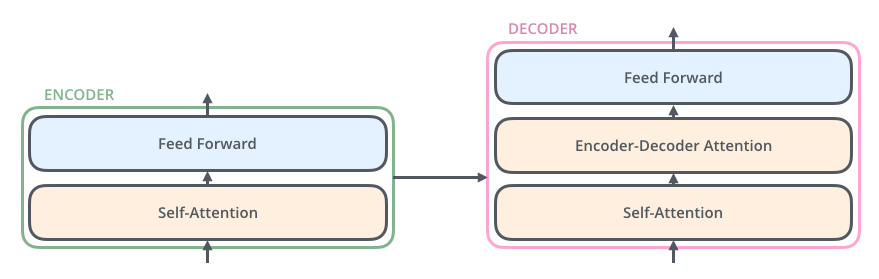

<center>Figure3: Depicting different layers and their interaction in Transformer encoder & decoder components</center>

To get a more detail explanation on **different forms of attention** visit [this](https://towardsdatascience.com/attention-and-its-different-forms-7fc3674d14dc) page. Also there is a great blog post on [Visualizing attention in machine translation model](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) that can help in understanding the attention mechanism in a better way.

### How to choose an appropriate transformer backbone for your dataset?

[This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different trasformer architectures [[3]](#References). Not every architecture can be used to train a **Named Entity Recognition** model. As of now, there are around 12 different architectures which can be used to perform **Named Entity Recognition (NER)** task. These are `BERT`[[4]](#References), `RoBERTa`, `DistilBERT`, `ALBERT`, `FlauBERT`, `CamemBERT`, `XLNet`, `XLM`, `XLM-RoBERTa`, `ELECTRA`, `Longformer` and `MobileBERT`.


Some consideration has to be made to pick the right transformer architecture for the problem at hand. 
- Some models like `BERT`, `RoBERTa`, `XLNET`, `XLM-RoBERTa` are highly accurate but at the same time are larger in size. Generating inference from these models is somewhat slow.
- If one wishes to sacrifice a little accuracy over a high inferencing and training speed one can go with `DistilBERT`.
- If the model size is a constraint, then one can either choose `ALBERT` or `MobileBERT`. Remember the model performance will not be as great compared to models like `BERT`, `RoBERTa`, `XLNET`, etc.
- If you have a dataset in the **French** language one can choose from `FlauBERT` or `CamemBERT` as these language model are trained on **French** text.
- When dealing with **long sentences/sequences** in training data one can choose from `XLNET`, `Longformer`, `Bart`.
- Some models like `XLM`, `XLM-RoBERTa` are [multi-lingual models](https://huggingface.co/transformers/v3.0.2/multilingual.html) i.e. models trained on multiple languages. If your dataset consists of text in multiple languages you can chooses models mentioned in the above link. 
  - The model sizes of these transformer architectures are very large (in GBs). 
  - They require large memory to fine tune on a particular dataset.
  - Due to the large size of these models, inferencing a fined-tuned model will be somewhat slow on CPU.

## Entity recognition with spaCy 

This Model works on the [**Embed > Encode > Attend > Predict**](https://explosion.ai/blog/deep-learning-formula-nlp) deep learning framework [[1]](#References).


- **Embed**: This is the process of turning text or sparse vectors into dense word embeddings. These embeddings are much easier to work with than other representations and do an excellent job of capturing semantic information. This is achieved by extracting word features using feature hashing[[2]](#References) followed by a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron). A video description of this workflow can be found [here](https://youtu.be/sqDHBH9IjRU?t=1612).

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA1wAAACzCAIAAAASfYpZAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAHZESURBVHhe7d0FuFVV2gdwFMXCblHsmlHHGHNEHbt7DFRULFQUFbu7C8WxC7t1DOzuTrDG1tGxC2OM7+d5N/s73OJe4t4DvP+H57D32muv9a43/2ufuGP9/vvv7arwv//975dffilOEolEIpFIJBKjESaYYILiqB7GLv6v4Oeff05GmEgkEolEIjEG4v9J4f/+979ff/21OEkkEolEIpFIjEn44+3jH374oThLJBKJRCKRSIyRGOLt40QikUgkEonEmIkkhYlEIpFIJBKJJIWJRCKRSCQSCaTwt99+Kw4TiUQikUgkEmMqkhQmEolEIpFIJJIUJhKJRCKRSCSQwjp/0SSRSCQSiUQiMQYiv2iSSCQSiUQikUhSmEgkEolEIpFACscaa6ziMJFIJBKJRCIxpmJsKA4TiUQikUgkEmMqkhQmEolEIpFIJJIUJhKJRCKRSCTGhC+a/Prrr19++eV3331XnFfhq6+++vrrr4uTKuj/zTffFCcjAr/99tsDDzwwySSTnHbaaUXTSMAvv/xy//33L7XUUtNNN92OO+5YtI76+P3337/99tsGLVhT+N///nf77bdT/lNPPVU0tRY4+cCBAzfYYINppplmscUWo64ePXrMP//87733XtGjEXz//feHH374bLPNVpyPUDDcp59+uuuuu84yyyzzzjsvCTWKrL59+5JtjjnmuPTSS++9994555zz5JNPjluawAcffDD99NOfe+65xXnzYLpDDjmEAM8880zR1LqgBEpmkZH6418//vjjtddeO+OMM1544YVF0wiCZLj//vvPPffczz33XNE04vDJJ590795dymLcoqkRvP/++yussMLCCy9cnI9kMNZPP/1k7QqE4Cpa60HIR584jbuceo2WaqgCvFH/QFSfH374YaQ6RomQjQB1lkOqQYMGkSREclynQ7moxjoMFW+88cZyyy3XpUuXOH355ZcXXHDB7bffPk4TtYbRnxS+++67SoIaWZwPhjSqUM0333x1XFyUyq0bbrhhcT6KQOjKm5ttttnkk09+9tlnL7PMMsWF4QAVlfmuDSEZbbrpprvvvntxnqgHybpXr15vvvnmiSeeuNNOO4011lgTTTTRpJNO2rbvA+Dx2N7111+/yy67nHTSSe3bt1dd7rjjjkMPPXTFFVc85ZRTBNq444472WSTjT/++MU9ox147wEHHNCtW7f//ve/RdMYAFQDFYbivBHwz3BUvlE01QZQHyS7U6dOSy655NNPP120DgnpsX///vqstNJK0eKua665ZqGFFrrqqquipRoq0brrrjvTTDPZBcE888yz2mqrHXPMMR9++OHI5oW//PIL97vooovM+MorrxStFTO98847dk1LL7003o9z77PPPo8//rj+0YFgn3322XnnnYeR67DIIovst99+WF1LeWE12JrF2b04r2EEIbajG571jnIY/UnhzDPPzNfvv/9+u7qiqWLs559/3rYJ6XnppZeK1kr7Y489JlWts846RdMoAl4rQ2G0hx9+OOGxqOLCsIK6kMvll1++OG8jyLznn3++vInuFE2JISGDv/jiiy+88MKuu+6KfGy11VYdO3ZEwh5++GGsq+jUFsAJLr/88tVXX713795e55prLlVTvZx66qkxwrXWWiueHzz11FOIbHHPaAeUd4cddvj8888vvPBCNbhoHd2BgtjFHXbYYcV5I+AJp59+usQ1/fTTF001BobDpRo03KeffnrZZZe19Oc7pptuuiMqQL9mnXVWObZr166GKi6PaJDctuTee++VHPbcc88677e89957wQK32267f/7zn927d3/kkUcE47PPPhsd1Md+/fodeeSRf/7zn4nao0cPxurZs+drr70WHYYB88477wMPPCADFOc1DAxBvqKceJdjDMHoTwoFrV0O53700UeLpgr5u/HGG6Uk/E9IFK2VdqcaF1988aJppAHrUiObUydQvQbfj6gGyW1oSG4zVzQNH1CNu+666/333y/O2wKUI22deeaZ0pDNZdGaGBJMz5HGGWecBRZYoGiqDTAfTv/Xv/61OK+I+vPPPy+xxBLF+RgAIdm5c+ctt9wSt/j3v/9dtFZU0Zy4BmpEr8uHN6ME5NsbbrihNT/yEfrkXcV546BPgjUn8Y477rjjjTcenvT2228XTYMhe7/xxhsY0hRTTFE0NQ9TTjnljhUgzXjYQQcdJMdeffXVcZVUYrk5tv7111+bs4qPP/54//33536vv/46Yle0DsYEE0ywyiqrXHPNNSjjhhtuuN9++/Xt21fMXnLJJdHho48+sie3c8Pd11tvPXn42GOP1XjLLbdEh9Eb4g4/fvPNN4vzMQNjBClcd911HaA40QKi7v7770cWZ5ttNv5dhpZIe/DBB6eZZpqykukpwX322Wf2vl4dV0esHKT9j7dJvv/e1eoNn9i2y4y70LU60ev0ySefPPXUU6WbphOZ6a644orLL7+8ztTVMIKpySAzmtGx2ctLbtQItozVj0shPiwSV7/44gtZNdpjQK91BjRF9RohOhgkTktJoI5C5BoCxGh1PtpCG1pKdTmOdtLefPPNE088cWPv5pv9q6++MqARKNm9RtBCjKJHBbqRxwJdBWKU+oFyENPFgavRaEByksdd2sOO1S1NGKU+aDsGN1Go3amhyhFMKtFr1FN7jB+XzGsJpYoca4l2Lbo5sK64pRQ+Ojh2Y/QHVw2updoEjUHnUnUxeNxlNKd11Eh4k1pdOal2Sot7XXXgKk+IVTgOnXA8t5fHMSDooIUAxXmTCK3qb/BqZw7EQkKBXquvuuTeUHhc1VNjXLVe7bHw6ANWV9/HjFkqSs9SvRNNNNGqq66KPVx88cXRArQhrq+//nojN+1COkgUDzzwgFtKqRqDDtRYilHnFiIxRyjBVcelkBALLFXkanGhAuM0psBqML0bCaB/GFpn6jU4/3RMbw5Y3wjRqHNxcwXVdgwhiwtViMFd1TMW6IA+b7rpJktoWp8ffvgh9jNw4MDGllBisskmW2eddehQ+q1WIxDbXCrF8LyXYqO70korcYySdljyaaed9vDDD1d7YINAJQ844IBXX3216VXQcMeOHfkP5rf00ksXrYMx7bTTbrvtttNNN12ctm/f3opmmGGG559/PloYi6t36tRpkkkmcYpEYpbzzDMPOaNDfRA77grz1XfvCOrSrHHKavyWVt3FHxjXOGVLZLwGFWKB5tKt+ion1N84BnfqUulUoL+Ro2dABzOGzKUAbgk/N4UDMpQyG197yGZAB9XilSFgEJNW3zhKYIwghZyYr997772spYXxbNlfeeWVZZddVkg/9NBD7BqdP/nkEwG54oorxqmahzvusMMOSy655MILL/y3v/3NDu/RRx8NLzfOY489Nvvss59yyik2Uihm+Vla7mUXqGXBBRc0y4EHHvif//wnLgVIhetcddVVm2666Y033sirGktkespNhx566NZbb23PKnhiFSWcPvHEE4sttpgZeSE5HV966aUu8dTbbrutR48ef/nLXxZaaCHU6u677y6LmdXJFK4usMAC5LTq8847T7SIgccff9ySDauPARdffPHLLrvMjZY533zzxe0BGXOOOeaITw27EaWea665KKRPnz6WD9opSlBdeOGF2DkxYJdddnnxxRdjIV6ltj322EPhdImSe/Xq9cfQFRalasrLjT0mJN5mm21GJPvgI488kv4txCy33norYaKPA8q3wdVOD5bzj3/8w0JoMjpYQteuXQ2i7lrIcsstZ+MujDXOP//8r7322r777mtYx7LwBx98QNq9995bC71ttdVWzfxaiRTDA//0pz+dddZZ9913384770wS67VHp+ewvkRDdSS57rrr7O8lcZ4T96phxxxzjBKyyCKLkPD444+Ph7hSD+vsvvvultOtWzfHCp5MxK8WXXRRHSxku+2244T2907Zwi0mXWONNT7++GMtTUBnEXH00Uevt956FbstxP9jXu3kDDcLcLaTTjrJol544QUCKDarrLIK3dK8xmWWWeaMM87gD8Ln9ttv18LfnnvuuTvuuINijWON1GJ19BO20yL66Ll8btEEzH7nnXealNIMvvbaa1d/5cJCpGZGJ5IB+YlZBEtc5Wbu5XV83hqJaiGlclhcAqExHrvXXnu5Vx++YRVlaeHD+p999tnmNT7N85ABAwaUoYoXGta+tAzzscf+4w8HHHTQQWLB/pCZys51QHgJiuZ5+FtvvVVNxOuDG1x77bXrr78+V6fMI444osw89GkJ3IPmCWnfazkCp7z67LPPWiYfo0AOQ7a4BLFA3GLllVd2Lw+MXFFcrgIBdCMAZ77hhhsMtfrqqwsZYoi7pZZaisW7d+++2mqr2e9FY5lvrZTDMHrPnj3DFvzZquNqCd04WL9+/QSg2IyKi9BwGxG62267Pf3008ZpTJ9MwPFE7gUXXCAWynxYH2w000wzyUtkVv6L1oo2RBNrijK8qmhtOSwEMK1xxhmnaKqwvZ122um44457++23myB87GWZisJFF13UxCrIf8IJJ2y88cbB6oYKOqTJzp07x+n4448/88wzy968zqqFzDsVTDXVVNGhDiyHA4gmAcI6jKh6iutqW8gPQr78aEGc7rnnnv/6178kc97FA4W8gFUZN9lkE568xBJLWIWcE7dU49133+VOshklFE2VrHjyySfz1ZdeeilEYiwRRB6xSRtipNQt2RjXjmLzzTcns6hRcWRgwRKPUVF2YoiI+D4cFbER/99ggw3IptqqLCeeeGL52VCRIm+jFvYSvNFyRuoXTEc4Rn9SCGJbVXv55ZfDq1hOGR533HGlNn7DJ+KjxHEgU0tYTuUOtQqR4jFSvATHwBI918EF/xi3AnfhEPIjSiH3aRE/vXv3VleMf84556jlnFIVj/4Bs4iEe+65h8cYfJtttkFGGywMQpTwt9xyiw3fFltsgSu88cYb1YXBUHZvvFwcjjfeeALJsUQsTcibWI6CdO655yrJtoB4AzndxbMxPxXCVUTE1emnn/6QQw4Rz9Sl3luUV0nBgAIjdNIcyFYiykIQRHGlxfLFPD3gBKL9qKOOQsoVg6Ap8ntQK0q7+OKLHVugdmaieZwsyE0TkKoUMPayCoOzMpXG5psYRhPkTKn20ANmMOecc/bt29ctJS0AOUIj9dotkKFsVFbRXJlX5NMJs6ribEG3iB2Kg86WlX6ooBzMXsaXSphJVeZyklq5NQeT4vdyirWTNpYg+6tMBLORkKFo2Bp5HbpsHDmISBITS9X5Rg778lsmYGVy8gr5UZreZ599OnXqVHRqBBzy8MMPZzJRENLiXjY8xeXGYcNDb4ruhBNOqCpwIflRLqY0aRRv00Kls846a3FDu3YdOnSQ+tlIAsVUwvoqAe4y1A/I0ir/kfQFCwPZkGBg4UUBYnMt3mhzpcOMM87o1c4hrqJc2KRXlIKHEEPYVnNKwUKkgw8+WIHkJAahSW5gFa4SlcvxcFYTd9YorJS6LbfcsmSWCj8+pLiWJIxdlEC6ZURm5bcIX4MkYIopphA7fIaziRoSGseSi8tViCyEm2IVugk3bk+quKrKCnCCyTZWJ5kowxE4lvDee+9RIPHQrPPPP1/BI0/cCPyHqBxSLZfKMCEFsn///sXlKliXDCkS5SICUBFJ6C2uklwQ4XnstdFGG0VjCcvHFNkCEadtro6kVhMmICph2I63C0lqCbrD5SQ3knNawUJjjZEqXmcWtFVd51rCSgpi4uLykJhyyimpgn1vuummoqmSsiRkvr3WWmsVTS1HLARrwYzLN3anm246K7J2G0iyMRN+06CtJTHmswnhqxxJUDeximaC/0ib7M5Xo0WKsKXEoemK9RU+YTvbbLOJ5ehQB7g4i0uMnIqBmJ62eWDT3y7XWWyiZUJGIDCl8ATZT+3jS7KlsKoOyRIMhLoxup1VtFAsV+dgGJ49iUvXX389RzKLDarkMMsssziIp7/AuIKaY1O+AzLzTJ4z99xzy2AKH++VlIQS8fQXI3Is2YzvFeQo4qkdQTAClowzKMq0J7EUraMELBLDGL2hJPAABYNnO+Ula665Jk7m2D4D71E1o90OVajzfrd4VXHlNdzlj1Eq0F+czD777OJZH2kRJ7O5KS4PGiQquKBExvmKpkGDdJaCNfLFomkwDMKb5Xp7L2LYrMe2rD6MLDFhSHxa4pDElefiWuU3BWR8wsepYZFg5QQpjBYwMp5nBMdGUz+IGpf0V0SVLk4cLTrjJahGnILpZCsRW5xXIAysS3J0TIHyFE4phuMqWLvkrlQIm2gx9TPPPGMctdMtErR5RZ12V0kiSzpwo/USQC2s3NcAFPK///3vLKgGRIu7VB0DRotVIG2TTTaZVBUdQJ5VloiEKDi1BPTdRKU2QDnXqI+UFC26YfC4i5oXLQZHBTiJBOSUCYygRFFsdKiGq5gcb+E/KGA0Wr6NgVukdadyGZ0wotfoANbIMRB65TxavvzyS5XAvLEoI+OCk08+eTkvj7WvVbnj1LAo2jTTTIMLymgSJVoQlwyOBMiGcVoHygMNSIXkjBY2Cuug9Sx46qmnRjvgcIgmN7YZiBYFpk4fiRLtU1Hi1EKuvPJKy49gMTjNoOCCxRLcyNVtXaIzyS25OqxKMI1VWG/ZuZSTHXFZHoIERItL7EUwTLfSd5B2/hDHgEzI8up0nMZnzA1O1Ggxgjidd9559eFv3EBioV5+Hh00KupTTz21ShMtYLOhhXMW54Ph9ssuu2yRRRb505/+JAqoiEGLa0PCWgxIP3/729+YntilXbi0+BKJxsEzolFEs7VkFQNSqfFDCfDhhx9igZ07d7aWuJ14KqLVuWpk00U37scnbUWixSU7WLYoc0V9KIQ8B9ktzivmQzW4MTpVNA1unGeeeRwLfBskHEIyiYmqIRsvueSSerI150frDV6/G3BpcW3harbgbUyfVoGIIKCGshBJxo2xdnBMFYx+1llnmXrVVVdVCGjJJXLyn3h4LAkrGZJqeRfZRJO7oqUaHMB+w43iAri6ckBIWSUeAFfj/ffft9Nja/ktHqmWtq6GRuPYVc4000zxtEKwl6uoxjvvvGOrgEqWMVIHtEQJwhPHEgLRaKjYJIsX1YTRiSTLidzoUA2akdglfytipmjk3uiUtMkzo0V+EPKEKU/jEYl7nYodNF02Q8XERfRxaaGFFqKKOK0DYnNy5DVUZEYO4HbzhrH4mJxTivTqq6+ifTyEb1NXBG91BijBTAqowFSjo4UhbIq4cXUikvoQX40R7+4izPTTT4/XRodRC2PEk0I+16VLF3750EMPObUfktQEuWPOx1lRGdsIG7L7779fPRBguLISy6VUFJSiMswfEBhqpFyAHUYLDrT66qvHMfz2229GU4Sq98H6yDvFyZAgm5xiR8LJ7rzzTjGp9hTXhoRBXBWQUrltul3yI488UlyrB1tGiyW/DCstBkSFEQYMGKCD0bBDp4JQshNI1DLHHHOIqxhhmDHuuOPKocVJZReoDMgmEmKIoTipXpg0SSxfLOFwNC/5Skz661zcXJFTz+KkEZix/NChkZdeemnLj2X+/PPPNLb44ouvvPLK0QHGG288FMEmQb4omio3qjrFyWDwGT3jWAcac2/54Mq80k1sq6JlqOAYPEFijVMysL4cWv3s2bDctTipuCuP0kJLoUC1Rw61Rrm76NQkVHRlw0QSn40+F0U6i2tNgiSqiKqDNygDP/74I3NUW2fEwuBSuY3HXXfdhWBJ1r169VI1i8uNg2ncSCHKCSdXyRilWk4ERcmMFrOoAX/5y1/KRwvaTeQu2x5FwqvK7TSuAj2ggGuvvXacGgGTwOPpBPFifQLLDOpWGAhZYWi3VD+tBL6tfhQng8Gs66yzzhVXXLHBBhvYyRi2FKwOlNLdd99dqWMUvBkFl4iKaxUw9GqrraZAxqlV2xuwmv2hU3nMZoCuRJllerU/4Qw//PCDRjWMN0oaZHZJu+liHKAipDBadMOWEOJ4g6VFIKEEW5wMCYno9ttvpyK7uOqpqyGcRYrdr8SFUTXYzarFLD5h53/UUUdJ1w3+RKVVSHd216effjp7xecNLLy4XAX7HCFPLfKzU44h8ZKzzDktgnFUHLDn7Nu379xzz23zU36qr8SUU05pw0kk6bFbt24HHXQQvyquVcEqJBM0xSA6KAoCvMFVNAHBQvnx7gHfPuWUU9g32mkGwcK69t57b9uGE044ge8dfvjht912Gw+J20vIVFh+iIFERiP3lqyazuG8QuyIF8dcUXiaRUCxcnRQpuXw6pCshv74IrIbn2yxfBFEpfZORFJWtC+zzDLa/wjODz4QsLyX2zuWLm666abZZpsNjYvRmoZCKUZsXYRD0dSuXceOHZUG0WQvVDRVwq0xV69xjBGkEFgIC7TlklaENOoTLEEMSAdy678rGDhwYPnBYXsClIUzxWlA/yjY1cm9DAAQSFxNJWt+7VTMuLtULoMb/9prry0u1IOeRFLPFHjhKlaLC/UQ8WyxygCSFJCGLr/88qmnnjr6mFSGlU1knx49esihtjhxaTghSIqjCkumELFUCFEBGmQuKrJeC8dRSKIoOhByLU1qBhGQxUkFlh/s1oGwN120B+hQzrWjtVMsmiqN9U3WYKOqUxy1HESt8+sb0roMKCkX55VJq6cI8icLF7qrAI1gR8yj6DQ0sIitOeYtxSNAKk1xoUlwbBbBKuxw0BHhw471i8EIBM4tCmzN7bnNXp15m4DCY/MjMM8880xepMy/8MIL1W8dUnLp9nXAQxQJ2fyMM8448MADt99+e7TshhtuKC5XoFDVcbCgocGo8AP7nHfeeaewTQXqopbqzNAYCGAE2w9xzRMES4MkBvS0ceWQZQUyRXGtguB2xUk9uPett97CM1ClHXbYYauttio/0+JGKUUjdrvxxhtTvhJbvT/UoTEFtggM0Rjh4+d2O0Gmi6Z6kNPIhrIceuihjY1DS4biSJKw3EKftjTFtSHBfDSvwNuvOr377rsb/GgE71p44YUt3+YWySDD1VdfjeUMW8lHVo6ogPLREfFIgOJaFcIrkCGzID38uc4GoIRVWG+swsE999zTovzpdhnykksuQfvwy3g8H5cUCGnHYonau3dvldHO6sQTT+T5QkwqiG4lCPzFF1/IXeK3aGoeeEV1yQhwueaED8Q7yN9///0TTzxBb7L6Aw88sOqqq/ITPm/nppRj1UVkLr20S4LdXaZgUMu0CWzmXPoLef5Qpz9LcQmaLM4ri+I5xckohTGFFCq0q6++umgRXRIfa9maRDtf9yoJPvXUUwxZ7k7Ub6/VpQX4HLdwoGe01Icb61frBkupGCbSK6+8ctJJJ8nFAwYMOOecc8qPOlWDcwtCLNBmzt53xhlnvOaaa5r+pIJFyYxXXnnldUMCL3TVgBdccIHNLjYme1LO0Ucf3cxgFvzFUfMg9hS8YvrBIP8ee+zhqnK44447MooqxQpbbLGF7Tvx4l6oPh4G0EP9J3nMwY4EK85bEXU8wSnLNi2JnXS3bt0KxQ3GpZdeWofsNoGoMfKgg3HHHbdBb6wPplljjTVuv/32gw8++N13391rr71YqjrxceDiaASBeHYyeI+pBVHEYHMwxRRToDv9+vVbaqmlzjvvPDFy/fXXF9eaBDe44447UEklX8G2Ndp1111RuuLyYNS3GgLBtUjolbTmLQwzGFdccQUiXtxQQfQvTgYv1vbyvvvuU3RBALqLAEWPwdBTInr//fdFDdrap08fYXLjjTf+/e9/L3oMDayPGyH3MgwZVlttNSNUf/yUzglACeuvv/6999679dZbn3baacMZei1FqczivB7k7UUWWeSzzz5DfepkZgh98k/0zlrsZ6Sdyy67rI4VgPlQ3tdffx252XTTTR988EFch/M0yM8AI7RVeOSRRx5++GFlwh7AZru41kJw1G0rQLAapL9WIV+h+1I3W5977rndu3fHzKrfPQhYhc3ka6+9xh+IpzqcfPLJF110UcnqhgojWMtZZ50ldkQ3bVTfS4xXX30V3SlrIsghK6+8MiVXPxUrwXxQJ5tZUZ3wGbFQ5rB/G12BTCEvvviiGcu3hsgT37YpwnIwTqn8eL4OSnnzU2JA0qjTXybke02wglEIYxApXGyxxTirqL7//vtV03gCpH3uuee2pZANBZUDm4C4JR6h33zzzdXml1ttnpSrxp61GNDGLh5GFk0Vj6l+KBXgWC+99JJktMkmm6BENmr9+/evfuO1hKEMiA5iBjY9dnVnnnlmkNrGQIzY2RM+3q0oEU/yefCBBx6oFpp0t912k3eWW245jZW7/4ARhIqDcvlaOL3T8oGi2GvskX6JkMR+3Ta0kKACeo53UQ2oGMw222yyEmHkaEVdpgsBXI2v7wwbDMIcTGYfWTRVZrTtltznnHPOoqm1YOqPP/7Ya5xSoF0BXs4Jo6U+6HyqqaZCHOeff/5CdxVwgGY+8DOL1H9M5Ys+Sv4hhxxS5wlT0xAIKAIdqrLKJ8agkWK9vv322+VaOPlQnWGoMAIy9/TTTx911FFvvPGGctVMXkIMZGLppZe2TCPQWHxVcKgQXPyN/mUAESEQ8OBYXQlL+7TyO0FxSp/uevLJJyeaaCLKYSCFk1kNUtimAgYq38l1S2xCSpMRGK2kzD333HPnnXe2zIsvvpjM8w357X4wO/NdddVVO+yww/HHH88NLBCfa+KhYH1Q7L/+9S9R4N5jjz0WKUEQbTaKyxV5iIemUII+aqo88++qH1ZsESjQaFZdnDcDoUaKpZPSqepAJpEn5Qo+fMMNN1TzQrd88cUXd955p62mhEYA+qSu+htdqpZeUN6uXbsahMWvvfZa2mjs0SO4tPzyy0v7dtT8hFmbTr/DDPVFajILW6N6iy66KNl22WWXKEbVsAqJ0SrQQUWKQW0YbPKb+cQrIPmYS2gHrSxaB4MOGSX2LUVTxRuRRdp2UDQNBourqq7afpQWdMD3vvzyyzgdSbCdUzpffvllqUM6tRkIAxGpVIiWIjIr+POf/+ySpKHKiGWFNbpVQ2EygoNyOfrjoGpHdX9XseRnnnmmsU3FqIUxiBRK2YLZxnHAgAHVnwJ0aZ111nmogurHhPG1I/uJgQMHCp4fK7855F5Rqn9sMurDjWuuuaZYOvvssxVyERLPAp0WPSrgRhghOmhTiwzdfvvt6m5xbUiIvZtuumnLyjcZDSIlqXzFtcZBAN0ULZs//irVhvxEchx9BINkpzK5ZPNNkuoaYCHKDznjQ9DyL0Vxei2kjbtUStvr4oZGYBaaVI1seWVtCSJ04l4jKBsyDsasRdUUcri7iaQ8ArCXmCw/vjkMkMd79OjBgldccUXMDkGs8YbyU2KtBmu88cYb1SRWoAemkZSV/MY+cgpy0FprrWUTbD9D7e6yBAf8oejRJGhYZ27ABPvuu69iwzeOPPLI+g9a6oMVqC4mVa7+9re/RaNXdpllllmEDJ8hD/PJyA0+5G4+TGGXL+JoY911191uu+1sfqo/99kY3GjXwZFoVQ2Lj/dpLC4PDdbC8aLaqV4vvPBCfHqshCUL4QceeMAy6Y3rChZYZZVVMLMJJpggvoUgFrzSM1CaWCt5JFd/7rnnmHKOOeaIFnNdeeWV6KA+WKljnh+X6oBIhx56qN2jMoYaIjpYUXGt2RBTUd6Avb755hsbA2QiWuiK9vhhhGHHjh0p0C3N12EdiDtbPu5tQNoIn2kaGGq8jWsn8Prrr5OQqq29mpEAhfMQmeGwww6TGMuRmV5uj2ef559//qWXXtrY27vyicTrXilXOmWCJuhgCXxU2r/66qt5gs15E7fIkCS38BLW0kxN0hhb9+3bl/Bcwtaoscd+4s7+mfzbbLMNur/jjju2iA6CzPB+5XezrctWpJC1AgKLI+6qAvIWdJMVtDOHhGA6JLU+22b0eeaZZ8opp5Ti3nzzTRZxLzntMRp773tEgccuvPDCYkoMoqRKcLSLTVGDqkqzRAqnioV41UGuWG655ZyKQXEdMpdX3U7/VCHZRlxbuKohzKv7W52dDBNL1JVpR220wdtnbQU5DuezteK71flCO/50xhlnMDn6UrRW3OXoo4+26UTItC+wwALKnk2VODn44IOLTvUQbHKZZZax6Y/v1nEdCQidUmyKToPRs2fPLbbYIp5ZNgEVy2gbbLBBcd4MWJQZbfqPO+44xdUCOTdGy9cXX3xxOREzsCIbZR4vF6tY9p3ip7i/spA555zT1Pvvv/8aa6whF6+00kpogeXTlWxiHHdJkcUNjUApQsGVT5p/4403EE2R5nbMbPvttyeDeffZZx/7PLOLW7V23nnnVfYsgQns+fAhI5CnGLElIL/ds4iVXiULU6j97Ihg9e7d2+xFv9YCtdNkr169OIm6YnOpMFNsE/RUsdxpp50sIe6iHI6KxPMuma7o1DjQkXvuuUeB4QkM6pTXHX744crJUD0Ks1F4mMakjp944omZZprJJtslUrkUH0hlXLXZVkHGlCLj3pZCKbU3IGTnzp0FHSdZf/31KYfhEPqmy7ZEr249+uijwm2Gyk/v3nfffaQqLjcJHkIt11133UEHHSQtIEb333//kksuaZCiR8WHBanF4m24Dp6K/jpQiV2lCgGCR+ogxPiYMdUJsaZgc3h9qJ372UlW8znlE1mv3qA2CD6j1tJJdXi2FJYgITCTjcHyyy8v6p9++unpppsunhmrZxaFblIavsW1KMGkbFH/gVBzIMdaqT0DncgY9BkfkxXU0aE+7B4XXHBBKeuYY46RGVZeeWUC2yTInxdccEHRqaINmpcPxS+iTKUSkXtdshx0aqh2Zy/Fu8HHb02AB8Zn0XCvOh80rwPhqUxIccV55QNn//jHP4qTJsFMlLD33ns3+M5yNejTxklmaNEqqsEHWD/eMznhhBOK1gqs0T5HOHBseyFeypTUjgM99thjjIh8M2vRuwrMYRN+xBFH2HxiZqKYm6kR5V5oJIHe+JtCJmMguPJAcaFdOz686667HnLIIaLVoohtydIUUbVMNtlk6623Hoe33bJXt2Qyv/3227rZLQjkTp064ZrsLjtJApISEikTVvcX2kqh9ZZkdJRG+/jNreJsdIfcwZzStIxQNFXylF0gZ/LK18vyo121QKc4kCAXFaJdqurTp88000wTfSSsRx55hJfEe7IBaUuZtw8TPw8++KBqKk7cqGgtu+yy0dPgqpcaI3vGXY0BGVIMhvppP9NhV2+99ZZ8Gi1utN0XjQoVSkF+zi3RY8aqkatmtzQkzBIEvGqBtPF7zCNul5jc4kbcRTgZSiaiELtG67Icd8lfOIc4lDHjsd/jjz/+97//vZpvidguXbpMNdVULqnWTz75JBWZXW61GcUGEMTQsJJsHJSFLeJeaQgnEIoN0gKuS3ilrvojPpKdvSyRlAd6tomMJcfsyoz0ccABB5SfG4tBFL/u3btHCxiTPNjG1ltvbRCnXmlYrpdEIhGT3A6ScqLFqWxil9y1a9c630sAV1mHYNtuu62adOmll9Ib9Xbr1g3tjo0BSUzxQeXre2WuN6+1RyFXqmne7iKeW8SbziGGrFTepSfrMEd83gCv0nOPPfbgbGyh6utMbCmMlXkpAoRxVmYbAkb+/PPPVQWT8iKlnajBcoQSE6uvtCqmmGnzzTeXf1mQYBEgtIfQi47yLdGffvqJ9dkiHskbX3+ziwtSicH4mIQprJqzKfN33XWX/kawyz/33HO5VrDSaujMfEbm55ajRRRwCd7FcFRKP6VUQAzdOKEtmbwvuGhMC6XxFmyD6tBuK9IZtzMvX+XqggX7pFI1XryUDI9i1SFmMggfUyRMjazQWHi4OoTBbLTRRvEwDMwrrmWYOG0Cqo7BS+EbhOXT5EsvvUTOMldYprVbCENzSByLnPrYETENYeQiHVzlTkYgZP/+/Snhyy+/tEthCJqnmXKQMirdzuiW0NgTbpcYVB3lse6VUujBLV7tJYpOlcel1Y3uknNkLXmVJC5ptCKlV0/2Jb8NLadVyyUfETRw4EAqdeoSfTaHfGA8oqn+NxuqQRvC0MJ5ppypxaR8XviwhcboFhrm/PG7fe6yZBxLzscYSnzxxRf8lh0tQcjQfNxeH6SynFLPTUDGMGbTq6iGbQlRBRFbSMVaWBYZQtqYuxB0MD755BNeJGlQrFkYyHadOcTRoosuutdee0WNqA892V1cmIvpjS/z415SH7XH97VpgweyslJS/xToU3YSTeWulb8ZkLab2MdKArq9++67ZiFz0VpxKp4vgRDexlW+ktP4iYomvehgIjalE3mVzCgs/fM6d7G4uIssJwFyTiFD83X6Cy4kGGLGkJbHKkAiKBpHIYwl/VlDcZZI1BI4p1KHQiE3eLwqXlyoSeAfqtRWW22F3EidRetguIpSWIhttE1C0drWsM856aSTLrroIlm7aKpVKNK0asPQzB+PGFFQZhZeeGHbEtSwaGohUIQzzzzzhhtusCWIOpRIJBK1iTHlM4WJURE2fzZt22+//QUXXDDMn3lPJNoQNgMvvfTSLbfcsuOOOyYjTCQSNY4khYmaRocOHbp169alS5crrriiaEokRh18//33995771//+tcWfSY4kUgk2gRJChO1jgknnPCMM8445JBDivNEYtTBZJNNxnX79OnT4IdiE4lEoqaQpDCRGDEYq/KllnnmmWeChn7Ivrw6+eSTF001gLErf/NtrsF/dq+WMe6447aJ9jp06GDe+t8cSiQSidEP+UWTRCKRSCQSiUQ+KUwkEolEIpFIJClMJBKJRCKRSECSwkQikUgkEolEksJEIpFIJBKJRJLCRCKRSCQSiQQkKUwkEolEIpFIJClMJBKJRCKRSIx+pPDzzz9/8803n3322ScreO2117744oviWpvi999/f+aZZ2aaaaYjjzyyaBpx+O23355++unOnTuPjMFHOEj70UcfvfDCC7/88kvRVJP4+uuv559//jXWWKM4H3Gw8Iceemj22Wc//vjji6YRgf/+97/TTjvt2WefXZy3Fr777rvDDjtsjjnmKM6HxA8//HDOOefMOOOM999/f9E03Pjpp59uuummWWaZRUwVTYPBuz755BMZQCoomioQgAyq/7vvvls0VaD/l19+qf/HH39cNCVGO/z666/s+8orr4zUH+X9/vvvL7nkktlmm81r0TSCYOR+/frJGJdeemnRNBwwmuL4/PPPf/bZZ0VTPQwaNEiHl156yUG0uKt++AT+97//aY+aC0899ZT0/t577/34449FjxqAhQwcOJBUxXmiEYw+pJBfMrmKuPfee2+zzTbdKujdu7eCJBfUAv+YaKKJFllkkeH/0whR3gYMGPDtt99Gy1hjjWXwhRdeWOmNlpoF4b/66qtjjz12//33L9NNbWLsscf+y1/+Ms888xTnw4qwF+dEnqKFvSaZZJKFFlpohhlmiJbRGNSIqvL8SSedtGgamcAX7777blT+hhtuKJoq+Pnnn++7776VV165zsZJ/1tvvXXNNde87bbbiqbEaAdckFf07NnzscceK5rGYLz++uvLLbfcOuusg7yiy0VrFZRL2yQd1NA333wzGl977bXVV1+9T58+cVqNL7744rTTTltppZU22WSTqLxK8CGHHCLiUMmiU5vC3u/ll1/efvvtL7/88qKpNoC3fPDBB6WSawGjCSlUd5977rkddtiBl3fs2HGXXXY59NBDOeVMM8105ZVXbrHFFrYvRdc2Ah6AXtx4441bb7110TSs4N8PPfTQVltthexGi8HnnXdeg2uMlpqFHHTPPff079//xBNPrPG/BjvxxBPbl5900knF+bBC2FuyfIQXRkv79u3RzWuvvXbzzTePltEY4403nupy0003IcFF08iE6RBQTPThhx8umir48ccfH3/8cdXumWeeqd6NIItaJphggr/97W9FU2K0g6KAsiywwAK4i01p0ToGQ8mwU7VxavABOZJ38803t/RNtqmmmmrHHXdUeW3411prrVdffXWfffZ55JFHisttim+//fbpp59WfdZee+2iqTbwySefnHzyyQceeGBxXgMYTUgh/+aL//3vfw877LB+/fp1797dlmXTTTf95z//iXyoymhinbeTRl0ghehgK+wt4hHXRx99NNTnrHpy7qEmkXhMyCgiE4stWkd30N6AAQNqai84GgMdVJwWXHBB1Yj3RiPH++abb+64446ZZ56Zl7788svRDsjiE088Me20084999xFU2J0xJRTTrnRRht98MEH9idFUyWXchK5a6gpTgfdRhtCOe6441KI5dx3331F02BgTu+++65gaen7GDb5q6yyisq7xRZb7Lvvvioy6qkcx1XDmk6NHqqqf/rpJ0VnBD5iFP4GtDO3XfzTn/5UtNYG5CVstabISXuWG6qRRggws//85z9vvPHGW2+9xUJcZKKJJmrfvn1xuV27L7/88vXXX1c733vvvR9++GH88cd/8sknv/vuu6mnntrVTz/99Pnnn5944ont6aN/CSa3rUE1rIU7Fq0VcMpZZ511xhlnvOCCC6abbrpFF11UoyzwzDPPKB7soVoLgM6dO2sn4dtvv02Gd955x3TyhQ4vvfTSZJNNNt544+lgIvsq8hPy/fff5+KEKS99+OGHio3AsJDXXntNN4NoL5+HxbyWrMXgipaVVsOY+qhPOlu4lhCG3vSnLjLHjfDiiy/+5S9/UdIEjypI1GeffdbgVBTThUjV0tJ5edU41v7vf//bdK7a1dGDPpZD82UfY1588cVaKKFsrw8udN111z344IMSzYQTTtihQ4fiwpAgwAMPPCBNnHLKKWFWIKfFkpMwsdhBgwaZKwZxlU6IEVvbgQMHSuvxLjnxHPMoVmMXqcT4nKRUgnvZwpjMYY0CzyVqjHu1GE1PLEEHg8QnbEoV8Qd0IdTr+LHHHgszlTCCDeg000wTS9BCGGokjPHDXm5krEcffdRc888/f9gr0jFRxxlnnGqLWA4xwl4Wq6W8SsPs5Sq9uUpgEzF6tb2MfOaZZ/7973//61//Gi11QE4Ch6pDTqrmwyqEq7QXI2shiQNXrd0lYps6VkeNeoaTTzrppAT4+eefKYdD7rrrrpV5hkA5bHQuG00RkjigDbJ17NgxrlKaxdInRXl1r1cKKRfrdlq6/fbbN9544wZLlwSi2i2wwAJzzTWXU/3toy666KKtttpKDDJZPBekYe5x6qmnqmRajGmZIoLh4i4RZHaCxbysEFamohdeeIFPltHN/YxMvaVjU5p0TzmWSfiy3erENU0SIybSRwBKF8bnJ+V0xKOZ6om00L88w2RuqR7WIKGoBod1UD0s87GXbuFgWjg/nTdnWCvVEgypehVmYUpLq1aXDkzMcBJpOR0w0HPPPUdd4WDA2YS5W4xsOgI0NiwF6kCr9Yc1SJ1hBYUWfbif293IMTbYYIPweWJw3RtuuIFBaTjGbxB0ohsJJ598cikubq8DgjHf/fffv8wyy8hRtGTt1dm77KaRs7nKwaQOs5fpzhI4IfBMFIr+5d4YWfKMkdkoRta/euQSXJfdTaHqFU1VEPhXXnklhmTJ4sIWvTpjyyo33ngj111hhRVE7nrrrRclyXSXXXaZmML8omcJSpblyFx2ltlYh6NSeLw5Zl36qNS0Z94yFdQH8c4//3wOaeENrq4E37BMniAkOYnQ0GL8OreIRFNff/31u+yyy+yzz04SyuRmTEk8WuKlIsJdUR3qgJMwpeVzqmojsh0ruMVaKFwdIQlH1U4hpU0D+ltXGJ2olOyqSZUGZnV13nnnZW5+FTKIMsqn0nASLq2xFM/4sQT9Y+3ljSMA4YUjGyKqf//+O+yww2KLLcarrL9bt26Ye3F50CBWOeKIIxZeeOE55pjjz3/+86abborGSYUrrbSSq1Rw4YUXsgdnjf7VEFTcF/mLIlcfDID2Lb744o4NpZYYqmfPngcccMCKK66oiGqX4G677bY11liDbARYdtllddhxxx3pOuQMM/AqYTnPPPPMOeec88033xlnnMEVXGUzlFQk8Ob999/fmPqAJbOoDoQ0vg7HHntsTEcPJdCFoJ5IbYxmZJnLFHY2/Fj7U0895RI30lmoUw4ZFlxwwZ133tngt9xyC1GPO+44faIbita9e/eQFpZeeukePXqI0uhA7OWXX57j2hEagV2MRpKTTjopVgSGVefo1tVjjjlGmhCBcakOCMw0zLfaaqudc845ZqHz4loVjBwiFecVrXL6008/feWVV7au0Maqq66qfsdckaFohub3228/wriqnWzkUePdZXWM6/jwww+3ohNPPDFG5lSMstZaa1maPjS5zz772JC4ShJmUmbOO+88jcstt1x0MEt0gIi09ddf37GMELIF2EWNEYTbbLONq0Y77bTT9Ax7ISLyINW5ZDSNEiU+SgyJePfddxcOOLTbTz755D9mGjRIOuNmltClSxeScEJaIoyUHR0IwCdlsVtvvZUdw14U3qdPn9JeqojqiHDHaR3QmISFAImpULVNxZprrnnJJZfIvzpISfb3RuBFXIJ7HHTQQdoZgrTUTio3MoHQsECMjY/FjXSInP0xTT3EVfn0oYcecsouprvrrrsslk/GYi1tt912Q0riFpmaHtACJUQE2ctZLKbbt29fjq2D1yuuuAIdiTHrgM/cfffdxDNvtMiehx12mBQh/xrHdOGflsbh9VQwaJhiO3XqJMnGXVrogeTXXntttIhlFiewHCIGqSva6db+gUtwpBhZi3Q/xRRTHHjggWaUEKLd8lmBu84000wxUSQWBv3HP/5x9tlnWxRt/zFoxSvOPfdcFTQ+gAsEFiyE1MewbFEOiygYZOaZZy6HpU8tG220ka0CDyyHpX8TkbYclo04MJGs1LCyYjlsDEJ15bCiWwsmsd12280222zqXGWMQWoYY00//fSUGS0CkJ9ws3/9619kpopoly54jown6mMiLbiatR955JE0rAqUw3KG7bffnnfhZNHCzznPQgstJDMYNrwUDIKQGZavlsMKK2uXlJxauDoyyyyzME3ljj/y8J133snVGUhoxHcv4lIdUJGSxBWlZdta2o4pqsE6YUEiHXXUUdQ499xzs4ikF9kAxL7Zqc4mxFW5QqSLwXBssyBeUtZSSy0lkwhSPbUb+ayzzrIQI1MRu8fIdIWnVgYeAsZhdNWhOB8SGJIw32yzzQSUcaqrKr9VaASI7ZYa5Orjjz8elx5++GF3iZE4rQbuolZWdwZevc4665TZ3gLlLnomPB+21eHecakOjLbXXnvxQ3MpT8xdXBgS8p5w3nvvvU1BjVITlW677bZWV8c0Io4JcFlqdEpj7Mgt+QaxZSERTeH8U8+4pRpCQG6nzDIzAP7Xq1cv+Zxl2dTrIYccwp8lNPwBkWDTmA4ivUedjQ7YM3/mSJSGxaoFbE1CjUJM5hFEDLTkkkvqr4LwpYMPPrgUgI3oxyUWRJakDrqNS8OPRjn4iIXF0KBA2nLLLdEmRYWipVSO4qrNkNx3/PHHi3OciS8yAFoQ9wZEmjqhKBbnVcBrn3zySeqOzXR94E+cgNmK88ot0rr0cemll9KmU1sBZUkCUokJwH4KgD7FDZXNNIPZVopYtVxkMiQ3sqiiR6WPAbkCn0ZNmM1iJcTichWwDZcCeAnKhfnxMDpx1b7h6KOPxoR4PKtL6wb55z//GTdKcFzKgZxObzvttFNlyP8HMahXeFBLSHvCCSfQnkrMsWS9ol9lIqMpe3iAqmmjTP/ujauoM7e7+OKLxbZqYbE8VaJ3V3QogfHwWguRzQlMeCleJS4uD4ZtHAWqiMV5ZcdDAJmOZS3WMf0bH/+TDopOFTkJLydefvnlZGAvWc9d8pQcbYHB8K666qrihspeWd5RCC2Beq1L1JGt2qZ2Y7iFDGLq6CDv84fichUMXlirYi8bGCvlcnvuuaertpLMzR+wECxNvbzpppt0ixtlZ1YQ+RSoZqhwlSH/H9SiGklPXtddd13LIQwtEZWbSShFv8pE4kKBZC+jMZB5qz2wCSiQZic5ssXNHMu5aoCtEQpVdKrsqu1epCfbDFYI2ahXCkZnrU4I8wE5rrihhTCgSBRfL730UtiOdUSKSR1UL5ZsEiumYrEkYXQErjmLtfUSTfaBnI2JtXiVRqV+KRhvk45sILXLPIRBj4Qe51exLD8SheksmQm0uzdauAryp6pFZlcCY3yZVH3SAZWJkbWo/YqoOoFzmNH2QLvl2wUpS4Tkn1o4qrSjxiDoWH6HDh0Mqx1EB7fXYlI3aoknWxxADSNtnWFZSiS++OKL0cJM6qv6ZHUGKT9XTbEsLoHUGRafMyxCUA4r7mJYnsZeWmJY4ORR75977jnt1i7vxbClAlEuOzfLpy6aN12oiwAiV5oyeGQJK7VqhrBjqT8sZ6seVtWgwHJY6yqHRQgMywryQ7QYVp5fYoklnIpBVIAq8Fqn4FjdlfC9YmOigx/K/KGWaghkzIAHylSiQNyZqzqXlqBMpiehMqe/fbIxJZa4ikBI5syNdbmqLHIqo2nhCcoQGahdRhIam2yyCc3HjRBORTOSpFtwXyOjucXlFoJz4kP2LdJmKBAYgj6Rkg033DBahgFMwEbcO3YU0aicsSw6KNjFNdLcv39/blZf1fK8AkoDrqpKigJ7MWVxuQK6kgrs+WmAxyIPoAbxMTmTXxX9qiJO0ZSii9bKg0/J31ySm3GEs+KiyDJf0WMwbBqFvPxZBqYFCnOGELCckMNI8tdccw1WymoyKioim/EQnVmTKtREMtCqDiRcffXVCUNyUyP3Nr0qi7SPqLAyh5fxDLv55pvrL9XbfallHFVMhQwgNDiMq2q0bFC0DjdaiRQKCYuxJBtH2vd6+OGHyxfxgQYpRpipQzyGsriRcOL3cS9gddbMh6isaBoSXFm0Fyf14Pb6V3mDyhQ8ko3VWnmEhPagBJCgEQhZMjqDQZif9t2lrujAnBzFKooeFYgxa9FBzuIWxm/w605Go4eAnSt34WS2GnbkrioY2AZWwYekM+Ehrd98880uyRF2kCiyA87k9rilGsLAFkRJk3RCWj7NyXr37q3SxzgBJYRiURkUBHFhFDmrmo2R04pkLsLIvwxkTFbjjkWPwSAP/XB9HVRWwSxOlBMDFj0qelalFOzyVLhiJ+rWaaedhiKgZV27dpUF5HHCGCd6GrxTp07olETm1AKFzf33309LlGOBaokZ5bjoDySfbrrpRJR2ThUd1IB777236DG4D4HLESaYYIKrr766uFwFigpjUf6MM87IXvxZ8DOBq3iDLGYhliAvkMpCuKtLTImLhL0Y2u1xSzUsU0GSCyR61DCEYS+2Y68YJ6A08ivjsxf6KB2wcnP4WdQb9YOVTznlFPlRRHTr1k0SVCkl6FLVcrfZpdc4FVkc2FVeLUPxRmuUf4VPdGgpLFMuxsZsVHbYYQeLRZsslnF5ZrXvkYQYe+yxh0nVY0RWDY6MMVSwiDJv36/WohG4JkqB8RhTHlcCnWoXv0xpI44ou2RTShvx0zlSOW7EynZTigEN0OH777+PxIgmfiKhx/g6KySII2n5SXAXU3B+rs4TzGs0rCt6yhhqwFxzzaWAaTEyGodqWCY/UTLxS43EY1ziGZYkKoQWBEKBpDECGJYao1DRqnltVIxcDovGCV7DWp1VG5ZUMSzZDIs8qbsxrPotAxuWAxs2BiEtAaqH1UIA0lILddHzgw8+qN0tRqNPatfTRIKUumieooStYa3inXfe0ZlTKag8WQAG+TMsaalr/vnnX3DBBcVpfE/IOIZFCDh8kL8Y1hIwDNmVEsphdbMuCa0cllpeeeUVw1qCU7BA9TWsFmAyIRkkLLK3LGd2UxQ9BoNUrKNyC3xugL2pa7Rh1UWPCqjCmLrFfmDXXXc1I7+NbgahirPOOsum3VUbfiHPsclpdeFyNuEuWaAiiEDEsMCL4r0mI3NCVyV/7lqHMDUfHEOw01U8COAJqJIwlOgaK7VNIJyQPPYGUo3cQu2bbrppcbmiaqoQyBIIl6BqRRbNjWdD1UDBVVgjyDY6SHQ33HCDYkFF0YHH2i/xDflB9qAQbkYhciOLVD8dMDgXZfcypwXkUjkwyoesqDiq+3feeScTFD0Gg6jCxwhmDAGslKeJHZVFixixatlMFTCazEwqS4jSz1VkPGIwJWKjg0DbbLPNVCv6F1nYIdC5CssD9b/xxhttkPAHTEl/GzAuRyHKQcRFQPHiP/UJwHCilUghiyqNyJ/YCPA/7VocSJfShNiIziCqbbCKk+ah6cAQacKpOKmMT9fFSSUYbrrpJnlHzBdNgz82W5xUeImdGZvZ1kviENtEkkcH4PT2dsVJZQR5s3zw1iAQI8ma93fv3l2ejUai8gY+p5CbSBUxb/VETUP14j1STzkgkI1KuRoPLpoqEyFkcawD1ydP/aiwdv4qCaJNNj1ERWKKa0PCINI0hkd+kanSP/TQQ8W1CnTAHeNYfpfove60007B9oBpLNY2WnqS/aORnFJkHIPkiAnphtwUTZUgr/YZEwkz+udjTECNAwcORGWq1ShBSzpxbF5MVE2i82hpEKRFK6U8mwcrjUb5AmFStt1LPzRsqOZnamlFumGvckDAUWQ6yUL2KZoqjeUarVf5JI/MGC1NQKGKx10lsQZLlpXwLar+4IMPotGw1fWAbFK80Ci3Ve6ydVa04rSlUP4p0GKRlaKpwuEUJ4QsHp4FaLUMQJYiQDMXC+5FDggvdrwa1r1WYXXcjxolcWHCN2zGTB130bZ1URRGBXyGKuRi5M9mRovyybJRIUJ+IwsZBIJ30SSqF48MJRwsRx0iuZ0APceDuhhW2bCcIH8xrPQ400wzGZafcyTTMZlI5Pk8TQAif5aA/di76lN/WNMZFgdVAp3SM8+xWMNal1QQw9KGYelhyy23rB7WNk+VohmSTDXVVOEtQaoMizdXDxvSciS34AHRrqeyKkka30RROEt1uUQt1k5dmCI7Cl4UQZHTToGvvvpqOJW0yT0MS1TDxtMmnmDYeCeRzg0bDN4lA1q7VwkZ2zOsMhlPIg0rJOs8RLHe+nta+rTxtjuSi6zUfqz6+yjVMCmHsZMUifKA8h8mKEEtiotNbJxSPg1YSzBRq3OVQqgokhJXIaqVMgqtWpqI4xthLLfHOFBnZLSDEig/RubPAjnKq+VbuBQUp1Dn4UWAMOGidsLUYiiMyryyomUWnZoNbAaPwcxwIxWfFZA5rlJcHgw+xmoY0jbbbCMV6K9aFdeGhAyPOh933HHUghU5UHzjEo7FRZFOfC5agMz8396bYqOFYpVRuxSOWufDx2pBdfmwHxPprFC9YSihM+cUp7H94FeMbiL5Adc3HR9mqULX993HrIIokqoMY5kEsF+qDDYUiA4ern+ZcoEqoppXv1XCfGUxHYFoJVLIWWWBg4eEUJHUXI0QVcIrfYcFdq6MhCsU50OCwQRJfJskoLBVB5sOLNf03kgflu7Xrx8CZ08JtjvFtSqol8XRYDRB5ozJBe38eIA9RNFaeYvhjjvusGE944wzZB/xY7dUXGsGDEul1QwDLBkj5GdCt2iqNNZ55OPeBgVWolA0r7xwxhlnbKw2u13WNgVOJmKlLYotrtVDyKkySW1FUwXu1SKeyx0kOauTVNxIkpLf1Eekg2uvvRZDtSUNNVavHQwr2IqTCozcBJkzJn5w6qmnqsrlu8BuIWf//v3tesNeDBqPVZqJWCnKUpxXQDZerRjHG2EBupK8ipMKQuHFSeMwhVwTPLJoqiBaXFWZosW8KlYcg0rjUp27hgcxoKpQnFdgXQyB5VRXa24Q+aGExcraxUmTUOe4UKRppU6ZF5ic30TGxOdUFGIIKyWqDHzcVNQgT/iHXC9prL766tyM7+E3xrF9jceKuNrss8+uVhlB5bYNsC7DGkr1dS8/4WyxTGJI6Gb85ptv+KTSohITL1iaAuMWGUBPmkdNHKBEzGo6AyKaKqvbtchyFBWF1rDIk3tjWIWkzrAGiWGty7C0R06DIIKGnXPOORscVsxSgnsNa6gYlgOUw5LfvHpSiyVr//e//82B+TyeRF2mw9IMa3DqUh2ZQzaYfvrpTc2CxCCMe0kbE1EX08ee3LpcUlAlmai+8XlWllJ9hWf1sKww3XTTGdZ0BIthSWuKsAKmWL3VbwwRR9bimMJ5S8k/6kCwkMGwjGV2UsXTgRJ8o34VKMGLyHnRRRdJF4rIiSeeWL6zLBita4cddrD2Qw45BMG6+eaby90aND0yP6TMqK2HH374jTfeyCviFM4888yiXxWEGB+WzWzdY2Pwr3/9S3pfdtllix4tAYv06NHj0EMPlWlNZ2nsW1yrAlUrMWQTjFQty5Wb/zoQU/xKnBoZxbTAsjap9TQpY1TXccCTuIpcF6csJUCk0Gr+F+A81cmfHaVWMxq2aKqCnui48ife9bGZNGw8JCIJIQW7JRe6PvhgFUeL1bnXXVE3Y6ihwjKNid0W5xWwlEqNhoqIoqniD3WWP0LQSqSQu6+88spnD4lzzjlHuil6VHylOKqgMYZXH8qY3C13SAFF05AQV/hc9ZaiQbBccTQYNk/FUWVzYLMimAlmqHXWWeeEE04org0TrJfv4hCSkRgu+Q2fu/3223fddVepltObyF7KJiauNhN8qLq+BiyQ+1aX/ObAXYrBbbfdJsgt2chkltGKy1UQsfR8zTXXSArnn38+loNA2+oVlyuw6mrWxa21VDs6RAuzituiqSHU95BqewktQpJEEVIaJQXmm2222YrLLQepEFzRzkAHHXRQaS/6sdPt3bu3rGpjs+666+68887yRVxtJiy2TmkBI0uISmxxPnxguGCfxXkFWoaqagtvOjRaBHMpBnWc0xTsZS80ohYL/FxtU4BZTSrHz9Ad7abgD8o/4iKzd+rUqcy/lMCCfDJq5IABA/iwUuHeRx55hC24tzwWnY2PbSCO1qL/kksuqXRhJIrByy+/bHBJPEY2ow2wGTEVPM/eTO1HXMjjFPUROPHGBRuRZ+aZZ77//vtN98ADD2CTuBeBiSpdGJZIJiqHldzqDKtOIEkxbFR3K1Lp7YoNy9ykNaxuQf44HoGtMYa1LrVcnXbJOJNNNlkMS4wYVr6Kx/bqqATFoJQgRUi/BrFqt1M4T8OtywxvOoNopx/0MRSLm7KO2V955RWU0UR6Wpe6Xg5rEMPq7HbLpBaJcYUVVohh6RDX125YJcCwBIhh6YoFy2FLcD+SFycV37Miwt90000y27nnnmuuU045BS0regyGYOGiWPIVV1xx9NFHY13EsEXceOONix5Dg9RhOYcddph76VMd6dq16x577FFcbteOEbt3764ybrLJJmiT7eVZZ51FvOJyk7AoThi19fTTT99yyy1ZPE5B9iv6DQm0RvU0xfXXX8+4jL7++us3QT2bgJTI3BtssIF10Xl9vkLVfPLVV1+1fKq+8MILeTsF7r///kWPwZBeGFTQUcVxxx1nM7DjjjsyCh+IDtzDaMxRJxEpCvYYpX3F5j333BOfSYiWEm6vUy905hsNZkKNWKnAvPfee4UheXhpPNgmibB11UIKXQ/G3nvvHR28Nsg1G4T+9RM1aY1Ae9WuO5LQSqTQjkok25RIIiVEvk2eq/zSmqs/TgTV75o1DUrcdNNNmQ0Fia1eNWQ3hVymE35FU0OQCO4b/LGPgGMBHMfEk7nuvvtutZ8383skI2rMMIONJRf8D8OwAyhaK4nj0ksvJQ9eZeMlRGX26k/mWa94I5KeRdOQ4Nlzzz23kasfMvGz1157TaIUIUXT0GAK8wYdBOWEl1NyPCeohp40H3RQMNj8nXbaaQceeGCd7RHJpUKeEKfkjA/YyUfVDA+N69+/v8RU54F/CePwGfVe3iyaKvpUs4uTSpDbuq2xxhoE3mKLLXA1/tbEU8Chwr3s9eCDD+63337Vnws00dVXX63oyl92+eylhEtMxeXBq3bQGJFSs7HVO++8s5oq6Ww5UKekDRtMoUIYUzouVc1qFnXXXXdhA9Ufn62GfGfzrTyXqguvKI3YUtgf0p5MXX+xqsXwvF1QB7InMmEWDiwQyveItQdX42MmLdvBYuUoMoh0td9GX7DI/sZBp1QCnlk+gA/SGRwLp4nf9eBjPFMmkS7wvEgRZsTejKOnAFxttdW0C2ElXJDqqTSWVtaOcj311FN6SkHxVuMiiyzyn//8BycTwiXNMiD6FcMaxD4khkVMLY1IfLIc1qV4WmlYpjQFnySVCDIsSlTSrBiWzIyOVK2yyiruBcOS1rCltJyKuqQa6iIAdVFdDIvOUpe9hLtiWILJGwoqaa1CYJpCfkCDqIvpiWSWGJavzjnnnJzEdA4M6xKpwgocuBxWu2HxWsNaBd0alkicVmcTBf2NziBnMmIZv7Ii8oEOym/oF99GUI4//vh4XlsNLvrWW29dfvnlxxxzjDygoiEBu+++u4OiRzMgR8la5Nx3332POOIIdSQ+NRFXzW4WAWLJOJAUSic2nI09s6wD3itnRm2lAbWVKeMUGtsPx3T0KXtLDurOsD0mHCpong/fcMMNVI15s7ICQZn16RoD4ab6oIP2Dxwbx8WSRVbRoxJ9U089te1QWaOB9pR7kRt1h59IU3xAbEaHauDB7w7+k300z4UEAneqzu3VoE+hx1HFhZ48JGbhb5RmLmIXuh6MKOtE5YEKh1xRGWkIsJqrYfpocSoo9K/mhaQVC4psi/xt2NBKpHDrrbe2mbv22muZkPZt42wB4y02JZMXIto4EBu7BHzCadwb4E+qZv2nKWAEwbP55pvjFjYTsb8Ec5n05JNPvu6667p16yZfFzfUA3ZiXyVdhoSMIW4du73oUcmV4Tq25iqNdMm/i2sth2TEsVAoSd9ONwR+5513ZChXuREXMZHpZATJ8emqT4RYrzAmjESsQ30eLN7kFOkeK1L26JP2dBZmUkPzHzqawu12q3bn6CDS02B0AWkVBvRLVqLwvn37yuDFtSoIAAWDc8cpOS1fxscj7cAsn+aFMZoiodt/C7boWQcSGZInGiULUcocwttd1R8DoiUmw9hsfw2r280331xNRFoEMW/baml8lcClvYJ2k4QGGML4GtmLJ8eNYJkiWU7kMzpUE9kAc2+77bbSGT2Qk730kdr69evH0C196Ngg8BWSKxV8QA2mLhmKZijt0Ucf3XDDDeu8UVuCbEqXSqZgMI27uISAqnbIFkHKkw1o6bzzzisXawd42WWXEa98Djf8YJS//vWvDGciuR6xi/YwB8Kk3OLudT7oY72SCYaBP4XmjYMa6sl/mAOip3aRq6JLO2gWx9bodhNxFbYuP8omvVCv9gjkaNdTjMiBwqH6s8vaicSvMA/zkpO3S48iC7vlRYsOfrM7hrXG8LdyWFX2ySefZKZqZcaw0stVV12FE5fDKrT1hxV3ap6IZpd4hOl2d5GWyaqHpVjDKmDcNdr1FCAiDoOco4LoqZ26TMqRVLjID26nN+qSdak9esLEE0+MpgSzjGHFcjksE5SlMQSLYVXlGNbtlKAQ8PDqYS2TYkUuT4sW+UGtkbikiwMOOADPq37zqhpMTFFIoalVGWxG1S+uNRtmEYlyBTGkC84vspgvrvJVcUHJcr59F9nYV85kkegwksAHeKBJ77jjDstv4u0UFUEgRPYLyFrVG+AmgBBbmiIicA466KCTTjqpzmc9S1COmNUZxceMe/bsWf/pgH2sYsSgbKdwhzK566233mp81UEfyRZnsIexMYi7qqF0quAcz3Re7aMkQ1HQ2Pu8fJVT0cAll1yCaJKtbHcXG0nXJFFqjRxkNMrNtNNOS6sSwqWXXopXkFNlL69KIMKQDrm6G9mdwOuss070J1j0R0V4voQQHwgZqfj/716MVKBcyjyuIFAFleilXIqT+FylFDsnXrLPPvvIBbK2YK4m7DrLO9tss43822DZYBL32pgaX89I0N9//70kaLe93Xbb9erVK3o2CIGnj8QqKZCT7QkgSORxuSb6SKOS2kUXXaSgMjNPmmyyyeJSS2E5zHzUUUdJjtzafijarUKi6dGjx1JLLcW9DjvsME4gU3AgrlB+K1Y3WxDZVuTYedsT1/lVGsuxERdUSJKF6GxGvkXhtNSY0zcI6XW33XYzWvluaYOQ7KaffnqJsnze0CBYVo6mQ65vM+QupW6//fajCvzYYi1KWrR2paj+T+2UUAMU7LXWWssCmUO1kLIV1/nmm6+acUo6mLfBjSxW9YkPebQUGDypmIlHSW2lvehZQbLfWHzxxS3q8MMPJ0nQUBYsn3yzFw/v3Lkze3FIS+7evXtcCshiNKw4RZLS04wE5iS9e/ceNpnrgKrtdDF7FD9ULfXL6VIPk5Wfj6wPHI60uiHEKq6dFS+SgqOWF51aAlXcYtVCsYxhWKwQsFjYfffdS8o1/GAdtYT2ZFtVYaaZZiouVBgGKnPGGWfIRZErSrjEmtTFkeK3uDkSXbmdgaSg6BagHI5qP4Nwl++9up1bxhcsohtoF8Jyi26Ur8VE9CkTYm+ST3SDeNzIWJRT/hi4iQiMlaKAElE0gopiWOQJjYundyaSviQWt1d/csOwAl/iUpbKYdUz+RY5luiqhzXd3/72N9JSYEhbDisXVUtLAPdKL9pjWLFJq7IBmljnoyMyFWnlZy4nCrS4Hfv817/+hf0EnwvEsA5KacnPCoaVHOoMK5OQFo8vhyV/DKs/saMbyAC4PtOI02gRm/qIi+WXX95d0dgguBMFiv3yUfEwwCpkY1Y4//zz2Z3k2IDGuIosCrQ+ffowJXPgWyKUa2EJ0aH5IC1PK58TNw3GlccoXFEruU6DCA5dJkCgTHm4pP5NgKoFkUJvRU2rmjxSNz1Xv4FWB/roYL+KKh1yyCHyBp9RC6SRrl27ikpZxSlzb7bZZtWPGEvIsbEP55YyLc2Lux122KEx2agUJ6EliUvUlB9UZT4+huHYbpHEfoNZ5XkVk1ORRGy6igJeeeWVchF/Q1SEDCLOY3UTYnKp6ik6jA9UyvP1F0TRX8rlHkKvCZ2MKLTSXzRR9mhHDmInoCD+seaaa8aGTwqmF6Hy1Vdfqb5Kr5K/1VZboYncOn4wyR4RAdJOR5Uh60KSXWmllcStud566y35y7pYZeutt9588801Fv0qZJETkKfcLwLZZHPd1Dx0UDZUj3EXKUwOMinjIYWGFagiWZnhfAI7HsAYgR9gDIIqygMwPEn4XCzBvEyrPw+2p2Fvy8f5jFlCUtPBKsjz0Ucf8VpRt8suuxhEQMY41DX55JNz0NhD4JGcUr7TP4TRgTZ4mMxiRir94osvdDNOuQ8WEmQzuLiKFtAo58qn7nVqnCg21dprEALeWprYYgYMaCjBgyTFPjsIkwBzoK5YjoWz8p577hmRTIeWZqXYZDU9UqqVSQEcWpIRBD+9iVgmUGB0YC+vlilTyHrsyHAcTzaxUhmQh4jMKCSgka7MGxtNVzED2hCl7OXYAsVnYapBg5hbMeMJdB6S0Dbr77jjjlZhtBjH0tiLLayCJFIPwexVCGBRnIFa3E4qXhf2EggiYueddy4303KcdoPbREYLkJAHkpAqnHKwMxv/iyaSmoSis+lkHBNJXvgZ0k88HUInFC6OSp3o7Cp+U2qSvSxQMCJ2CLGwpRMbWfmuZBvVIHkMy/cMa0ChJKviPTRmUYxCIRbLe+MWQSEG6VZyjBaI3ZGludeYmLd6sHEjf9EkYC6r5nLrr79+kJsAi2gU3chEnQfnLoUpiRcfStFIeGt0SbBUT2d8HEhqYuhIAvpowexFEN1GNyCGkJRbZCTQoqfB6VNu2WijjThw9AyYkcLFe/XDcl4Rn9YqzgcPyy51huVphqWc+sMSzyro1in5vdIDJVQPaxD6keiMKU9GixulOMuvlpYAyrPpEBfTlfyGuvRfb731qtO16SyK56+99toRy4Y1gokEUTyXDVQPa7pyWDnQcZ1hYxBZonpY4FrVw3JvieLcc8+1UmNGI3kMxXblFI2BQqS46q1FfZiCM5OEXwmTaBSkn332GW0ITP4vvQh53Xg4c6AF4oJi3RL5U2IRnjyQBqxI/RKnRmYmAd7gyGwUIVzC8pl40UUXrdMeMAVVuFruWwxCNuklSgwIMTNKcaIyBnEXB3b8R+4bDBPJ5JIbSaiIJGpKjFAHpuA81j5UVQtA0drYOCV0U/hiaqSCtAZXBcK4NHzbbbdJj0pJnaH0txGiVTtkN6K5DGGZGGG5W2gQ3AyoXbyXT9ZBOCg9IQmvQ29YWQ2SbBUCKqJbiYvqFDh2Fx0WiG8QTPxyKvZ1ycgyuczDEMZ3tewv6WGEKlHMyC5SBw5QFogRiD8+rWm3WpzVEsSJIMHMDj/88KKpdSEq7CAvvvhie4jq1JwYHvBmm0VlrF+/fkMN+xYBabjmmmtQnMsuu6z6g2JjDnAvuUa8yG5F08iB/Lv//vvfeeeduKD8pQrav11yySWIWtFjJAM5wAh79ep13XXXybxFayLROJDRq6+++uwKqp9KJkY/YDWq9gEHHIAm1v8+6KuvvipDonf3Vv1mbaJEK32msKWQ9K+88koHDT7zaAXwKiRd2eNVyQhHIGwTu3Xrhr4o5zZARetwg70+//zzW2+91c7Mpq1oTYwE2CzZvD700ENCAyMsWhOJGoYdIypw0003rb322skIR3v89ttvv/zyy4wzzlg+Ek40H2NL8cVh20FFv+eeewYOHPjmYPTv3/+8885bZJFFlqj6hduRBwKY9Nlnn43Z4cUXX/znP//55ZdfbrXVVkWnxIjA2GOPPf/88++9996vvfbaMJNC9vr000/jg+SBV1555aqrrtKy6qqrNv0WT6JFkFvfeOON5557LvTs+JlnnhGbP/74Y/N/iSORaFsghTaif/rTn+p8nDcxWqJ9+/Z/+ctf+vbtW/0mb6KZGGtQ834DaaQCr19ttdXiA3ZOxx13XJxsookmOuSQQ5Yajk/1Nh8EuPjii++7776OHTuGDD/99BOSuvzyyx944IFNf8ci0fqwk3niiSeOPfbYWWaZJT78oAUv/POf/3zYYYeNsaRwZLx9LD9ccskljz766IQTToggouMU/vbbbyPf8aec9Mm3jxOJxKiCfPu4abRv7DctWxkdOnSIj97jZOOMMw421rNnz9Z8zj/++OPHhze///57Msw666ybb775FltskYywBhFfIAAO89VXXyErU0899dprr73TTjtVfwJ9TAM9vPXWW126dInvb40QULXQQA0/+eQTr7ZPc801l9DYaKONghGCxs8rfy6l+qsVIxW4qThFRiWKBr9amEgkEg3ClvKzzz6bZZZZ4ktUiTqoiSeFiUQikUgkEom2RY1+0SSRSCQSiUQi0ZpIUphIJBKJRCKRSFKYSCQSiUQikUhSmEgkEolEIpGAJIWJRCKRSCQSiSSFiUQikUgkEokkhYlEIpFIJBIJSFKYSCQSiUQikUhSmEgkEolEIpFIUphIJBKJRCKRgCSFiUQikUgkEon828eJRCIxZuCXX3794P2P/vvfz4vzRCLRFphiislm6jzDeON1KM5rCUkKE4lEYnTGww89ddst97zw/IB33/kALyxaE4lEm2KOOWdZ4C/zrr7mCkt3WbRoqgEkKUwkEonREzf/6+6rLv/X00+9UJwnEonaw18X/cv6G67mX3HepkhSmEgkEqMhzjzjkj4nn1ecDMa0000988ydipNEItEW+OyzL97693vFyWCsvuYKJ/c5uDhpOyQpTCQSidENyy294cf/+TSOZ55lxo02XnP2OWb503xzTTPNlNGYSCTaEN98892AV14f8Mobl1x07X/+899onHTSiZ949pY4biuMYqTwww8+vufuh2nzycefK5paC5NMMvE8f5pjxhmnW37FpSeZpGPRmkgkEjWGf6y3w0svvhrHW2y5wS67dc+UlUjUJr7/ftBB+59w2y33xumqqy936umHxXGbYJQhhU8+8fwxR54+cMCbxXmbYsWVuux3YM9OM05XnCcSiURt4NSTzzvrjEvi+JwLjl9m2cXjOJFI1Czeefv9VVfcPI4POnS3zbZYL45bH6MAKfzmm+969jgAKSzOawZbbv0P1LA4SSQSibbGG6+/vdZqW8Vxmz9ySCQSzcfzz72yyYY7xfHN/S+ac65Z47iVUeukcOCAN7fcrBdeGKczdJp23nnnnPdPcyy2xELR0mr45ptvXx3w5hNPPP/qgDe+/fb7aCTJxZf1ybdmEolELaB8TDjHnLPccvvF0ZhIJEYJ9Dn5/DPP6Oegx85b7LbHttHYyqhpUliHEXbbasOevbZucwZGnp17HPDU4CeXyQsTiUQt4Kcff1prta3fe+9Dx+dddMLSXRaL9kQiMUpg0KAfNtt4l4ED3ujcudPN/S8cb/zxigutiNr9M3e41/77HBOMcIZO0/a7vM/+B+1SC9yLDJdc3me/A3tOPPFETjHX/fc+Ni4lEolEW+GxR58NRjjX3LMlI0wkRjlMOOEE880/twOB/MgjT0djK2Ps9u3bF4c1hqOPKL5WgnvdeMsFiy2+YLTXCLbc+h9nnH10HN9910M3XNc/jhOJRKJN8OGHH8cBUhgHiURi1MLss88cB++988cGr/Ux1u+///7DDz8UZzWDDz/4eIVlN47jvmcdueJKXeK41oC59rvoWgedZpzuhpvPzzeRE4lEW+HYo/pedME1DvbYa/vte2wWjS2FivDbb7/9+uuI/Gt4Y401Vvv27cceeyS+MUXgESszhMyEL85HGkaS8FCcjBxwFWLzluJ8RKAVXCUwknQ+/A7z5BPPd+vay0HXzdc9+LDdo7E1UaOkcN+9jrnx+tsdrLDi0mecfVQ01ibWXXObVwf+8UTzmOP3XW+DmvgzNYlEYgzE9tvs8+D9jzs467xjl/v7ktHYTPz0008//vjjzz///MsvvxRNIxrqZYcOHcYZZ5yJJ564aBo+KF7fffcdmaFoGgkYd9xxiT3hhBOSvGgaEcClCP+///1vpApPcvKPWOG5Cs5A7BFOqkqMcFcpEcKPVM4zfgUTTDBBcd5CfP/9oEUW+INIdFl28XMvOD4aWxM1+pnCe+9+OA6OOWG/OKhZ9OxV/ADE3XcWMicSiUTr48cffoyDCSdsWUH65ptvvvjii0GDBo08RghoEN6JCX3++efDzycMZZwghUXTyAHe9v3335vLa9E03CBzDDiyhTf+CBQeCw9XQapGHiOEEesqAXTwyy+/DOGLppEDkn/11VefffbZsH2Ld6KJJoyDn378KQ5aGbVICgcOeLP8fkntvyG72OLFj+PcM5jIJhKJxKgClXIE0p3mAFP573//Ozy1mcDERteK85EPNAUfwlGK8+FAcJ2Ryr/rIISnseJ8mICcYVSjnKsEEDXCey3ORz4459dff40dFuejDmrx7eO773qoZ48DHdT+e8eBRRdcPX658Mnnbs2PFbYOnn3m5X16jwK+MeZg1TWW673XDsVJoi3QrWuv+JH/fpf3aeY38z7++GMloDhpdUw++eTjjz9+cdJsIDetWd3roH379tNMM01x0nKggyP76WATmGCCCSabbLLipCVAYT/9tPhT2m2CYXOVwLfffouIFyetDmITvjhpHuaZfVmvQlggR0trohZJYd8+F/Y97SIHPXfdqmevraOxlrFF117xs4XNz8WJ4QRS2HWjnYuTRA1gux5dkxS2LVpKCr/44ouffmqbt6hKtLTYDxo06Ouvvy5O2ggdO3Ycts+6ffPNN638pK0+hk34tuWygWHjhW3LCAMt1XnbksLa/Z1CaP0/WzJsWDyJYCKRGKWAXbU5I4QWFezffvutzUkVkHkYVBefTSxO2g6Eb+nb7lylzRkhDAO3s9I2Z4QwDDpvQ9Q0KUwkEonEyMCwfQp+hEOxbL4kimtrfhSvCQwD1agRhUNLJRkVXSUw6uq8DZGkMJFIJMYs/PTTT7Xz6KL5n19qw48S1sHPFRQnzcBvv/1WOx/TIgl5ipOhoaZcpaUPaGvhWXiAztvww7stQpLCRCKRGLNQU58jx66a8/xPn5H6MygtRYuoEjpbO5yAJM2n17XmKsVRM8BbasdhWqTztkWSwkQikRizUDvPfgLNJIXFUW2gRYSj1oRvvjw15Sq/VVCcDA215uS1Jk9jSFKYSCQSYxaaX1lbB80hWLXz1CfQInlGXeFrzVWaL8+o6OS1gCSFiUQiMWZhVKz0oy47gVFX+FFX8lojYbWmycaQpDCRSCRaGxdfeM08sy/brWuv+OtNiUQiUQtIUphIJBKtjbvv+uOvYj75xPNbbpa8MJFI1ApGQ1L49ddfPzQYRVO7dg8++GDRNCSKy4kxGFdde9a7Hz3ZxL/dem8XPR2UjRNMMPTf1r/6+rOjsymKpsane/r5/jfdeuFOu2zZoUOHoutg1OlZ/98SSy7SRM9X//3gbXde0vfMo/bdf+dppp0qeibaFltuvWEcDBzwZvLCRCJRIxgNSeELL7ywymAUTe3arbrqqkXTkJhwwgk33nhjlLHol0g0D3vus2Nx1Aj+vvxSi7fkT/JMPc2UCy7053322/mGm8/v0GHconVEAH/983xzr7XOSjv23PKW/hevsFKX4kKi7bDiSl2OOX7fOE5emEgkagT59nG7m2++GWXcYYcd2vxPaiZGIWy7/aadZpyuOGkIvfcexj8EPN/8c++938j6s87TTjf1BRefVD77TLQh1ttgteSFiUSipjDGkcLNN9/8gMHo0qVL586do/2SSy7Ze++94zgxZuLxR5/deIMd6/3r8fijzxQ9hsSee/cojuph9TVXmH+BeYuTxlHOssO2+1x79S1Fa7t2a661YnE0JE456dzylup/xeUqWMvMMywW//4899+36Lqre4tr7drt3ns71LM4SbQdkhcmEomawhhNCu+4444nnnhi552LpzJ44c033xzHiTETjz/2TL1/z/pXXB4S62+4+vwLzFOcDIk99ty+OGoS5Sy333Zf790O/+D9/0T79DNMM9tsxXalDspb6vwrLjeE7779/sH7Hz/1pHPXX3vb/3z032g85fTDJp104jhOtCGSFyYSidrBmP728aSTTnrCCSd06VJ8yuqoo46Kg0SiOejd0MPCDTdaY865Zi1OWoIXnh9QHLVr9+tI+FGrZ55+8bxzLo/jueaabaeeW8Zxom2RvDCRSNQI8jOFf6Bnz55x8OKLL+YnCxPNx9+XX2rZ5ZYsTgZj997NekxYB2ustcLCi8wfx/9+85133/kgjkcskMLPP/8yjmeZdaY4SLQ5khcmEolaQJLCP7DMMssUR5UvLxdHiTEMSyy1cJ0fc/FvqN/J2GOvISjgFltuOONM0xcnQ0P1RP88+5jpZ5gm2s8567I4qIPdq34Tp/xX/h5NM/HGa2/HQZLCmkLywkQi0eZIUvgHJp100uKoraEMHHNk3549Drz7riF+Q/HJJ57XuN/ex6oWRVMF/S66tlvXXl6L8wr00bN+Z2MaxPjVxaZ2Zhy18MB9j8XBggv9WTmPY8Db4uDxRxv+JOJQccpJ5155+U3FyUjAyy+/GgdtTgo//OBjPlPfE1rkNo35XoOOWjszNoj6vDCOE4lEonWQpLC2cM9dD1184TXqx/57H1s0VXDMkadrvOG6/q4WTZWycfQRp2NvXqvrkz56+rf/PscUTZUKF5XJVbMUrbU046iFvqddWBxVfa1k+x6bTTnV5HFc/W3fFgGt7Hf5aSOPsU0//bRx8PXX38ZBWyHchifgXkVTBRwj3MbVoqnKbThVNXXjcuF7rhZNFSrWhKPWwoyNAS9cdPEF49g4BozjRCKRaAUkKfwD1T9ePfPMMxdHbYGy9jiorkMN1u8PPyy+rArVx98OvrGxql89cu3M2Oao/hmX8t+pjXA71br/bffFceeZO22z3aYOyveaDdX0N4ID1RN137I36hDtyy63RNfN143jaiCa1bfEv+ZMVI055y6+BPPeux/GQVuhtP7vv/8eB1DtFZhWHEC1q5T+BuWt1Y3VnasdtUZmbAKI4GsDC0458cQTzTPvHHGcSCQSrYAkhX+gb99iE9+5c+e2JYUrrtRlhRWXVgx67rrVJJN0LFrbtdul19YzdJpWhdhy638UTYM7O/DqOBphy+7/0FN/dxVN7doZzZhGrtO5dmYc5dC3z/8/LNx9z+123X2biSaaME6H4THhPXc9tM2WvYuTdu2WWXaJ4miEYuFF5p9rrtni+L332pgUcq0m3KZB39PebasNq382vGevrQpH7f7/nef90xzrrr9qfd+rkRkbA0ZYfpTQUP0uP22UDpBEIjHKYSz71x9++KE4qw2otX1Pu8hBv8v7LDb4nZTm48EHH1x11VXjeNCgQXEw4YRFtb799turv1YCGGH5s9Vnn332FltsEcfNx3AKnBgGPPvMy103GjF/9uOqa89aYqmFHfzx49UbNvp71LBb7+3KjwzOPMNiXk857dD1N1w9Wn777bexx/5jl1WO8+5HT1auDDFyOR3EICWmmXaqp567rTipulqOg2s29uQy0OCM1fjn2cessdYKcTzU0VqE7Xp07b3XMP4RlwTUZ4SIZlxqJrp17RVvNw81Ef3nP///LLMW0LFjx4knHsqvZn777bfffff/j2PbHB06dJhyyimLk6Hh888///nnn4uTGkDzha81VyF2/b8O3yBGXYeZZ/ZlvQphgRwtrYkx7knhSy+99FAFl1566VFHHbXEEkuUjHD++ecfBkaYGJNx6knnFUdiqcIIYZg/TbjyKn/kgsCzz7xUHI0gdO7cqe+ZR5WM8Ibr+o9ARpgYTgw/I0wkEonhxxhHCvfaa69VKth+++2RwhdffDHaMcI777wzjhNjLHbrvV2D/4rL9fDuux9c2u+64qSCZn6aMFA9xT/PPqbnrv//DmNjpLD6lvJfg79KU1498OBeV1171u13X7bWOisV19q1O2Df44qjRFsjGWEikagR5GcK200yySQHHHDAE088UTs/TJNoEyyx1MK7V94grvOvuNwITjzurOKoghY9JqyeZY21Vih/p/Dpp144+YRz4rga1f2r/xWXq1C9lu16bOZ0oo7FJyh++eXX9dfe5vvvi09WJNoWyQgTiUTtYDQkhTPPPHP8aWMomtq1K86rcPzxx99+++2PP/74xx9/7LTol0i0EF9++fU/+14cxy16TNgYbriu/957HDmSSNu99zwy7xzLPPP0CH5vOjFsSEaYSCRqCqPhF01aH/lFk9bHiP2iSXHUCB577Jn4+N1uvbdbcvAbtdVf42jfvv0uu3V3UIcUVo9c/UWTOKiDb7759qmnXhg44I2HHniiaBqMoUp4yknnxrwN9vzhxx///ea77737wQfv/+eeux8uWkc08osmLcUIZ4T5RZPWRH7RpE2QXzQZ2UhSOAKQpLD1MQJJYWKEIElhizAynhEmKWxNJClsEyQpHNnIzxQmEolEa8NOMt81TiQStYYkhYlEItHamLjyq9TJCBOJRE0hSWEikUi0NvY/aJd+l/e58ZYLkhEmEonaQZLCRCKRaG1MMknHxRZfsPqv5yUSiUSbI0lhIpFIjFko//pOjaB9+/bFUeNoTp/WRIt0WGsKb748KfmIQq3J0xhGDSkTiUQiMaIwKhKsWqupLdJhrSm8+fKk5CMKSQoTiUQiUYto5o96tBrGHXfc4qhxNKdPa2KcccYpjpqBUVHhgZqSHM8ba6yxipOhoUUGagXUmgM3hiSFiUQiMWZhvPHGK45qAIRpzkMdfZrTrdXQohpvjbXzoAivGn/88YuToaGmXKVFOkcKa8dhWqTztkVNk8IPP6itn81sDB988HFxlEgkEjUPlb52nls0v1jWTlnt0KFDixRYU5xgggkmaP7ztppylZYy1NphtHSebx8PO8pv5A0c8GYc1Dhee7WQc+KJ//jtsUQikahxTDjhhMVRmwLhaL4kHTt2rJH3BElSHDUbNaJwaKkko6KrBEZdnbchavHP3D35xPPduvZysOjiC17SFn/mpaWIP0oDr/77gThIjGx8+eXXxVGiZjD55JMWR4m2QPP/zF3gyy+//PHHH4uTNsLkk0/eokdoqtVXX31VnLQRmvNH+RpELfzhtWETvhb+TF9LXSXwzTfffP/998VJG6GlOs+/fVwX33zz3WILrRHHtU+zBg54c721tnEwQ6dp733w6mhMJBKJVkZLSSG0LS+caqqphuGtybalVngJdlKctBxtK/ww01lo2z+CPGyuEmhbRtu+fftpppmmOGke8m8f18Ukk3ScZ97iV/7vvuuhOKhZ3DNYwhVX6hIHiUQiMUpg2J6+DD/GHnvsKaecctjKPFozPLRseDDBBBMM59RtKPzwMEKYfvrpRzlXCbh9kkkmKU5aFx06dGgpI2xz1OgnH7fcesM42H/vY+PPxtcmBg54s+9pF8XxehusFgeJRCIxqgBHQRda81PwqNUUU0wxPL91gp0YoTU5ClIy6aSTTjbZZMX5cCCeNbbmT72E8MPDCAOjoqsEJppoIsIPD7NsKWgJE8VHi/NRBzVKChGsGTpN6wAjxAujsdZAtp47HhDH666/av4N00QiMSoCXZhqqqnUsJHKVJRJtVmNR62GvzyPN954yrzR8IaiaeQAhyMw/YzA7woYE10w7MjmtZQzYoUPV/E6Ur/xM2JdJRA6R2pHNh0nMOHN5bVoGqVQi58pDNx910M9exwYx/sftEu3rYpnhzUCjPCYI/vecF1/xxNPPNGNt1yQf8Y0kUi0IQ4/5JTLL73RwX4H7lK+2dJSqAi//fbbr7/+WpyPCIw11ljt27cfqU+YCDxiZYaQufm/3jLMGEnCQ3EycsBViM1bivMRgVZwlcBI0vnwO8yLLwzcaP0eDv6x8ZpHHL1XNLYm2h966KG//PJLcVZLmG32mb3G56YfevBJB4stvtAkk9TEb74QZrvue4VscPJphyy40J/jOJFIJNoE7777oVTpYOqppxjmjzgraQpbhVGMSIxsajUyZG4dRggjSfhi9JGGUdRVAjXrMHfe8eBDDzzhYPU1l194kfmjsTVRo28fB3r22nrd9VeNYwxsvbW26XfRtW3744VPPfF839Mu6ta114eDf7D6mOP3za+YJBKJNsdMnWeIg1dHkV94TSQSdfDG62/HwWyzdY6DVkbtvn1c4uILrznmyL7FyWA08wcXRiC+/fa7Onx04oknOuaE/ZIRJhKJWsBPP/601mpbv/feh47Pu+iEpbssFu2JRGKUwKBBP2y28S4DB7zRuXOnm/tfON74bfAXWUYBUghPPvH86X0ufGrw27W1gHXXX3WXXlvn5wgTiUTt4NSTzzvrjEsczDHnLLfcfnE0JhKJUQJ9Tj7/zDP6Oeix8xa77bFtNLYyRg1SGEANr7+2/5NPPPfRh58UTa2OGTpNu+JKXdbbYLX8rnEikag1vPH622uttlUcr7r6cqeeflgcJxKJGsfzz72yyYY7xfHN/S+ac65Z47iVMSqRwmoMHPDmt9+26u8Xduo0XT4XTCQSNY7yYSGcf/GJf1t60ThOJBI1i48++mT5LhvF8UGH7rbZFuvFcetjVCWFiUQikWgQ/1hvh5defDWO995vx+7bbhLHiUSiBnHU4addcvF1cdzmD/iTFCYSicTohiX/uvaXX34dxyuutHT37Tade57ZJppohP38ciKRGE789NPPA155/bRTLnjs0WeiRYQ+8+IfP37chkhSmEgkEqMhDtr/hGuuuqU4qfyy7uxzzDzXXLPNMuuMRVMikWgLfPbZFwMHvPnqwDfxwqKp8psq/S7vU5y0HZIUJhKJxOiJPiefd+7ZV9TmnydIJBKBcccdZ/NuG+yzf/Etk7ZFksJEIpEYbfH+ex9dd81t/n366edFUyKRqA1MP/00W2+78cqrLDPd9NMUTW2NJIWJRCIx+uO77wZ9/dU3X3/9jYOiKZFItAXGH3+8ySef1L+OE09UNNUMkhQmEolEIpFIJGr7bx8nEolEIpFIJFoHSQoTiUQikUgkEkkKE4lEIpFIJBJJChOJRCKRSCQSkKQwkUgkEolEIpGkMJFIJBKJRCKRpDCRSCQSiUQiAUkKE4lEIpFIJBJJChOJRCKRSCQSSQoTiUQikUgkEpCkMJFIJBKJRCKRpDCRSCQSiUQikaQwkUgkEolEIgFJChOJRCKRSCQSSQoTiUQikUgkEkkKE4lEIpFIJBKQpDCRSCQSiUQikaQwkUgkEolEIpGkMJFIJBKJRCIBSQoTiUQikUgkEkkKE4lEIpFIJBJJChOJRCKRSCQSkKQwkUgkEolEIpGkMJFIJBKJRCKRpDCRSCQSiUQiAWP9/vvvxeHQ8MMPPxRHiUQikUgkEolREBNMMEFxVA/5pDCRSCQSiURijEe7dv8HRvzfPLOucIUAAAAASUVORK5CYII=">


- **Encode :**  This is the process of encoding context into a word vector. This is done using [Residual Trigram CNNs](https://youtu.be/sqDHBH9IjRU?t=2148).

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABDQAAAFDCAIAAABKk8nzAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAHfESURBVHhe7d0HfE3n/wdwQYIMxEiMWLFCYqtVq7UpiqpRs7Q6rNL6mS1qtBSlOowaNVpK7VXUXrUzSIKkJEQiEbIQifw/8jzu/8o8d58bn/fL63qe5557znOec3Lv93vPuDYJCQm5iLJzaXGL3gsafXfi27dKyBYiRe5dWPfDmh3HL1y6mStX8SIt2vYePKJXo+LySSIiIiJtTE6IiIiIiEgVcsv/iYiIiIiILIrJCRERERERqQKTEyIiIiIiUgUmJ0REREREpApMToiIiIiISBWYnBARERERkSowOSEiIiIiIlVgckJERERERKrA5ISIiIiIiFSByQkREREREakCkxMiIiIiIlIFJidERERERKQKTE6IiIiIiEgVmJwQEREREZEqGCE5efToUWhoaGBg4OVUvr6+N2/efPDggXw65+rSpYu9vf3Jkydl/ZWH0QBZsRDzbBTlS0kdkv8fE7ykVKlSeLmsExEREZEWg5KTpKSk27dvb9++fdy4cQMGDGiXqnPnzsOHD1+yZImcyASePHkSFBQUHh4u60Zl0pnTK87R0bF27dqVK1eWdSIiIiLSon9ygszk7Nmz06ZNGz16dEBAgLu7e/9Ubdu2vXfv3s8//yynM4H//vtv5MiR69atk3WjMunM6RVXs2bN3bt3z5s3T9aJiIiISIv+yYm/v/8nn3xy4MCBgQMHrl69ev369XNTLVmyZMuWLZ999pmczgSioqL++ecfWTE2k86ciIiIiIgyY5OQkCCLunj8+PGnn366devWqVOnjhgxQrZm6d69exEREffv30c5b968zs7OJUuWLFSokHgWHj586O3tXaRIkSpVqoSHh9+9e/fRo0eYskyZMm5ubtrT+Pn5jRkzZsiQIe+++y4aK1SooJng6dOn2q/FUsqXL58/f37xLF6IDnh4eBQvXly0wH///RcSElK5cuUCBQpkPfM0unTpgtwMmjRpIptSRyY0NBQrm5SUhBkWK1asdOnStra28umXe4iqk5MTFqEZh6yf1YYFnT17FhPUrl1bNqU6deoUFt2sWTNZT53n6dOnscpYcU0LlhIZGRkbG4sq+lm4cGGspmagQHtz3Lx5MywsDOPZuHFj8SzmIK4sEuOMmZcrV070M9s9Snsd028jEJupZs2az549w1LQSUyGvUWMJDoWHBwseo7lotuOjo7ihaDZKHi52BBoxAqWKFEi/XbMticC5qMZK7HEvn37iqVob3olY6IZVU9PT9GiWVmUMciiw5gAr9VeLyE6OloMCMrY9JgmPj4eo5FmL8VMbt++rdm4eAqrL54iIiIiUjM9k5OTJ0+2bt26VatWO3bskE1ZCgwM/OOPP44fPx4UFCSCP6QcnTt3fuedd1xcXMQ0Yp4wbty4bdu2nTt3DjkDute9e/exY8ci/MI058+fHzhwIOLyO3fuIJQENH722WfIJVBAdHjixIlNmzYhFsc0aMFS8FT79u1FnPf555//9NNPSKiwCFQBcSSyrH379i1fvhw9yWLm6aVPTuLi4vbu3bthw4br16+jM4hQ69atO2DAgNdff13kJ5oeYu0wMZaF4HXmzJnoYbbPpoGQulatWgjZkaJokh/EvsglEJUizNWkNMi+qlevPnTo0EWLFqGqWcqlS5cQc6OTgNysV69emoECzeaYMWPG119/vWvXLkTDCOXxFPqGTfnrr79eu3YNiRCWjrRn2LBhHTt2xLNZ71HZbiMQA7tx40YM48GDB7GUmJgYTIBFoJ/YkbZs2SLieAwv8oTevXtrRkC8FvsPxmf79u1Xr17FUvLkydOmTZuRI0dicMRkoKQnmMbHx2fFihXYIuIeD9WqVcMOuWbNGoxAmk2vZEw0o4q+iRbR4b/++gt/GujJhQsXsF7o54cffoi/DqQWYjLAHxHWC6uPrYw/IuSTXbt2RWKzcOFCbCNk1JrJMM3ff/+NDqMn2Lj9+vUbP368eJaIiIwi/fu5KcyfP3/y5Mnab/KZSROT4NOhefPmKCBOExGUNcIg46Owfv362Q5y+pCMrJeep3UhpMPj6NGjRTVrN2/enDBhwtq1a0uXLo00Y9q0aYjXEQ6i8ccff0R6IKdLhT8n/Cki/Bo8eDAmrlevHkJDvARhIp7FHFAW2QLCTZRB83X+qVOnRo0a9e+//3bq1AntWApCxk8++WT//v1iAiQnlSpV+uWXX9Al0XLkyBFEcojLO3TokPXMs4UeYlgQASPiR2SJ17755psIatGlgIAAMQ2ibVSPHj2KABcTiKQLYbSSZ9MoUaJEw4YNEYki95BNuXLhtcnJyaIgWgBBMx7feOMNURWjhD/4Bg0aTJw4UfQTA4KBQuwrptHA1kFKgz4gEcX0ohHjibHFS/BCvBwri3XHu6d4NmvZbiONrVu3IjPp2bMnOon3ms2bN3/55ZcrV65EGim2znvvvefv749RwrjJ17yAbBNTItkQw1ijRg1sZexv2K/kFMp6gg2H/RCBfs2aNdENKF68+IIFC9Iv0ZAxAbzt/vnnn15eXmK9QkND0W0kKvLp1LQT/f/uu++wS+ApTIbNgZfs3r1bTpEKeSkmW7p0KZ7FNGLokMjJp4mIXiXifonp4RNQTkFE6qPnkZPXX3/94sWLiFkLFiwomzKBEA3p/m+//Ya8f+DAgZrpg4ODP/jgA7xBIPJr2rQpWsSXECggpENQlTrV88nat28fEhKCMLRs2bKiUUyZ5ouEBw8eIMpEYoDgVXNS09WrV9FYsmRJxI54P0LLli1bsNw+ffogBYqPj8ezeESj5nuFDGeeoTRpuo+PDyJ4RLHLli3TzA1zHjRoEBIeLA7VJUuWfPbZZwsXLkQfxAQxMTFRUVFi+qyfTQ9ZFjr5/fffIxQWLR999BFW2c/Pr3fv3osXLxaN/fr127t3LxpdXV3FKN26dQuj1K5dOzEBHDt2bOjQodhYCNaLFSuGFjEOSIGqV68+d+7catWqiSk1c1i/fr1mnNHP8ePHr1q1CuUs9iiF20gMrMgoxLpj/khIMMKlSpVCQqvpORaK3GnWrFmaPFm8FmmJ9iLw8vfffx9x/Jo1a3r06IEWJT3R3nW1z13EZpo0aRJWU7PplY+JGFVIc+TE3d1d+8utr7/+evbs2cOGDUMiJFowFFiFvn37YkfS/BGJrYa/Ds3uir9K/G1iHbGmYhrAemk2HxHRq0N8puAtV1Q1Zs6ciY8YWdFX+vdzU9D7yEkO9uuvv+LD0dfXV9ZTWdfqZ7gKxmLSmZuHnkdOEAPhMdvMBMLCwjZs2IAAFzG69vSIwxDhobB582bRIiAy1g4EMVn37t1RyHaU8TaBXg0YMEATHQJiso4dO6Jdc6ikW7dubdu2RZeuXLmCRQcGBk6dOjWz6F8nCB/j4uKwUtpzw+JKly6NFEVUnz17hsfHjx9HR0eLFoyJZvqsn00PaZutre2RI0dEFRHwvn37kCDVqVMHjYmJiaLxxIkTaEFmgqoYJfRKOzMBDBqGDtnm4cOHZVOq2NhY7cwENHPQHmf086uvvpKVzCncRgIm06w75t+5c2cUsCLaPRcfOdiUoqqRZhF4uUh3MT6iRUlPtHddMYGAnAG5hKykMmRMhI8//lh7Q4ts88yZM6IKeK8pVKjQ2LFjMVvZlLrVxF+HRkpKCh7z5s2rfbSEmQkRvcqQPKRheGZCFrRt27agoCBZsU4mXYUcMD56JicODg6ylB0fHx+E7J06dXJycpJNL9SvXx+P58+fF1Whdu3aaaYsnnrxur+/v6hmRpy8lJycvONlT548Qbsm3Icvv/wSKdDixYu///57RLpvv/22fMIw4h5fCArlgl9ATCku1YBatWpVrlx56dKly5cvP3bs2J07d0S7kPWz6ZUvX75KlSqIjOPj41FF/oYFNW/e/K233rpx40ZISAgaAwIC0IiW1FfIUeqS0Y8ANmzYEI/YXqIqIGJOE9qKiDn9HETykzXl2wiQh8hSKvEFWJqz7ERj+jPfxLpoq1u3Lh41a6ekJ9jlMtt101xfbsiYCGlWVrzw0qVLovrw4UNkmNgQ6dMM8deh4ebmhjVFDrZo0aKDBw9ev35d5KhEREREVkHP5KRq1ap41MTcWRCXW4ggMg0R86U/fV8/4tDKhg0bpr3s4sWL1atX174Fk4eHR9euXdetW4cIfuTIkbLVYJcvX8bj/Pnz5YJfePr0KTogpmnSpMnEiRPLli27atWqjz/+eOHChfv379dcCJH1sxlCQIyt4OfnhzKyIxcXl3r16rVo0QJVpDd4FHGzaAExShluDtEYHBwsqkL6uzwFBgbiMcM5ZEv5NjJQZt3T7GxKeiK+eFCypoaMiRKiJ+lv3pUedoC5c+e2bNkSew52oW+++WbLli2hoaHyaSIi0oKPbLx149HHx2fAgAEoAwrioxCPmsamTZtqjr2nhzl4eXmJKfGSNF/zCX/++SdmIqbBZ/fJjK57wSLwlJgm2yVq5pbZEsWzspJ6kB9VzF9c3Cs6XKpUKZTlFFowzahRo/CsmAZltDyf3cufdBgizWSgGbr0sPqYYOrUqbKeCt1GY5qv9rDWaPz1119R1vRZPCUG58CBAyijIIinNLQ3JYYow3HOEHqoGXysEWYin0gl1lSzlTFnjBvGRD6dCi14Co/aw4KXaG/HbFcBHdbuvxgHQYwGZijrqbAsLAiN6IyS8bEKeiYnGC88pr9+Oj1xzygE6KKqTXynW6RIEVE1kLi51vvvvy/DzJeVKVNGTAYI9+/evVuxYkU7OzsR1huF6IBcXjpiGujVq9fPP//8xRdfeHp67t69+4MPPti5c6d8Lrtn0xP34jh48CAGE3t/x44dkfLVrl3b1dV17969eOrw4cNYd83thkUnM9wcorFw4cKimhkMmizpTvk2Mrq4uDg8ak7HUtITzR3AsmXImBhd48aNkdZiLVq1auXv7z98+PCffvqJx0+IiDJz8+bNdu3a4XNhxowZ+JjYtGlT586dEeO+/vrrQUFBaHznnXcuXLjQrVu3DCNdhKHfffcd3nIxZd26dfFyzC1NtoBpBg4c+ODBA0yDT/Zz5861bt0a0bB8OhWmwSLwFCbAZGhB9a+//hLPaiAGRQw2efJkzG1cKvQNS1R+Js+gQYNWrFiBlRIXuGJW6XMGBLvLli3DaKAnPXv2FIG7fPoFMUR4ChOIUcK6Z3YLFowPHkXcrLE/9Q40aRpPnTqFR809eLT1798fCxIf5SgI4inh9OnT4tQJtGNbYGQwzpnlSxpiSLGBMIYYT7wWa6R9TxqxppoBwTQYfIwbxiRNfgIxMTGY+Pz5859//jnGBPPEdtTkJ1mvAgYTHcaApG7Y50sZMWIEdgzxbJMmTbDJMEPtPef777/HZEuXLkU4ne34WAs9kxMMtKOj4/r162/duiWbMiF+wCEgIECcMKPtxo0beBThteFE/F2+fPlOGdE++2Xz5s1btmzBxq5Xrx7eUEQ3DIe54RF/DHKRLxPTCGXLlsVbA7JhJCEJCQkIJeUTqbJ+Ng0sFO+nhw4dwnvrmTNnxI1roUOHDvgTjYyMxKO4WkN47bXX8JjhOXLifa1Ro0aimhkxzmmuD4HM3o+0Kd9GBoqKipKlF8S7jNhGoKQn4hyq9LsH9uQ0J5IZMiZKuLm5If/BQkWKpU2cvJcG+o+1QJb79ddflyxZEu+n2Z4iSET0ysKbJD5qYcyYMb6+vogO8YGIcB+F48ePizuj/PDDD5jyl19+ES/RQByJMBSvEi/H9JgSwaK4qlaYP38+FoGwEpNhGkyJQuHChRGHaEJbpD2YBiGE9qxWr16tHSILq1atQqOYG5IKQAHBtPgQzxY6jEWL12JBImieM2eOdpCNzmMVsHSx+qLD8jktc+fOxWRISESHMUp+fn740JFPvwyhs8gWtFMFpF4iktY+toAZojHD64KwmliQeAkKgnhKQMKAAA89QTs6L7IvhO/i2cyMHj1ae0jxWu1VxshgZ0ABQ7d9+3Y8K8Yc0+NV07S+fRYwmPjwTbPnoEU8m8UqYB9AgiT2gefbNXUp2AmxY2iy4q+++kp7zxG7DVIgcRuAbMfHWuiZnCAxxVj8+++/+JO7fPlympgJ1bNnz4oyIjxPT8+DBw9iBLXzE+zQK1euRMil9yUfaS5RqF+/vpOT0++//54mRrx37552y9WrV5GQtGjRonfv3oj+Eb4vWLAgfcyXZuZKtG3bFo9458KqiRbh2rVrmhYUNIOA7K5Xr16FChUSJwVB1s9mCJNhXS5evLhnzx6svuZaC/whRURE7NixA4+amwgDJsYbBLJK9Eo2pcIQIRHHe4r2Jd0Zwjhjq61Zs0Z7VNHz9G/Z6SncRobbtm2b9lZAGW8Q2jubkp5UrlwZA7Jz507NzgzYQBhVzXuWYMiYKIFkA1klFor3XO0/Ivzpab+hA/Zk7Z0Zm75Bgwbx8fFYL9lERPSKkWe3vJD+CADCQUR1spIr16effopHvIdrB7XdunXDY/pUAfDmr30OyJAhQzBDBLIiCkcQiagD8SLiXTEBYHpEq1gEoiPR8s033+ARca32rNArEV5riLkhPE1zwxXMXISkSmivF3IAsQjNt5Y+Pj7oPGJi7TFBr7CasvKC+Jz1ePH7zlAhlaykM3jwYDyeO3dOVDE+GM/3338fZXG0RDQiyxKHWfSAdRGJhCDu5Jn1kROsL9IhrK/2BtKGbBBr+vnnn4sEQEOMOXID7bwOsPXFj1IIKGOyDPecNMQ+kGZ3mjlzJh43bNggqngKy0V/xL1A8RLsDNlmX1ZHz+QEJk6c+NZbb2F0pk+fvnTp0t27d2Nvhq1bt6L65ZdfiskQPWOLPnv2DH9y69atO3PmDBLro0eP/vTTT2vXrkWwmGZjK+Hi4oJY8MiRI5jbpUuXRPhep04d5EvowLx589AZLAVPobB48eJDhw6JFyLlwGaOjY1Fbo2OtW/fvmPHjtjk2qdOZThzJbAuiOyxXoAVRAcwB4wGVlzzfQZaMAjiWcwc+QD2ME3ykPWzmcH7LKJPBN+IXzUHH+rVq4e1QPqnnbEA3ob69OmDoBa9Qt+wFCwLo4RBw9/nRx99lO25VRhndOnw4cN4iWY1f/31V5TlFJlTso2MArPVbAU8oox0BdmjZmdT0hMM5oABAx4+fIidWTMNNgreBUqVKiWmEQwZE4VGjhxZtGjRWbNmoQOarYZ3pXz58skpUt26dQt/fVgvTCCmwcRVq1bN7KssIqIcD3GnNsSO8okX0tz2EJ+beMSU2jGiKKc/OoG5pQ/HxQzFwXME/fgoxydO6jP/Txyc1xz9xvs2ZpU+IipXrpwspRJz+/DDD7X7JihMTtKsF4hFnD59WlTFqVYiQ9OWfjVFCxKArKN/DXGm1vHUG9KAyFKQ9YlcTrtRcxqIrnr16iVLqUQPNTPPkFjf/v37i2p64i6mae7bKYjNmuZslDS7E4hNozn6kRmxD6QZZ3EESXuEkTRiIyJHRTyAlyBXSb8zWLu88n/dubm5zZ8//9tvv71y5crPP/+cN29e+9TLblJSUhAWV65cWUwGnTp1wrAi3EdAXL58eQwiAj780SKqFkmCnE6xSpUq9ejR4++//xaHt7ATV6lSBfOZMGFCcnIy9nssy9PT89GjRzExMZhenMsEyEP++usvhOCaFiROmH7u3LmI4MUOkeHMxcRZw4Ag85k9ezYSjD179iDKj4uLw5piWDS3f7137x52I1TxLBI2DELz5s3RbSXPZqZp06Z4J8VWwHrJptTOYATwR96qVSvxuyUao0aNevz4MfKTU6dOYTMVKFAAEW3u3Lk/+OCDjz/+WE6UOYzzpEmTMP3BgwcvXryIrtrY2GCGn332We/eveVEmVCyjYwCbw14nz1x4kShQoXw1n///n2Mw5QpUzQ7m8KeDBkyBFvh33//xcSYxtbWFpktkhwMrPaJUoaMiUJIfrCB8DaEhARbDXsmMu0SJUrgj0vzE5+QmJiIpAhrjT80VMPDw5FiDRw4EPuDmICI6FWz3ZS/Q5JFXIiPISQbIuhH/AOiPT2f1AtUlISYV69exaP2PeWN7lLqjSJFhpY1hEmI7jalQpiOICTrr5sRZyNM1xws2rFjh4jFEWpjcPBJjREQqYtxQ4KsifUtXbq0qKYncpsMt47YENgoenzPnoZIXS5cuCBi6awhVkRMgg93DJ32Aa4cQ//kBBDxIFTCdvX29hZ/MIDIrFq1atq3fEXoNn78eIR02CPFlwQeqRAvFi1aVEwDrq6uQ4cOTX+z1Jo1a6JdXLuiMX36dMwBc8NW1Ny4QKQHWAq2rvjZO8wNLxSXBAAiS8xK+/sAbN0xY8ag8wj1NNlqhjNPr0OHDggB0W1ZTz29B39gR48eRYSKatmyZatWrVqrVi0kPGICDIv4nUSUMfN27doh/ahYsaKSZzODtcYaRUZGpjnGgiQEf+TiZDNtYqshM8FfAl6FljqpsHTtO0RntjkgzWpii2NT4i0G04sJspDtNoL0AwsZ7gbpOyle26tXr7fffhtvl1hB5GZYO4xDmrceJT1JMw1mhTcgDNRvv/2W9abPbEwy63CalYU0L8Qf0dixY7F0sdWwe+CFWMTq1avxrOblWC7ybaQrYo2aNWuGrBvdEM8SEZHZ4A1ZllKPV7Rs2VJWtIjrPBGciGq2sr6Bp1E8ePnU9CwgXkfit2/fvh9//FGkKFjNVatWZZFl4WNr2bJlSMaQqCDoxwcWGvEBjQ9QfNQizsYjZqIkTzMW5etrBkjexHluaWjvS1CoUKHChQuj53iUTTmLnr8QT0Rq8MEHH6xbt+78+fMZppFERK8y+9QvobOIc+Zn9PvrJzP56fc0c8tsMhg1ahRCcATfTZo0QezerVu3NItI4/79+25ubhnOKk0Ps5hbl3Q/ka6ww2kWod15MYFGFuMZHBzcv3//CxcuZL2mov8//PAD1heFM2fOiNOWMGd8nI0ePdrT0xPPaq7ZyLDPYk3TdCP96gvZ7gNTp05FarRlyxbti1W0NW3aFOsVGhqaPmUSr9UsNMPdCdL3Lf0qZLEPpDdgwAC8HLkctlT6nmc4PtZF/2tOiMhsxDUkspLq8ePHR44c2bt3r5eXV9myZWUrERGZ0blz59JcD43qn3/+WbhwYRGJijPD098RWBuiXnd3dwSU6S/eSPNCMbcVK1aIqgYWipfLimHEGQqaK7A10tx/JY0KFSqsSb1iXlyhkRlxvhY+vE6dOoVVFpkJvPPOOwcPHhQXnGR4E2HTQTqEx3Xr1olqekgY8IgcQFS1bdq0SbOhDaTZB9LsTulhQ2C5n3/+ubj6YOzYsdm+xOowOSGyAngrnzVr1tKlS5GNnD9/Ho8///zztGnT8uTJ89lnn2mfj0dERGbz4MGDNDeTRRWN4oQlQNSOyPvChQujXvxahYA8ZL7Wrx+Kk3n69++vHWjiJXihrKQSV2gEBQVpzw0v6ZLuFmR669atG0LeZcuWIcWSTalXxSAIlpUXTr58hXdY6g0Asj7RCCE4+o8QHFpp3ZKrRYsWWKkdO3ZoZyxZExfqGK5nz551U3+d5letnzuEqS9++2XgwIFYqSlTpqRZX2wC9FmzofWQZhXwaY5HbErtfQBlTU8A1cGDB2OUxowZg8FcuHAh+rBo0SL5tBZjjY9FMDkhsgKVKlWKjIz8/vvvv/rqqxkzZuBxzZo1zs7O48aN69q1q5yIiIjSQbSXhna0ZyDEtQcPHvTy8sI8Qfx2IRq1T+zBWzda0C4mQ06CPnh6emofZBg0aBCmQSrSvHlzMU3Tpk2RHnzw8q2EYebMmSJ5wASYDBPjJWgXX/AbToS8KCAoHzBgABaBKLxdu3bpbzj2zTffYI3wrJgGE6BjX3zxhXw6E/jMQvKGNdW+JZc4WoIMQTtjyYz41OvTp48YSdFoiJ9//hk9HzFihPZ2nPPiBgZICDEg6DNGWDPmYkNj62RxDlsWMlyFIUOGYIYYGc2oYvy1ewKjR49GT+bNmyeqIrPCBNqJk9HHx/yYnBBZAbwhTpkyBe9W7du3r1mzJh7xDjVt2rRPPvlEnFBLREQZEt/Ta0tzOMIQCOWPHj2KkBoBoggiZ8yYIW45pYFptm/fjnaUMc3kyZPv378/btw4kQMIaab57rvv6tWrd+LEiTS3EoYaNWqgHVFsUFAQZoWA/v3331dyoYJyCHkxSkg2MHMs4vz58+gqInL59AsIgkWahGnE5ezoWLbHPd58801R0L5SAq9yT73frpKbCCOIx+hhDMVIylYDYOm+vr6YJ8qpm3EOOiPuNyNg1fz8/DRjrplAewvqJLNVwAwxW8xcjCp2VLEtxLPihC7kSNpDh87g8cMPPxRVMPr4mB8viCciIiKibNjb2yMyNm4iRJQej5wQERERUVbEJSh1eW96Mj0mJ0REREQkdenSJc19w06ePDkq9RL8gQMHihYi0+FpXUREREQkiUsZ69atKy6y11yls3r16p458ffISW2YnBARERGRdPLkyV9++QU5yYPUX093d3dv1arV6NGjK1SoICYgMikmJ0REREREpAq85oSIiIiIiFSByQkREREREakCkxMiIiIiIlIFJidERERERKQKTE6IiIiIiEgVmJwQEREREZEqMDkhIiIiIiJVYHJCRERERESqwOSEiIiIiIhUgckJERERERGpApMTIiIiIiJSBSYnRERERESkCkxOiIiIiIhIFWwSEhJk0QRiY+P8fAPj40y4CCJSqERJF0+vKrJCREREpD7GT07u3Anfv/eor28A0pKgGzdlKxGpgK1tXk+vqkhR8Nj9nQ6ylYiIiEgdjJyc/Llh5+wZixMSHsk6EalV7TrVJ0waUatOdVknIiIisjSjJScR4ZGzZy7es+uQrKdyK1PS06tKiZIusk5ElnMtINjPN+Dhw1hZTzXysyGfDB8gK0REREQWZZzk5MSxs2NGTdMEPW+0atKnb1dPr6pFizmLFiJSieDgkCu+gQu+WxYaGiZa6r9Wc8Vv8+3sbEWViIiIyFKMkJwkJyd37jAo6MYtlHPnzj1h8vD+A3uIp4hInRISHn0zc/HGP3aKap/33v5q+meiTERERGQpRriV8OwZi0VmUq165R17VjIzIVI/e/sC02d+seCHqaL6+7qt+/8+JspkLR5l5MmTJ0lJSSkpKXIiY/Pz82vZsmXz5s1Pnz4tm7J04MABe3t7TH/16lXZZBrr16/Hgj788ENZJyIi62RocvLPwRNrf/tLlCdMGl6xUnlRJiL169DxjU9GDBTlb2YsTojnrSysSdF0SpUq1blz52XLlt27d+/Zs2dyOuOJjY09c+bMuXPnbt++jUfZSkREZDyGntbV5o0+IbfuoPDRJ/1Hjx0qGonIivTu+cmlC37PC327Tv16jGgk9bO3t7exscmfP3/u3PJrJiQkSUlJKNSvX3/hwoVeXl6i3Yj8/f3Hjh2bnJw8Y8YMLEW2Zu7AgQNdunTBlEuWLKlWrZpsNYH169cPHTq0X79+S5culU30SvLzDbgWGCwrRGRULi7FqntVKVy4oKybhkHJif/V62+/NQSFmrWqbfzrF9FIRNbl8qUrvXp8jEKZsqX2H/pdNJL6ITkpUaLEpk2b6tati+rTp0+vXbu2cePG77//HulK27ZtEa9r8hZLYXJCZrBzx4EL53yRlvj5Bor8nIhMp3yFMqk/mFald9+u9vYFZKvxGPS5hXcBUXitQS1RICKrU6t29QruZVEIuXXn/v0HopGsjq2tbfXq1ceMGTNp0qTHjx9funQpICBAPkeUQ4XdCR/5yZTPR3+9fu2Wy5euMDMhMoP/gkN27Tg4Z/bPnTsMOrDf+BesGnTkZNpXC35fuxWF+Qu/6vjWm6KRiKzO5599vXP7ARSWrZzTrHlD0Ugql+bIica1a9dq1arl4uLy3XffvfPOO7I1V66UlBSEbpCcnIxq7ty5kc/kzZvXxsZGTCCknyxPnjyYUhyEefbs2ZMnTzCN9ulkAp56+vQpXohnMU/xqkOHDqU5coLJkDthgnz58qWZA5aImaNgZ2eHjolGzA3tmC1eCGjJsOc8cvIK2vznrtkzFsfF/X8YU7hwQU+vKtW9qubjvdGJTCDoxi0/34CbN2/Leqq+/d6eMHk43pZl3WAGJSfvdv/I+/LzG7DsO7iuXHk30agTfOTgwwyfN+JT0FjEpyk+ujQfb8aV+sH9/JNbfFIai6m7LeCzHz037oCLQAT9R7Qhm4wNAUpiYqKJeg4IhmSTaaD/Rt/PQXReVgyw6teN38z6EYXRY4d+9El/0Ugql1lyEhgYWLt27WLFis2YMWPAAPkLm9j9IiMjN27ciOnPnTuHHb5KlSo9e/Z87733XF1dNVE+dtG7d+9ims2bN1+8eBF7FxbRoUOHQYMGIeHBBFevXh02bBiyixUrVmiuacHujRY/P781a9bs2LEjIiLCycmpadOmH3zwAZbbvXt37eTk/PnzI0aMwHvFTz/9lOZErzNnzowePRp/6VOnTu3cuTNaMOfw8PB9qS5fvhwSEoK3x4oVK/bt2xedL126tKbnTE5eNRP/981fm/aIMqIixEZNXq9fvoI+oQgR6SQ6+qGfb+DihSsvXXx+wSqUr1Bm+aq5bm4lRdVABiUnXlXfRIhe2LnQ6XPbZZNiWC4+zMSXZKaDNyx8BOIj3CgBHKDbjx49wmenrJsG+pw/f350W9aNAUmg6Dw+7GWTCSA/KZDKiAk0dhJ0G3uLSXuOPQRjbtyeA0I99BxMus+g29hn8Cjrujt75lL/vqNQaNu+xaIfp4tGUrkMk5OkpKSzZ8+2atWqXLlyGzZsqFmzpmj09fWdMmXK4cOHHR0dy5cvjxAfaQbaa9So8dtvv1WoUAGT4V0Cr/30009v3Ljh7Ozs6emJRmQyJUuWnDhxYq9evVDNMDl5+PAhkpkJEyagvWDBgu7u7tghkduge+jAli1b9E5OoqKili9f/s0336DDmFv16tWR+Xh7eyPneeutt+bMmYO+idcyOXmlbPxjx5eTvhPlFm80njBpONMSIvNb9P2Kn35YLcqt2jT98ZeZomwgg645EbFigQL5U2tK4dMrMjISH2amzkwAn7VxcXFYXGys/PV6vWm6berMBDAyWBAWh6BcNhlGzA3JiUnje0DEEB8fLwZKNhkG87l//76pcypAFmHcnqPD2Osww5iYGFPvMxifBw8eIIzDXiqbdOTo5CBLZM2wG4eHhyPZQKaN1EJkJtgV0Yg4/sSJE2+88cbff/996tQpZCmHDh1q0qRJYGDg/Pnz8ZeLKfG39ueff96+ffvdd99FnrA71bVr1+bNm1exYsXUJWQAu/fp06dnzJiBDH/gwIFIZo4cObJr166jR4+2bt165075Q5/6sbGxqVy58qxZsy5cuODj44N0a9++fatWrULqheRn7969cjp6ldwODZs9c7EoT5g8fMnyb5iZEFnEyNHvr/3jh3z5n581c3D/8fVrtoh2AxmUnOgBwVN0dDRyBlk3C3zuIkUxJD+xSLexOESchqdViFkNOT6mHyzx3r17sqIv6+05YkTEedjrRMxnHogRsZdin5F1egUg8cBuhowakAnv37//448/FgdMZs+eLaZB7vrPP/8gSahRowbyEDyiEYlE9erVv/rqq7x58x47dgwpChrxbnPp0iVXV9fBgweXKFEi9dW5ChUqhByjfuZ3Db579+7WrVvx2g4dOsycORMvR6OtrW21atVGjhzZs2dPMZl+ihQp0r17d6xUmTJlRIudnV2DBg26du0aGhrK31p5Nc2esfhRwvMvYt5o9frAwQbtYERkoPqv1Zw4abgoz565+L/gEFE2hFmTExHiy4rZ6Z2fxMTEWLbben8djhAZcYMZDvVkKCkpKTw8XFZ0ZL09B7w8IiLCUp0XR1FkhXI67Kjt27cvmaps2bI9evQ4e/Zs7969ly1bVrlyZTEN3sH27t1buHDhvn37VqpUSTQC8hNE/K1atcIb45kzZ9BiY2ODXAXVCxcuYAdWmFrjT3Xfvn1Y+qBBg5ycnGRrKmQ4b75phHulIAfDewK6hDfDhIQEBwcHd3d3VI11bJmsyLYt+w7sP45C/vz5JkyWIRERWVCvvl3atW+BwtOnSXO/McIvi5gvOXny5IkFQ3xBj/wE08fHx8uKhWDc9MhPxJf3pj4bKmsIbvTY6Nbbc8FYJ4bpDRGbfnk4WZ3cuXMjHyhUqFDBggXt7e0RtSM/+fLLLzWZCeAdDLkHnq1evbo4xqKBXQVJC8L9a9euYUpnZ+eWLVsiuV24cOHy5cvRiAnw9yjmkyFMEBwcjPwE86ldu7ZsfaFAgQIuLi6yoi9k+/fu3Tt+/PiKFSu++uqr/v37v/HGG8OHMyp9RZ3997IoIDMpW7aUKBORZY2fPNze4fmFr6dOnhcthjBfcmL+83MyhG5k/VmrDVOqpNtIq3QN1tFzfKjLiuWIbzplRRnr7TlgS1nqmIk2dMPMZyGSRSD037NnT1hYGDKExYsXI1HZsGHD5MmTta/ow55w586dkJCQTp06lX1Z3bp1V69ejQxHHIIoUqTIkCFDBg8ejOR24sSJyAHGjRuHxAZ/CJm9/2BvF2m8ra1tmsMmRoFF7927t2fPnl26dJkyZcqqVatOnTqF94c6derIKegVo/mBtWYteNNzIrUoWdLF07MqCgkJjwIDgkSj3syUnOCTUu9zk4zr2bNnyiNOTGnOawaygPAC4aasKKDTapqaTpmV9fYcdN1MJqWeYSQzKFCgQPfu3ZcsWeLg4IBofuXKldrvXTY2Npjg9ddfR36SXvv27TX33SpRosS33367a9cu5APJyclr167FbJGiREZGignMCatw/PhxLP369eudO3detmzZiRMnkGhdvHiRR05eTYlPEq9eeX6Uz8WlaKlSz69uIiKV8PSqIgqabxD0Zr7kRJZUQHlnVNVtnb4IV36+uBkgxFHeeevtOWBiy56Npu2R6W9xRqpiZ2fXqFGjiRMnxsTELFy48MaNG6I9T548hQoVKl68+MyZM9dn5Ndffx08eLCYGDCf+vXr//zzz8gExD1/t2/fjmxHPv0ypD2YPwr4s01/wBN7YGZ/zvhjSX/GLCbWPrKNPGT//v1RUVHIlH755Ze3335bXDOTZjJ6dWiCnupez7+jJSL10EpOAkRBb2ZKTsQ5AyqBD0UlZw1hGp0CU1PT6WQhlRyn0lA+ktbbc1DDCV0aiAvVNphkao6Ojl26dGnRosW9e/fmzJkj9l57e/tatWphZ/D391eer+bNmxeZwGefffbJJ59ERkbu2SN/7S6NggULVq9e3dbWFimEuKpeW3R0tLe3t6y8IPKZ2NjY//77TzalQsqBBQUHB8t66gfH/fv3S5Uq1bhxY6yabM2VKyws7NKlS7JCr5KAF6eLaMIgIlIJzV+lv7/8akxv5khO8JEDsqIOSpITtfU5i+8g01NVWgVKBlyw3p6DThObgdoGk8ygSJEiw4cPx3vFgQMHdu7cifcN5A/IWGJiYn777bc7d+5o76WYTPucW1QTXr4qL3fu3IUKFRJ38ZJN6RQvXhzpEOa8detWzfE6PGL3CwgI+Ouvv8RkGuhP5cqV7969e/z4ce1FBwYG7tq1K83piOgA0pjQ0FBNtzFbPz+/f/75R1Tp1VQg9XcViEg97O31/yXoNMyRnKjw+LuVnhKgvNtqW0HlaZX19hzU1nkr3c/JEOJnQIYMGRIVFTVnzpzw8HAnJ6dOnTp5enqeO3fu448/PnHiRHR09MOHDzGBj4/PypUrf/31V/HakJCQGTNmXLx48f79+0hm8Ojt7b1//35nZ+fGjRuLadIrUaLE22+/jZxh8+bN8+fPv3XrFmaO5SI1+vbbbzEfOd0LSGbq1auHpGj37t0///yz6Iyvr++iRYu2bNmifVW9o6Ojq6srZoUMB9kIJrt3797ff/+9YsUK9VzcRURExmVjyFWznlXeRPRTspTroWMbZVNGEhMT8SkoK+qAz7xsbyyjwm4XLVoUkYesZCksLEyW1AHdRudlJUvW23Ow3s5fvXKtW+ehKLRt32LRj9NFI6mcvb09EoNNmzbVrVtXNqXC2zJifSQMjx49GjZs2JQpU9By7Nix8ePH//fff0lJSUg2KleujEAfVZT79Okzc+ZMvBCpSKtWrZA2FChQAPNEAoAWLKVhw4YLFiyoUKECprl69Srm+fjxY2QImsvo8VaJ6nfffYf2fPnyubu7Y9FIKlq2bNmuXbtPP/20fv36S5YsqVatmpg+ICAAWdCePXuwrMKFC5crVy44OLh8+fJNmzY9evQo3nunTp3auXNnTHn8+PHPP/88MDDQ1ta2TJkyuXPnRvKDp6pXrz5p0qTevXtjuWKe69evHzp0aL9+/ZYuXSpaKOf5Y/32qVPmofD5uGFDh/UVjXqLCI8ND4+Njk54mmjWg962dnmdne1dXZ1cXI1/gzsBKxUa8sD8qwYurgWxdm5lCsu6UVlqvcQmM916aSQmJj+INvfNbGzt8mDVZMUAd8MiWjZ9/qOo9RvUWvv7ItGoHyYnmWJyYkRMTiyCyUnOVrZsWRcXF0TnNWvWlE0vIK/4448/pk+f7ubmhmAdWQTeq0NCQjZu3Pj333+L34PH2yCShw4dOrRo0aJgwYJouX///oYNG/bt23fhwgVUkZYgqejatSsSDDEB4LXIFpBUfP/995pkA2JiYo4cObJ27dpTp07lzZsXmUbPnj179Ojh7++PhKF27dpz586tWvX/L2K+ffv2unXrdu7ciQQJM0dShNQC77qTJ09G+oRFYKGYDC2YA9Zl7969kZGRpUqVQkKCOZ8/f3748OFIwBYtkh+Bf/311+jRo99555358+eLFsp5jJWcBPiH+3jfRiAo6xZiZ5enqkeJGjWN+WstQUGRPt534uMsfDsfsWpVPVxRkE2GwXpdOHdLJZvMiOslYHthnwwJfWDBDedWxhmpl7t7MVnXHZMTQzE5MTMmJxbB5ISIchLDk5Po6ITTJ4PxKOsq4OCYr3mLSoZ/dY249uiR66paNUTwrdp4GLhqOXiTAdItX+/b/v7hsm5pWKlGTSrot2pGTE7MdLcuIiIiIgtCgHtwv7+qwlxAUoFehYfHyrpesFJ7dvupbdUQee/Z5Rd0Q/9fSVLzJjNkvQQxH/VkJvB8RzJskxkFkxMiIiLK4USYa/HzgjKEXh07ck3vEBwvV+2qwelTeh73ELG7ajfZhfO3DMmaMAcV5pMCNpll8xMmJ0RERJTDnT4ZrNrwHdC3o0euy4qOkNioedVAvxwDA5JTNxmoOZ8E5CcGHs0zBJMTIiIiysmCbkSq8ytqbfFxT/Q4wyc0JNqCQaRCiMID/O/KijLWssl8vG/Lii7wKvWvHfITWTI7JidERESUk/n43JEldfPVPdL18baOVQvQMe+ylk2m63pBaqqmoutMMoPUy1IndzE5ISIiohwrOjoBYZasqBvCVp2+UMd6qf8LeAGrFhoSLSvZsa5Npny9BEyPV8mKulkqiWJyQkRERDmWrrGjZenU25DQB7JkDZSffqb+E9W06ZofhoZazQ5pqSyRyQkRERHlWNbyLbUQH5coSwqY/wfgDaE8iM+p6yXotIktLi7eAr1lckJEREQ5lq6xo2XFxVvH6UwmZV2bTNfs17rWjkdOiIiIiOiVZl0Hu3K2eEtky0xOiIiIiIhIFZicEBERERGRKjA5ISIiIiIiVWByQkREREREqsDkhIiIiIiIVIHJCRGRCT1+/DgkO6GhoVFRUfIFL0tJSblz584bb7xRvXr1ffv2ydacC+v79OnT2NjYe/fuYcXF+Ny+fRvVhw8fJibKO+5jmvv37+OpsLAwTCwa08NkGFjMR3uaR48e3b17F6+NiIh48iTTG9GIyTANtqBsIiIi02NyQkRkQidOnKiaHS8vr9GjR8sXvAzhta+v7+XLlxGLX7hwQbbmUMnJycglTp48uWDBgvfee69Ro0ZifOrVq9ezZ8+pU6dqRuDGjRtjxozBU82aNVu+fDlGSbSnERgYOHLkyBYtWqxevVo25cp19OjRjh074rXvvvsuykiH5BMvO3DgQIcOHfr27XvmzBnZREREpsfkhIjIhAoUKFBOS5kyZfLnz29jY+Ps7CybypUrW7ZssWLF5AteZmdn16BBgy5dutSqVevNN9+UrTkREgzkEnPnzkUesmjRIpQxUGJwnJycgoKC9u/ff/z4cTl1KgxjWFjY3r17fXx8nj17JluVwWuR8m3ZsiUyMlI2ERGRCjA5ISIyoSZNmlzVcuHChcaNGyPsnjRpkmy6etXb23vBggXyBekULlx41apV+/bta9iwoWzKcZKSki5dujRhwoRffvmlSJEi77777tq1a0+dOiUG59ChQ8uWLevTp4+Li4t8QSoMY6FChS5evLh8+fL79+/LVmXs7e2RN2LOmzZtyuzACxERmR+TEyIisqSUlJTr168jLTl8+PBrr722ePHin376qWnTpkWLFsWzdnZ2bm5u7dq1Qzo3YMAA8RKhWLFidevWdXBwOHny5J49e5DhyCcUKFeuXP369SMiInbu3Im8KLOTu4iIyMyYnBARWV5ycvJ///0XEhKCKPnx48d3794VVfGUuIA7/dXbCMfv378fGhqKiW/evBkeHo7XPn36FFU0aqZ/9uxZdHQ05hAbG4u5oXzr1i1U4+Li8CyWiCnRGBYWhhcCnsVsNVefC5gtJrhz5w7aUcb0WAQWihbMR5xVhZk/fPjw9u3bmAnmn34mGYqJidm/f/+GDRu8vLzGjx/funVr+UR20A28ZMiQIejGxo0br127Jp9QwNHRsWXLlm3btj1//jwWjdWRTxARkUUxOSEisjwEx9WrV2/atGlCQsKePXt69+6NKqJnPIVwf+DAgXjK19dXTAzIKJASnDlzZsKECZisVq1aDRo06Nev365duzAZXtuqVasrV66IiR88ePDtt982a9Zs06ZNQUFBkydPrl+/fosWLbZs2YJn4+Pj//77b8znnXfeqVOnTt26dRs1aoQk4ejRo9o3qrp+/Tp61bVr1wsXLpw8eXLSpEnIImrWrNmpU6dVq1YhUUGqEBgYOG/ePLRgPg0bNvz8889PnTqVxR2xACty48aNnTt3FilSpH379sozE8HFxQWvev3119GrNWvWYPTkEwpUq1atc+fOzs7Ohw8fRnaE/ssniIjIcpicEBGpRVJS0tmzZ0ePHh0WFlahQoUyZcrIJ9JBFL5jx47u3btv3rw5X758SDzatm178+ZN5AzLly+XE70MacCdO3dmz56NBKZ48eJly5Z1dHREe3Bw8JAhQxCdIxVBoI/UokSJEshbRo0ahfxEvFYDmQYyE6Qu58+fr1evXsWKFdHVGTNmICdBCzKcP//8s1y5csgx8ufPj76NHTsW08sXZyQxMRFJ1LFjx8qXL4+ly1ZdIMdAWpU3b16kWMjrkpOT5RPZsbW1RV6HMUR29McffyCzkk8QEZHlmCM5yZ1bdSlQnjx5ZMmqKB9JtY35q9BzsLGxkSV1UNtgUrYePXq0bt26Vq1aHT582M/PD4/yiZchh/H19Z0yZQrKiMsPHjy4c+fO1atXHzhwoHfv3ps2bRKTpYG84vLly3jh0qVLxcy7deuG9sKFCyM5wauQXfz+++9r1qzB3Hr06HH79m1MmeZ4Qmho6IYNG9566y0sFF3dt2/fiBEjMGfkIejPw4cPf/75523bton51KpVKygoCIUsEoa4uLiQkBD87RQrVgxphmzVhYODwxtvvIFxuHXr1l9//YVH+YQCpUqV6tixY4MGDc6dO4d8DOMvnyAiIgsxR+yiwkzASoM25SOptjF/FXoOaus8kxOrg6wjLCxswYIFJUuWlE0ZiY+P/+OPP6Kiopo1azZnzpwSJUqgEZu7bNmyo0ePRqYhJksjJibG29t7xowZbdu2lU2pypQpM3v27Dp16sh6rlyurq59+vTBDMUlKLI1VUpKSvny5UeOHCmOuhQvXrx79+6vvfba/fv3IyIixo4dK05Fy5s3b+3atdGTxMREZAvh4eGpr84A8png4OB8+fJhVkgzZKuOypUrh2zKy8vrxIkTyIt0+tnE+vXrI6PDyu7evXv//v3KD7wQEZEpmCN2sbGxsbW1lRV1UNIffLjKkjog8FX+xbydnZ0sqYPywbTenoPa9hm19YeyVaBAgYEDBxYqVEjWM4E0Y/v27Zjsk08+KViwoGxNhZyhQ4cOsvIy7A/IK9JkJgJSDuRFcXFx0dHR9+7dQy7x7NmzKlWq4DFNoO/i4tKpUycnJydZz5WrSJEiDRs2xLsTntK+2TEyjYoVK6KTyE+QgcjWTKDbWZzDpkStWrWQUCUkJOzbtw8pivKfPUFe9OabbyK3uXLlysaNG2/fvi2fICIiSzDTF6v58+eXJRXAR5GSb7hz586tqm7rlOBhHWVJHZR33np7DmrLrFS1A5MSeGtCSiArmUhOTo6IiAgLC8P2rV+/vmx9ARmIOJCSHjIfT09PWdEiZnj69Om1a9fOnj179OjRvXr16tevn/b19xqYCTIcWUmFbpQqVQrtFSpUKF68uGxNhZQDjbKSObzZituFybpeNCd3+fn5YUWwRvIJBcqVK/fWW2/VrFkTg7B582adDrwQEZFxmSk5UVXEqTxiU1W3deoMJlbP0SqE7DolJ1bac1DVkQrs52o7zYyyJQ5uyEomkpKSxGUViOnTHDbJGv64KleuLCsvYG6BgYFTpkzp1KnTzJkzt27devnyZaQKdevWdXZ2lhNpwV9EkSJFZEULZp7mFxIVwl+Zk5NTbGzszZs3DbxfVqVKlXr27FmxYsXjx49v2LBBp7k1aNCgd+/eiYmJ27dvP3bsmPIDL0REZFxmSk7weWZvby8rFqVTTzClSgJlBJq6DqBKBhzEuenKWW/PEZ+pp/N6n75PFmRjY5PtOV16QzJToEABWUmVkpJy+/btGTNmbN68uXHjxtOnT0dycurUqX///XfevHmI8uV0plS4cOGqVasiK4uOjr5+/bps1Rdyqn79+sXExOzdu9fb21t5joE/9rZt23bu3NnPzw+DEBkZKZ8gIiLzMt/1sgiV1PC9sq7hphoiPIQU2md4K4QoGbGyrFgOBlzXblhvzwGRpUr2c7WdY0bGggRGHP5F5J3+Zz2Qbyj53UMBU/r4+CAWr1y58pIlSwYPHly9enW822AmycnJ5jm7Cfuqh4dH2bJlb926hYxCeeczhD/Adu3adevW7eLFiytXrtQpx6hUqRJeWKVKlX/++WfLli1Psvx5FiIiMhHzJSeI2JydnS0bt6EDys/pEgoUKJDhuQ3mVLRoUf3GrUiRIpaNUDHaeqRVYL09hwxPejEn7LR6d57UD38aNWrUQEyPzARhtGx9AY1Z/66ItqTUH5jH3o6IvFy5crI1NWm5du2at7e3rJsYMpO2bdtGRERs3rz533//NTA/Eb+X4uLicuLECWQ7Op3cVb9+/c6dO0dFRe3cufPy5cs8uYuIyPzMl5yAZfMTPTITAa8qXry4RU7fz507t96ZiYCXI4iRFfMyMK+z3p5jV8EOo/zWasaVL1++woULywrlUA4ODm+99VZcXNy6desiIyPF3W9TUlIeP36MpOK3334Tk2ULeyneXpAMhISEIEsRjZhbUFDQtm3bzPZeXbJkyS5dutSqVcvX13f69OnHjh1DevDo0SORG2C9kGDExsYie3nw4IF4SRaQvDVv3rx///63b9/+66+/goOD5RMK4G8HPUF+cv78+a1bt2Kh8gkiIjIXsyYnIPITM5+Xj+yiSJEi+mUmArqNOZi521icUQ4gODk5FSpUyJwXz2BZWKLhIbLouTnTQmP1HDtMsWLFDNnl9IBAE+mcxY/bkBkgOendu3fBggUPHDgwbdq0S5cu3bx588aNG3v27Pnqq6+QtMjpsoMdvkSJEphbQEDAnDlzMAdkKRcuXFi6dCkyhNKlS8vpTAzdqF+//qefflq+fPlz58599NFHs2bN2rVr1+XLl9GxK1euHD9+HBnXl19+uWbNGvmaLOGvoFOnTu3btw8LC/Pz85OtylSrVq179+4YFozG3bt3ZSsREZmLEZKTp4m63V8FcRviP4RuCKRM+s1c7ty58aGLTymkQ4Zfw6DpNuaJOctWE0AsjpHBgrA4Y2UUyHPEDE19LQfCcUT2WJaxEjnRcwRhpj7Lq0CBAsbtOXYY7HjY/TBnUx9FwT6D3RKd1/tsrqdPk2SJrAH+HJo1a4YIHvvYhg0bWrVq1aNHj3fffXf06NF4d0KaIafLDt5hatasOWzYMMxw2bJlmE+fPn0wHx8fn8mTJ7u6usrpTA9vekgJfv7559atW6ekpKxdu3bo0KGvv/56nTp1GjRo0K1bt6+//hpZk/L3gUqVKnXs2DGzuypnDUt8++238Tcl60REZEZ5Jk2aJIu6++fA8XsRUQkJj97u0b5gQd2iIoRTCJTx7o/PJERvgKDQWDBbRGmARRg3/xHdRp+xCKN3G7NFn/GIRZjicAECEXQY88eykEWIhRqLGHDM31gJlQYie0QkWITpeo7kB7M1es8Bux/mjL0FqwBYhCgYBfYT9B8zR/9RNiRn/ufgiSOHTqPQtl2LRo3rikYyhaSkpNOnTz99+rRly5Y1atSQrblyPXnyZPfu3aVLlx44cKBseiExMfHMmTP4Q+jcubPmdr3Yl6pWrVq/fn20i7OPEIgPGjRo3Lhx2OWWLFmCZLtv375ieswhMDAwKiqqRYsWHh4eqTOQsAvVq1evTJkyjx49Qh/wzoP04H//+x9mfvHiRexd7dq1K1q0KKbEUi5duoS/lzZt2ogWAWsUEhISHByM+TRq1Ei2poqOjvb29kYGhbQn22N6WDS60bZt21q1auEleDPBXo2UG+tVvXr1Tp06vffee2+88QY6gIljYmKwRugwEonatWuLOWjD3IoXL44/k7CwMMy2YcOGSMPEU3fv3vX398fIIPlxc3MTjdqw1uhAQkIC5o/haty4sdkOIlHWfH0CDh86hUKT1+vXrf//fz5ZCwqKjI836EImc3JwzOdesZisZCciPBb/ZEX1lK9aDt5k4ON9R5asgaurk6uronvWx8XFr1rxJwqlSpfo/k7GvwWskE36m70o9+Wk7zb+sQOFhT9Ob9e+hWgkIqszafy3m//cjcLiX2a0btNMNJI1Qqpw8uTJDh06ILs4cuSICOWJcoY/1m+fOmUeCp+PGzZ0WF/RmK0D+/2tKIJ3cXVq3ealbxCy4ON924oiXeWrloM3Gaxfe1aWrEGNmqVq1FT07czdsIiWTXuiUL9BrbW/LxKN+jHo9CRPL/lLxn6+AaJARNbI10f+CXt5VRUFslIxMTGHDx/Oly+fh4cHMxMiIrI6BiYnMo7xvnRVFIjI6vwXHBLgfwOFEiWKlyipz498k5mlpKTExcWFh4fHx8fLptSfPYmOjv73339Xr15dtGjRHj16yCeIiIish0HJiVeNqsWKPT+N+PSpC0t/Xicaici6zJqxWBRea5jBufukQomJiSdOnJgyZcrmzZuvXr0aFBR048aNS5cuLV++/H//+x8ylmbNmrVt21ZOTUREZD0MvevU+MmfisL875ZqzgwhImux8teNRw8/vxTe0clhzBcfikZSORsbm5SUlAMHDnzxxRevv/56z549u3fv3rJly3nz5iUnJ3fs2PHLL7/kOV1ERGSNDE1O3urcWnNJ/uwZP0Tekz/jRUTqd/rUhW9n/SjKEyePKMlzuqxE3rx569SpM3PmzH79+tWqVSt37tz58+dHljJ48OCffvpp4cKF5cuXl5MSERFZFUOTE5gweXiJEsVROH/Op3OHQdu3/i3aiUjN5s9dOqjfZ6LcuWsbA2/8R+aEbMTV1bVPnz7z5s07dOjQ2bNnz5w5s2fPntmzZzdv3pzHTIiIyHoZITlxcnKcMHmEKEdHPxw3dub4L2b5ePs/e/ZMNBKRejx8GHPyxLkeXT9Y+ou8TqxS5fITX/wJExEREVmQQb9zou1aYPDsmYtPHj8n689/Ayt3dc+qnl5VSpbiuSJElhcYEOTnG/hfcIispxow6J3xk4bnzm3a37AnIjIcf+ckDf7OiRrwd04EI/7OidGSE2H50t+/+/YXWSEiFStfocyESZ+2eKOxrBMRqRuTkzRyanJy9Mi10JAHsqJ6TE4EtfwIY3pDP+yzZcfyYR/3a9rsNWfnQrKViFSjbLnSHTq+gY/2HXtWMTMhohzP1dWarsJydraXpVeYdQ2CnV0eWcqJLLItjHzkJI1bN2/7+QbExZlwEUSkUMmSLp5eVZ2L8FsDIrJK+h058fcPv3DulqyonvIvqiHoRuTpU8GyonpVPVzr1S8rK1nKwZsMrOtQXqs2HgrTe/We1kVERERkCvolJ9HRCXt2+cmK6nXo5Kn8u+rExORNGy/Iiuo1b1HJrYyzrGQpPu7Jtq3esqJ6Om0yOH0yOCgoUlZU75136yo8NKTe07qIiIiI1AOBo4ODnayoG/qpU5iLqNHFSk5as7XNozAzAQfHfBY5m0gPWC9du+pWprAsqR66apGT1picEBERUU6m01k3FqRHP61l1TyqucqSMjVqlpIldVN4opo2JGnWki27uSnNJ42LyQkRERHlZO4Vi6n/CIOzsz36KSuKubo6qX/VEIvrmkQhgs+pmwysIqXE+Ou3doZjckJEREQ5XPMWlW1t1XtXJfSteYtKsqIjrJqaT4J6vmotK8uKLrBeaj7CYMgmQ9Cv8pO7sHZ6HBQyFiYnRERElMPZ2eVp3dZDnfkJeoW+OTjmk3UdYdUaNamgzvxErJp+fcN6IatRZ35i4CaDRo3d1ZxSNrboHsXkhIiIiHI+BFtdu9VS28lC6A96ZWAgiJe3auOhtlVDr/TOTAS8tkMnLxWuV0cd79CVHlIvbDIVHj9B3pXaMctcbSIwOSEiIqJXwvPjJ208mreoZGBkaRToQ6PGFdAf9Eo2GUCsmkpSFAcHO6yarvfYzZCqNplmvQw5ZqKBVWveonLd+mXVc0DP3b0Y8i6L/24pf+eEiIiIrIB+v3OSmfi4JyGhD54mJkVHJyQmJstWE0M8iiDb1i5vGbfCRglwM6RZtfi4xLj4J7LVxDSrhtDWRIlETt1kWJfQkOjQ0OjQkAeyybyQdLmVcXavWMyQDccfYSQiIqJXi3GTEyJ1MmfqhWwE2ZesGIbJCREREb1amJwQqRZ/IZ6IiIiIiHIaJidERERERKQKTE6IiIiIiEgVmJwQEREREZEqMDkhIiIiIiJVMO3duh4/fuLnGxAfxxuCEVleiZIuVaq6ywoRkbXh3bqIVEvVtxK+FxH1976jfr6BSEsC/G/IViJSAXv7Ap5eVTy9quKxc9c2spWIyBowOSFSLfXeSnjLX3s7tR/49dTv/9q0m5kJkdokJDw6++/lVSs2fjFmRr/eI/x8A+QTRERERCpgtCMn9+8/mD1j8Y5t+2U9lWuJ4p5eVUqUcJF1IrKca4FBfr6ByE9kPdWYLz788KP3ZIWISMV45IRItVR3WtfpUxfGjpoeFRUtqs2aN+jdt+vztKQk0xIidbkWGOznG/D9vOV3794TLY0a1/119Xd58uQRVSIidWJyQqRaqjuta+b0RZrM5H8TPlm2cm6rNk2ZmRCpUOUqFd7u3n77nlXdenQQLadPXZg9Y7EoExEREVmQEZIThDXXAoNRqFLVfeuuFYOH9hLtRKRaBQs6zp4zfu78yaK69re//jl4QpSJiIiILMXQ07qOHD49bMj/RHnlmvmNm9QTZSKyCt/PW/7LT2tQKFO21I49q/LnzyfaiYjUxrindSUmJoeGRsfHJcq6GTk42rm5OdvZmepkWqxaRHhsdLQFfsgBq+bq4uTgaJKPkhy8yXIAFV1z0r51v/+CQ1D4YFjfseOGiUYisiLvdv/I+/JVFPr2e/vLaZ+JRiIitTFWchIeHhvgHx4aIk9HtxRXVyevmqXxKOvGoJJVc3a2r1GzlFsZZ1k3WA7eZCCSrtCQBxHhMSjLVjPC9sLGcncvakhWqZZrTgL8b4jMxNOrCjMTIis1ftJwUTh+7KwoEBHlSIj8Du73xz+Lh7mAgFt0xijxKGZy4dwtlaxadHTC0SPXjbJqmIOYVc7bZEJQUOSe3X6nTwZjBY04W51ge/l439621fv0qeD4uCey1XIMSk40P5LQsFEdUSAiq1O3nlf5CmVQuHXzdnT0Q9FIRJTDIAJDWIn4UtbVAf1BbGrgKVgIarFq/v7hsq4OWLXtWy8bsmoIlFWSlmgzyiYDkXchLVFDPiAE3XieKRm+agYyKDnx9Q0UBU+vqqJARNbI06uKKPBnGYkoRxKBoMWjrgwhNkXf9P7WXGQm6lw10Tf9gm+VbzKsl96bDMTIqC3vAnRszy4/y+bwhh058ZFxjCay0UNKSkpSUlKiUT19+vTZs2dyAaaB+WMpcnlGgnEwdbcBA56cnCwXaTyYJ+Ysl2Eapuu5XIApqbzzXi++X/B78Y0DEVFOcuzINfV8P50e+oYeyoqOfLxvqzOCF/BJhRxDVnSBAVH5eiG7kBXdXTh/S81rZ9nBN+iC+BoerZ4+TSpUuOCZ8ztkk2JY7pMnTxDfmy40zJ07t52dXd68eR0dHW1sbGSrYUS3ERSaLotAt/Ply4ee29vbyyZjQOaDzqPnGHPZZAK2trai5xh22WQwdFj0HKsgm0wA3UbnjdtzwO79OBX6L5tMoECBAthn8Cjruvv39MUB741GoW37Fot+nC4aiYhURe8L4sNTLxWQFRVr3qKSrheRW8uqNWpcwb1iMVlRIKeulxB0I/L0qec/wqFmrq5Ordp4yIoCarkg/tmz59+U29vrFhIhxIyOjn748CEiNpN+aY38AYuIi4uLiopCQbbqS7vbJj2+gZk/evQIC8LijJVIxMfHYxDwaNLMBDB/zbJkk2EwFJGRkUhOTJqZAJIH4/YcYmNj0fmYmBiTZiaAUXrw4IEh+7lTQUdZIiLKcS6cuyVL6nb+/PObDOkkwP+uLKnbhfO6bQJf79uypG4+PndkSRf6vcrMkB9a6qwzg5ITPSDENEqqoBNEzAj0ESnKuu6ePHmCKNPM3cbijBIrI89BfGyGE8Y0sCwsEZ2XdX1hqyHmlhWzMFbPAZ1HYmzOYUcKZOB+TkSU88THPVHz+TPadO1qYmJyaIhZPyX1hq4qv4wB46B8YsvSY+9CxI9XyYq6BQVFypJ5mTU5QfB07949c4Zr2hAp6pddINq7f/++qS+oyBAWilgZqZGs6+7u3bsJhv2Ujd6wuSMiImRFd+i5mbNBDQN7DmFhYZbqPPZzIx78ISKydiGh1hG+CzoF5Sq8nDoLyntrXZtM161gLfkkoKvIKmXFjAy65sSzypvJycklS7keOrZRNmXu6dOnCPEtlZloODs758+fX1YUECfMyIqF2NjYFCtWTI9rITDghiQ2RuHo6OjkpPPPFVlvzyEqKsrU53FlCz1H/2VFgatXrnXrPBQFXnNiZm1a9omJjZMVUoHixYvs3LtaVkhl9LvmxMf7to+3FZxFI1T1cK1Xv6ysZMe6Vs3F1am1smsYrGu93N2LNWpSQVYUOLDfP8JKjgtBqzYeCn90Ui2/EK9TcvLw4UNLfYWvzdbWFoG+rCgQGRlp6us0lEBChbRKVpTBaGPMZcWiihQpki+fDr85ar09h7i4OJWcWIX9HHu7rGSHyYmlIDkJCbGaz+BXQaXK5ZmcqJZ+yYl1xYLKI3jIqcnJ0SPXrOjwgk6bDNavtabfO1Z+kwa1XBCvHOJ7NWQmoFNPMKUaMhN4/PixrgOokgEHxOuypIz19hx7i64vMR31DCMREZFyFjmViDJkkeu1zJScWOr8+ww9evRIlrKjqm7rdJoTJlZJWgWJqWQlO9bbc0DPLXJtUoawn6unM0RERERKmCk5UZ4PmAHCTSX3pcU0Fr/sQZtOUbKqBhyU5xvW23PQaRuZGjITVWXXRERERNkyR3Ly7Nkzk/6eiR6UJCcWv3Y/DfRHeZfUc/BBUL4DWG/PwdQ/xqIrtQ0mERERUdbMlJzIkmqoLVlSSPlIqm3MlQ+49fYc1LZfWel+TkRERK+sVzQ5UWGXlLDe5ORV6DlYdeeJiIiILM5M15wQERERERFljckJERER6enA/mMeFVsM6DsqJoY/J0pERsDkhIiIMlXVo2K3Hh0GD+nl6VVFNinm4GBfrXplj2qVnAo6yibKcbZs2ovHf89cGvge8xMiMgImJ0RE1mH02A9u3vk3i38bNv0iJ82VS9PYu29X2fQyzQSYrWzS4u5edumvcy76/P33P79//8O0qV+P3f332lPndsyeM6FGzWx+C7lrt3Yrf1tw4sy2K9cO7z2wbt/B9b7+/5w5v3PT1qVvd28vJ3oZeq7pj/a/f479uXzld19NG9PyzSZy0pdl9kLNP+0xIVMYPmqwk5MDClevXGd+QkSGY3JCRJSTzfxmfJWq7rKizLu9Ox86vqldh5ZFihaWTalKlXLt26/bzr2/IUWRTen8tGT2oh+/frP1625lSsqmVCVKurzWoPbCxdN/Wf6tbFKgYsVybdo1f/+D3qvXfo/XylZSk2rVK/22fhHzEyIyFiYnREQ5Wd68eWZ9M15WFEAOMHf+FFnJBFKUmd/8T1a0IDPp1LmVrGSiQ8c3bt75V1Z08Xb39vq9kEyN+QkRGRGTEyIi69Orx8fp/y2Yt0w+/bLXGtaeOGWkrGQJCYD2mVd/rN/WtdPg+rU7VKvUonuXoevXbpFP5MrVb0CPz//3kaykSpOZTPtqfoc2/Wp4tPLyeLNdq75zZv8kn0iFiWUpHe01GvnplG9n/Xj37j35XK5cn44YJEvpaL9Q8y+zMSHjYn5CRMbC5ISIyPqcPnU+w3/y6XSGfdyvfYeWspKJwoULal9/grD+f5/PvHTR715EVELCo/PnvCeMm/3JsP8/oWvwkF7FXYqKcqs2zTSZSXh45FvtB6xY9scVv8CYmNjYmDj/q9d//GFV88bdxQSAid//oLesvEx7dbZt2ffT4tWd2vU/sP+YeHbchE+atWgoymlov1D7n3yaTIz5CREZBZMTIqJXwqw5E4oWc5aVjDRuUq9ChTKijARD+ziJxq4dB1f9ukGUHR0d2rZrIcqvN60vCoAX+nj7y4qWmzdD3x84VlZy5ereo6MsZSfy3v31a7fKSq5co8cMlSVSGeYnRGQ4JidERDnZjm37RaFoUedvv5skyhkqVbqELKUmGBHhkbLysmVL1x/+5+TGP3b8uuz3EiWLi8bSL14bH5eQYVYjHNx/7MTxs6JctlxpUVACLzx25Iwoly8vMyhSIeYnRGQgJidERNZHc6tczb/M7pl7/fp/UVHRotymbfOPhw8U5fTKli0lS7lyXTjvI0vphIaEDew3+osxX0//asG8OUtEY/kXh1x8vP0zy2qEexFRolCokJPmrDAlrl65JgrFihdBoiXK2tIMCP5leJdkMjXmJ0RkCCYnRGR8iEiGfzS5W+chmksFhC2b9wzoO2rCuG9uh96VTanQgolnz1gs66k0M/n3zCXZlCrDmSD6ETNZvGiVbEqF12Im+GeKmWAyTIyXqDz2GjtqmizlyjV+4qevNaglKy/TJBiQRXKSIa3k5KooZCbsTrgs5crl5vbS7YazdvbsZVnS8aiLGWS9Y6fZnax0x8YM0YKZYxGyKXPIT2bPlZcnMT8hIp0wOSEi41u98k+kJQhK0uQbqCIMQnCDCWRTrlyYEi2YGI14lK0vzeQH2fQizBIz0c58Dr6YyeKFK7XDstUrns8E/4wyExRkU2qshskwMV6CF8pWVTr0z8mlv6yVlVy55sybLEsve/AgRpZy5SpaJKurU9J7EP1QFIoWKyIKmXFwfP6FuqBTwFqihDyFDNQW6Wa9Y6fdnaxzx8ZkaMHMsQgl49+6TTNZSs1P8FpZISLKEpMTIjKhlJQUWUqVppq12BcBkC4vypQhM7l9W8ZzmoLFvbhV7kcvHj9aMG+pfC4jM6cv8vUJEGX3iuUy/CWT4OAQWUr95luWlPkvOFQUsn1h8eL/n72EhtyRJQWqe1aRpUxe+PKYPP93+qSZbtWV7Y6tHc2rcMeOiTV+sqedBUG16pVliYgoS0xOiMj4Bg7u2ap1U49qlSZOGSGbUg0fNbhUaVc8hQlkU+o3rG93b4+JBwx6Rzu0Hfh+BjMpWNBxwuThYibaX822ejGT4SMHlXb7/wu7MRM0ZjgTNOIlSmaC16afCSbAZGImeKFsNZcX98m98OLx+T/5XCa+GPO1LKX+BrwsabmjlXp5ZB5KYmWv3zxx8uz27btXff+DPGHs1q3booAYtEZND1HOkFsZeWXLrZu3nzxJFGUlvGrI2Wb2wpfHRJblcyZm7Tv2iFGDZVPmO7ZmdbAILEi2ZgLJ2PCP///uC7PnjG/QsLasEBFlySYhIUEWdedZ5c3k5OSSpVwPHdsomzKSmJgYFSWvgFQJR0dHJycnWcmECrtdtGhROzs7WclSWFiYLKkDuo3Oy0qWrLfnYL2dv3rlWrfOz2/P2rZ9i0U/TheNZAZtWvYJUXz0YPTYDz57cYV3uVINRCEzN1/8mPqCecu+f/FDhO9/0PuraWNEWUMzQdNmr63b8KNojI2N79Z5yLXAIFHVtnLNgjdbvS7KH38wfveuf1DQ7tv6tVsmjMv4NxYHDek17Wt5N+G9ew4PGzJOlDds+qVRk7qinOGq9e3XbfYceQ2DTi/UVaXK5XfuXS0rpBdkJgPfG3X1xSmayEy69eggygb6Y/32qVPmofD5uGFDh/UVjdk6sN8/IjxWVlTPxdWpdZus0nttPt63fbx1OPxoWcpXLQdvMli/Vt6x0CrUqFmqRk1F1/jdDYto2fT5tzP1G9Ra+/si0agfHjkhInpVrFj2x/6/j8pKOsePnd385y5RdnJymDh5RMWK5URVY/zETzWZya1bt//ed0SUkd74X5XBKBIJ/BNlbR9+3E+TmcCs6Uo/vdp3aPnRp/1lRZcXkvmZLjMholcEkxMiIuszeuwHGf6TT2du0vhvE+IfyUo6Y0ZNi4+Xh9PfbP36tl0rFyya9v4HvVu80Xjg4J5r/1isfSfi+XOXJiUly0quXP/7fKYsPQ9JJ8z7/stBQ3q1bd+iVZtm/Qf2WPTj15OmjJRP58o1bMi4mzflZSppaK8O5rPytwVLfp1TrpybeFbhC7X/yafJ9JiZEJHhmJwQEVmfz1JPo0rzr3HjevLpzIXfvZfZOVdC33c/laVcuZwKOnZ/p8NX08b8tm7h9JlfNGv+/+dNTZ0yL839ly5d9Fvw4vwxeOfdt6Z9PXbZirkrVs+bMft/Xbu1k0+k3vdp757DspKO9hr17dcNOZJ8IleuQwdPKnyh5p+SMSGjYGZCREbB5ISI6NWydcve39dtlZV0kGOUK9Xgh4UrZD0dH29/pDcrf90g61q+n7eshkerFcv+kPV08Nr3B44dMvD/T+5SKDQkbPwXswb1Hy3rpDLMTIjIWHhBfKZ4QbwR8YJ4i+AF8eqn6wXx2R4H6PXOR6Kg+cH4U6fOay6I17C1zbv2d/kTNBlOAM1bNPSsUdXLywOPrq7FsJNcCwy+fOnK+rVb5BSZa9q8QfnyZcqXdytbrnRKSsp/wSGhoWG3b9/958AJOcXLMvt5+xs3/vsvODQ05M7pUxfu338gW7Vk9kJtmjFRghfE68FsmQkviE+DF8SrAS+IF4x4QTyTk0wxOTEiJicWweRE/XRKTsgMmJzoypzHTJicpMHkRA2YnAi8WxcRERFZnvg5eVHm2VxEZDgmJ0RERGQoZiZEZBRMToiIiEhPE6eMQFqyZcevzEyIyCjMkZzY2NjIkmrkzm2VWZnykVTbmCsfcOvtOVh154mI9IO0pFr1SrJCRGQYc8QuefLkkSXVUGGXlFDebbWtoPIo2Xp7DlbdeSIiIiKLM0fsgghJbUFb3rx5ZSlzagvs0B/lXbK1tZUldVAy4IL19hx0mtgM1NYfIiIioqyZKf4uUKCALKmAnZ2dkqAN0+TLl09WVEDhTYQFVQ04KE85rLfnoNM2MoP8+fPLEhEREZE1MFNyoqogSXn4q6pu65QpYWL1HIJAyK48arfenoOqjlRg71XbEUsiIiKirJkpOUG4aW9vLysWpVNPMKVKAmUEmroOoEoGHBwdHWVJGevtOTIr9XRePT0hIrIgZ2drejN0dFDRKRuW4uqazc9kq4qdXU7+HtDBEjuk+S6rQKikhqs4dA03HRwcZMlybGxssv09+/Qw4Go4LQ0Drms3rLfngFep4XhFgQIF1DCGREQWZ12xo4OjDofrbe2s6cLCnJp36Zr9Wle27OBoga1mk5CQIIu686zyZnJycslSroeObZRNWUpMTIyKipIVS3B2dtbjTK3Y2Ni4uDhZsYQiRYroHWjevXs3JSVFVswOYbqLi4us6Mh6e27x/Rw7OXZ1WVHm6pVr3ToPRaFt+xaLfpwuGskMgm7ckiVSDfeKZWWJVOaP9dunTpmHwufjhg0d1lc0Zis6OmHPLj9ZUb1WbTyUHzeIj3uybau3rKheo8YV3CsWk5UsWdcma96iklsZHT5zjx65FhryQFZUr+vbNRXmJ3fDIlo27YlC/Qa11v6+SDTqx6zJCTx9+jQyMlJWzMvBwaFgwYKyoqPHjx9HR0fLink5OjrqcdhEGwJlhMuyYkZ58+YtXry4rOjFenuelJSE/dwiyRXyWGSzsqIYkxMiUj/9khPYtuVyfLwFPk10ZWubp2evurKiDIJ4hPKyom7vvFtX+VGsHLzJgm5Enj4VLCvq5uxs36GTp6xkx4jJibnPs7K1tXV2djbzhRy5c+dGiK93ZgLiq2gzdxuLK1y4sIGZCRQtWtT8lx9giQbG92C9PUd6U6xYMT0O0xnCxsYG+7kemQkRUc6m8At7i/Oo5ipLilX10PklFoF+6nR+XY2apWVJ3fTYZG5lEE9ax6mGltq7jJKc6Pb1MCI2xG2FChUywznxiO8RrmFxhof4mm7rdPsm/WBksCAszlj31RVzQ9iN+FU2mQbyQAcHBzFQsskwmA+ibYyDqXueJ08e4/Yc+QkSWjN3Xu/9PCkpWZaIiHIcRLoODuq61Xt66GFVjxKyohjyLvVfw4BYXNdkA+ul/k2G9dJjkyFJ0yOlMT+Mv6WyeoNO6+rSYXBgYBAKR09udnHVZwWSU8mKsSFQNtGtXZOSkp49eyYrxma6bgsmPVHKdJlbSkrK06dPZcUETJpzovMYdqPv7ch5kJaA4Z3XnCwx7JN+n439QDQSEamK3qd1QXR0woG//Z8+VekXMQhzW7f10C/NUPmqga5XZQjqX68OnTz1zgzVfz6erltNLad1edaoIgq+vgGioCsRV5mI6UJ8zFkuwwRMmpmAXIxpyGWYAAJxuQzTkIsxDXQ+X+pdhp2MytHRsUCBAkbpvN+LP2FPr6qiQESUkyCIrFe/rGpPp0Hf9A5z8UIkNqpdtUaNK+iRmQDWq3GTCmpeL703GSD0V+2qQd36ZfXbakZhWHLyIo7x8w0UBSKyRpo/YS8v+Y0DEVEO416xmAqDePSnQydPA8+fEfmJIbGyKWDVEIIbsmqIj9W5yVq18TBwkzk45lPhJhOQd3lY9FomA5MTGcdovnYlIqsTER55xe95clKseJFSpXU+fZaIyFogFuzarVaNmqXUEO+iD+gJ+mOUCBUzQZKjklWDqh6uWDXDv31X1SYDscmM8jORWLXnSY67Za7ryJCDg53heZfhDLrm5OnTpAZ1Oz1KeIzy1K/H9u7bRbQTkRX5bOTUPbsOodCufYuFvI8wEamVIdecpJGYmBwRHhMa8iAu/olsMiNHh3xuZQq7uBY00Q9EhoZEW3DVXFydkJOYYtVy6nrFxz3x9w/H2lnw7snYId3cnA1JS9TyOyewfu2W6V99j0K+/Pl27FlZtqx13PqNiIQ/N+ycMnEuCrlz596xZ1XFSuVEOxGR2hgxOSFSIWQpcZbIT4xyIEhFv3PSt1+31m2aovDk8ZPZMxaLRiKyCtev/af5s50weTgzEyIiIktxcMyHPMH8/+TiVcMIv3MyYfIIe/vnP8dx6ODJLh0Hnzp5XrQTkZr9tmpT5w6DEhIeofzGm036D+wh2omIiIgsxQjJSWm3EhMmDxflwICgwf3HzJuzJCoyWrQQkdoEB4d8NHT8rK9/SEl5/guqRYs5a/6EiYiIiCzI0GtONE6eODd7xuJrgcGyniuXm1tJzxpVPL2qlizpIpuIyHICA4J8fQP8fANjHsbKply5Or715oTJI4oXLyLrRERqxWtOiFRLRRfEp4H8ZPXKP2WFiFTMwdF+wqTh77zbSdaJiNSNyQmRaqnogvg0JkwevuTXb7t0bVOxIq+sJVIjW9u8tet4vte/2449q5iZEBERkaoY+ciJttjYOD/fQPyLi42TTURkOSVLuXp6VdX8dioRkXXhkRMi1VLvaV1EREREpsDkhEi11HtaFxERERERkX6YnBARERERkSowOSEiIiIiIlVgckJERERERKrAC+KJiIjICpjugvj4uCfx8YmyYka2dnmcne1lxahy3hoJOXW9cgDerYuIiIheLUZPThITk4ODIoNuREZHWywWcnDMV8atcFUPVxRkkwFy3hoJWK8A//DQkGiLr5dXzdJ2dnlkk/Eg6QoNfYAVRBnriPUV7abm6uqER+RdLq4F3coUFo36YXJCRERErxbjJicIdn28b5stCswa4t2qHiVq1Cwl63pR1RpBjZqlDVwjwcf7ToD/3Zy0pbQhLTl9Kjg8PFbWLQfZF9bL3b2YrOuItxImIiIi0hPCwfPnbqknjkdPkFcc3O+vd5fUtkaANdqzy8+QLuG1WC9VZVzoiYFbShvyyW1bvdWQmcDzNOlksIGbzCiYnBAREdErBPFu0I1IWVETBKn6Rb2qXaPo6AQDMy41bylZ0ZfIJ2VFNbDJtm+9bMHT54DJCREREb0qfLxvqzPeFRAUXjivW8Cq/jVCFC4rukDgLq7BUCe910tQ81ZDMnn6ZLAFj58wOSEiIqJXQnzcEx/vO7KiVohZlZ/nYxVrhBxD1zOXsF4B/uGyolY6bSlteJXKt9rzJNlyR3WYnBAREdErQf1xvKA8LrSWNdL1IIO1rJev921Z0oV+rzKzoCCL3fPNJHfrevTosZ9voJ9vgHiMiYmTTxCR5ZR2K+HlVdXTq4qnV9UqVd1lKxGRlTDwbl2JicmbNl6QFdXr+nZNJbfixRpZ8PQbnXTo5Knwp0Jy5JbSQMS/Z5efrKibu3uxRk0qyEp21Hsr4fj4hNkzFm/auEvWiUiVHJ0cRowaPHDw8/cRIiKrYGByEhoSffTIdVlRvbr1y3p4uMpKJqxrjWrULFWjZmlZyVLQjUhDLucwMyVbStv5c7fUf8aaYGeX551368pKdlSanOzfdxSZyZ07aUc8Xz47WSIiy3nyJO2v6rZ4o9GESSPKV3CTdSIiFTMwOfHxvm0tJwuBki+trWuNXFydWrfxkJUsWdd6VfVwrVe/rKwocGC/f4Q67h2sRKs2HuKHGrOlxuRk2pfzf1+3TVawMq1f93xxAkmx4kVkKxFZTnDQLXGmpa9v4Nkzl0Sjra3thMnD+/Z7W1SJiFTrlUpOlITyOTU5OX0yOChIvfcfS0P5eglWdCYeWCQ5Mc4F8ZMnzNFkJnXqem3865cfl8z6ZMTAFm80ZmZCpBIV3Mu+1aX1/yZ+umb9wpnf/M/R0QGNT58+nf7Vgh3b9otpiIhyKv1urETmFxf/RJZyIivKTCAiPEaWzMgIycnunf9oLjL5dOSg3//8sWataqJKROrUo2fHHXtWtW3fQlRnz1wcFaXe28kTERHRK8LQ5OTBgxiENaI8euzQEaMGizIRqVzJUi6LfpzeuEk9lO9HPZg9Q/4hExEREVmKockJApp7EVEoNGhY+6NP+otGIrIWEyYPF4Wd2w/8tXmPKBMRERFZhEHJSUR45LYt+0RZE+IQkRWpUtV9/MRPRXnD+u2iQERERGQRBiUnvr4BotCtR/tq1SuLMhFZl0FD3i1cuCAKfi/+oomIiIgswqDkxM83UBQ8vaqKAhFZI0+vKnhMSkpmfkJEREQWZFhy4iPjGBHZEJGV0ny/oPnGgYiIiMj8DPoRxmaNut+79/xqeO+rB+zsbEWjck+ePHn8+PHTp0+Tk5OfPXsmW43BxsYmT548tra2+fPnt7Ozy53b0Ov+taHPjx49SkpKQrdTUlJkqzGgn4BuFyhQIF++fLLVeNBn9DwxMRE9B9lqDBhw9BxjjgFHz/PmzSufMBL0GXuLSXsuxhwF+YRRma7z6DD6j84bOOb79hweNfwrFHr16TJtxljRSESkKgb+CKN1/TL3q/wjjDlvS2lbv/asLFmDGjVL1ahZWlaypJYfYbx//wEeS5Zy1TUzQUYUGRl5//59FJCcGDczAeQMIhCPjo6+d+9ebGysUYJC0W3ME/kJ5m/czAQwDqLbGBksyFg/3g8Y5IcPH2Io4uLiRJQsnzASDAXmiTnHxMRgKVgWliifMwzmiQGPiooydc/R54iICCP2HDBn7HuYLTYo+i8yQyNCzoOdBHPGmGOHwfzlgnVXtpx864mOfigKREREROZnzEMKCj148MC4IWDWEPEjekN0aGBcixDZnN0W6QS6LesGQCpl3FQnWyKLw7DLur7Qc6QleJR10zNWzwGpgpiV0ROqDGGHwV8W9lLzLI6IiIjIFMydnCDaNuT7Xb0lJSXdu3dPVnQXHh5uzhBZ48mTJ3fv3pUVvcTGxiJglRXzwqJBVnRnvT0H9BypgtEPCWYLe2lERITZUmgiIiIi4zJrcoJwDdG2rJhdSkpKVNTzK2R0hazG/FGmBrqtd4wel0pWLAFLR1ooK7qw3p5DTEyMRVJZjcjISL07T0RERGRB5ktOEhISLHLMRFti6qUFsqIMprd4nIdIV4+hw8oa+PW/UeiRWVlvzwGdj4+PlxXLefDg+fVgRERERNbFTMmJuPBDViwKOZLyozfigmNZsSjEmrqeq6OGEBmQ2sXExMiKMtbbc1DJfo69RSW7LhEREZFyZkpOHj9+rJ7rdJUfhbD4oR5tOsWaiE0te2aRNiQbyo8+WW/PAT234ImLaTA5ISIiIqtjvuREllQAnVFyF2BMo6puJyYmypIC6gmRBeWHfay356DTxKaGzqiqP0RERETZMkdygihfVREn+qMk0EdgpySHMZskXX5ZRW0hvvLjD9bbc9ApgTQDVWXXRERERNkyR3JiwVtdZcZKfwtC+UiqbQWV98d6ew5q67wK//SIiIiIsmCO5ERtERuosEtKKO+22lbwVeg5qC0ZUNtgEhEREWXNTNecEL0KVHUeIKitP0RERERZY3JCRERERESqwOSEiIiIiIhUgckJERERERGpApMTIiIiIiJSBSYnRERERESkCkxOiIiIiIhIFZicEBERERGRKjA5ISIiIiIiVWByQkREREREqsDkhIiIiIiIVIHJCRERERERqQKTEyIiIiIiUgUmJ0REREREpApMToiIiIiISBWYnBAREVHOZ2eXR5aISMWYnBAREVHO5+xsL0ukbtxS6mFrl1eWzIjJCREREZG65LwA3dEhnyxlx7qOcbm6OsmSMg4OdrJkDSyyHzI5ISIiopzPrYyzLFkDJUGhda2Ri+Ig3roSMwfFSZfg4Kjb9JZlkUSRyQkRERHlfAh5bW2t5it5JYkH1siKvoZXfoQB657DtpQ2K0opsXfxyAkRERGRqXhUc5UldXN3L6bwG2v3isVkSd3cyhTW6YhBzttSGmXcCsuS6llq72JyQkRERK+Eqh4lrOIr+Ro1S8lSdrBGVnHwpF69srKkTM7bUhpI0pDSyIqKYfyxFWTFvJicEBER0SvBzi5P4yYVZEWtGjWuoPwgA9aoURN3WVGruvXL6nqhRc7bUtowIOpPvWrUKq3rQSFjYXJCRERErwq3Ms6IKWVFfdzdi+l6Lo2rq5PK18jDQ59ztLClEMTLivrosaU0EPS3bushK6qk91YzCiYnRERE9ApBTKnOaL5GzVKN9DpcINZIhV/G671GAuJjdW4pZE2GrBc4O9s3b1FJncdPkJkYuHYGekWTExsbG1nKodS2gsr7Y709hxy/XxER5QyI5ru+XVP5zW1NDT1p1cajRs3Ssq47rFHHTp45aY0ErFcH9a2XUY4quJVxbt3WQ1WXDCFZMjCfNApzJCd58qguL1Rhl5RQ3u3cudWVdr4KPQer7jwR0SvFwTFf6zYeCHyrerha6oc1EJhi6c1bVEJPdP0tv/RUskbu7sWMtUYC1sXi64XlYulIS4y4XoDZdu1Wq1HjCpZaLw2kJdhwyG8NzycNZ5OQkCCLuvOs8mZycnLJUq6Hjm2UTZkICwuTJXUoWrSonV02qWpiYmJUVJSsqEPJkiVlKTvoOfovKyrg6Ojo5KToj9l6ew7W2/mrV6516zwUhbbtWyz6cbpoJCJSlT/Wb586ZR4Kn48bNnRYX9FIlDPExz0JD4+Nj38i6+Zia5cXqZHhGdfdsIiWTXuiUL9BrbW/LxKN+jFTcvLgwYNHjx7JiqXlyZPHxcVFVrIUERGBFZQVS0M2hZxKVrKDzfrw4UNZUYEiRYrky6fojhbW23OIjY2Ni4uTFRVQkoQLTE6ISP2YnBCplhGTEzOdhaI8vDOD/Pnzy1J2lE9pBra2trKkgKoGHPLmzStL2bHenoNO28jU0BmFmQkRERGRSpgpOSlQoIB64jZ0Rpayo3xKU8udO7e9vQ7nI+bJk0en6U3K0dFR+cUP1ttzQDarnuRKPcNIREREpJD5rt9VSaiEbihPkzClSrqNKFmnr/BBJT3HGKLzsqKM9fYc9HiJKahn1yUiIiJSzqzJicUPRNjZ2RUqVEhWlMH0umYFRoehc3BwkBXFEJ4qv5LbdAoWLKjrDXatt+eAfUyPjWV0hQsXliUiopyiTFl5V5grV66JAhGphJ9voCiUK2vo/b7MeudTBEwWvIojd+7cyi8o11a8eHGdzu0xLnRb14RKwzGVrFgClq7fZQ/W23NAVmPZk7uKFStm8YyaiMjoPL2qioImDCIilfDzDRAFT68qoqA3syYn4OzsbJGgE0mRq6v+v5jj4uJikW7b29sb0m1wcnJCSmZr9gt+sETkooYcALHenkORIkUsssMgi7bIoBERmUHhwgXLlXdD4eZ/oQ+iY0QjEamB5isDzZcIejN3cgII+4oVK4aw2zw/p420BJEikiJZ15c5u41FYEFYnN7HTLTZ2dmJWZknZsVSsCws0fCz+NBzhNoYefMcuTJizwHdxo5nzkOFDg4OGC69D/gQEamfJu7x8fEXBSJSg/9PTmoYeuTEoN85adao+717z3+m0PvqATs7nQPflJSUx48fP336NDk5+dmzZ7LVGHKnQqyZL18+o8e16KroNgpG7zZ6mzdvXkS0KMtWo0pMTHzy5AkG3Li/34JsSnQePTdRCoRuo/Om6Dm6jc4jITHRqVBJSUnYW/Bous4jIcGwG7LP7NtzZNTwL1Ho1afLtBljRSMRkdqs/HXDt7N+QqFixXLb96zCW6BoJyILmjP7pxXLN6BQu47nH5ue/4UawqDk5KOh4w8fOoXC73/+WKeul2gkIqszf+7Spb+sQ2H6zM/f7d1ZNBIRqdDbbw3xv3odhf4De0z6cqRoJCJLOX7s36GDvhDl5au+a9rsNVHWm0FfOXjW4KVpRDmBEa9jIyIyqQmTh4vCmtWbDx08KcpEZBHx8QmzZywW5feH9jY8MwHDkpMXcYwmsiEiayS+X8ibN4/h17EREZlUw0Z1hn3ST5Q//nDC9/OWizIRmdnf+46+1X7Qjes3UfaoVmnchI9Fu4EMTE5kHLNl896rvOk4kXVatWLjgwfP73vDzISIrMJnYz+oXcdTlH/5ac273T+6eN5XVInIDOLiEqZOmT/ykylhd8JFi+aQpuEMuuYE/vf5rG1b9qHQoGHt39YvFI1EZC0CA4K6dBwsyrO+Hd/9nQ6iTESkZsnJybNnLF7721+y/vxHyYp4elWt7lXF06tK/vyW/LEpopzqxrWbfr4Bfn6B16/9J5ty5apbz2v8pOE1a1WTdYMZmpw8eBDTuf0gcc+u0WOHfvRJf9FORFZhcP8xp06eR+GtLq2/WzBFNBIRWYV/DpyYPXNxyK07sk5E5jV85KDho+RXnMaSZ9KkSbKol/z585UoUXzf3iMonz51AY8NGtVJfYaIVC0sLGLS+G+PpN5wr0iRwj8tnWVvb4QfeCEiMpsK7mXf7d358eMniYlPxfekRGQGpd1KNG5S9+tZX3Tt1k42GY+hR06EyRPmbNq4S5Tr1vOaMHl4jZpGO7hDREa3+c/ds2cujouNF9W58yd37tpGlImIrNHTp0/9fAP9fAMCA4JlExEZlatrMc/nZ05WLVa8iGwyAeMkJzB1yvw/1m+TlVy5WrVp+rz3nlXxaNIVICKFgoNuiU9uPP575pJotLXNO37S8Pf6dxNVIiIiIgsyWnICf+87OnvGYs1l+xr58tnJEhFZzpMnibL0QouWjSZMHl6+QhlZJyIiIrIoYyYnEB+XMHvmYs0pXkSkTo5ODiNGDR44uKesExEREamAkZMT4dGjx5qzR/AYExMnnyAiyyntVsLL6/mZlp5eVatUdZetRERERKphkuSEiIiIiIhIVwb9QjwREREREZGxMDkhIiIiIiJVYHJCRERERESqwOSEiIiIiIhUgckJERERERGpApMTIiIiIiJSBSYnRERERESkCkxOiIiIiIhIFZicEBERERGRKjA5ISIiIiIiVWByQkREREREqsDkhIiIiIiIVIHJCRERERERqQKTEyIiIiIiUgUmJ0REREREpAK5cv0f/qLrUi1+wbIAAAAASUVORK5CYII=">

- **Attend :** In this model attention refers to [manually extracting features](https://youtu.be/sqDHBH9IjRU?t=2541) from the encoded tokens. This step has a similar effect as the [attention mechanism](https://blog.floydhub.com/attention-mechanism/).

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABCYAAAC/CAIAAACt70rwAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAClqSURBVHhe7d0JeBRV9vDhOJqwJIGEJVFMWBJigkJEdpgBVMARXFGQkUVkFMEFEFGUcWFQEf8qIgLjgg4uwAwK4oKAIiqgbAIiARIEwpLAEIjsCQL6fN8hdQhN0t3p5VZ3B3/v008853an6lbdIt7T1dV1XmFhYRgAAAAA2ONP+l8AAAAAsAElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbUXIAAAAAsBElBwAAAAAbnVdYWKihr06e/G1T1tbCwmOaI5RERlZKTq5bsVIFzb3ByIayqKjKKZckhYdfoDkAAECo8qvkWPdT5phnJ6xf//PJEye1CSHp0stSbup6bd9+3TQvCyNbLkREhDdslHpX/9s7dPqLNgEAAIQe30uOb75eem//EZqgPLjm2navTnpGE9cY2XJnxBMP9O3XXRMAAIAQ42PJMXvW/BHDx1hxlarRiYm1IiMrWSlCyq+/Ht+xY9ehg4et9O4BPR8ePsCKnWJky4sSIzv1vxOaNU+3YgAAgJDiS8mxK3fP9Z37Hiv8VeK+/bqNeGKQ1Y6Q9eCgkfPnfmvF70wd16p1EysuwXFkHxh85wND+lntCFnFI1s1psr8BVNjq1W12gEAAEKHL99YNX3qbGtWet0NHag3yoVXJoySEsKKx7/8lhWUVjyy13a5knqjXCge2UMHD/9r4rtWIwAAQEjxpeTYlJVtBXf+/TYrQOiTEqJK1WgJTl0UfvI3q7EEa2SrxlSRiazVgtBXPLKLF62wWgAAAEKKLyXH2h83yM/U1KRG6WlWC8qFxMRa8vPkiZObsrZaLSVYI1unzsVWivLCGtkd23NdjSwAAEAQ+VJyHD1aID+rxlSxUpQXxReCu7rVhjWyFSv6chMPBFHxyB46dMQKAAAAQocvl4+nJbeXny1aNn5v+nirpYQTJ37flJWXnZ1fcPS4NnkjIuL8hMTYRo1qRUaVMfeV5Wdk7M7NOSBr1CZvyPKTkmqkpsXLGrXJmYBtjpBVZGf/sjdPv4bIK7L8uPho2SLNS7mj55CVK9ZKIAMnw2c1OvJkZNev25WTe5CRFQEe2YSEWFebU+bIAgAABJH5kuPAgcKFC7J8myk6ktlV2/Yp8fGnPqTuVF7ekSWLNhtZUYdOabGxlTU/m2zO4kVbfJuSOipzc8SaVTuzsvI08ZVMT9u1r+90c/wsOQyOrJsdLrK35q9ZvdP/FbnZFULGVEZWNkpzX8nmNGlaOynZZaUngj6yAAAAQeTLB6vckGmiTOP8nywKWYhUFK7m+tJupN4QbvpsPeV/vSHcb45YbWJWKmQVUhgY6bMj6b+RekO4X5T03Ei9IWRRy5du06QUI/WGkK4uX7bNzaIy1u0K5ZEFAACwm+GSw+fPqDglk7mMdbs1OZu0G5mVWqTP0nNNHARsc2Qtm0zMSi1uVuQz2RUGd3hRD3dpcjazIyuVgNPpfvbWfCP1RjFXmyMja3AsZM+sXr1TEwAAgHLCcMmRm3NAI0Nyc50v0FW7z5z2PGCb47Tg8YfxBdqwKw5qdDbjI+v08gkbjh/nm5PjYjN9JisyWJIBAAAEgOGSwzhXs6tyOuty1e28PPNfNGTw/Iw4aPScgHDVPeMj63SBATt+Du43vN+E2fMzAAAAdgv1kgM+O1pwQiMTymmNF3RHC7j0AgAA/NFRcgAAAACwESUHAAAAABtRcgAAAACwESUHAAAAABtRcgAAAACwESUHAAAAABtRcgAAAACwESUHAAAAABtRcgAAAACwESUHAAAAABtRcgAAAACwESUHAAAAABudV1hYqKHH0pLby88WLRu/N3281VLsqwVZe/OOaGJIz97NNXIwfeoPGhkSFx/dsVOaJqcFbHPsWFGHTmnx8dGaFLmj55CVK9ZKIAMnw2c1OnIzssZ3uGBkfePDyAJAeZSb87+f1m7clr1zx45deXv2aSsAc6pVj6lfv25i7VpJyXUapZecLxlEyaGYmApKDn9QcgCAKV9+sXjB/EXy8/jxE9oEwGZ/btv8mr+2k0dstRhtMocPVgEAgFBx6NCR+wc+Pvi+Jz/79CvqDSCQvl/yw8gnxna/ZeDcOV9rkzmc5VC8Fy7cjOyHM9acPPm7Job8EUZ28aLNuTkHNTGEsxwAzlU7d+669cb+R44UWGmlShVTLqknj4aN0pLr17EaARiUv29/ZubmrI1bMjO3SKytYWGP/uP+fnfdpokJoV5yREZG3NT1ck0cfDL7p4ICk29+JCTGtGufoslpxueL4eHnd+/RRBMHq1ft3JSVp4khpWfA/pQcxkc2NrZy5+su08SB8domuCObsW5Xxrrdmhhy083pkVEVNClCyQHgHJC5cXPXG+7WJCys/8Beve+4JT6+huYAbDb+5bdfm/SeJmFhL48f2eX6qzXxm+EPViUkxmpkiKsFxsdX0ciQhAQnK3La6I9EF5sj82+NDDG+QBtG1vnHBF3tIp+dYyMrRXiJegMAzgH79u3v23uoFV90Udyc+e8Oe+Qe6g0gkIY8dNfiZR9d1jDVSh8aMmr1qgwr9p/hkiMtLd7gHCs8/PxG6RdrcrZG6bXkWU38Jn1OSnbyd00aTW9OLU3OZnZFwtWKfJaUVEMmu5r4TXZFatqFmpztHBtZKdXizv4QlJ9c/YsAgHLt0WHPHj506lx6RET4N999WD+lrtUOIJDi4qrP+uTNa7tcaaWPPjx688/brNhP5i8fb9WmnpHJnEzjOl6TFhHhfPYZGVVBnjUyN5Xedij1Wf9i8pTBzXHz/rTsN1Nzepn+Gj8pIQPR7soUIz38o41su/YpRlYkpPBzWkEBQLk2d87Cpd+vtuJnxgy3AgDB8sLYJ6wgN+d/H82cZ8V+Ml9yWPO8Js1qx8VH+zZxlF+USfNNXS93P1GTZ+U18krf3kWWvskvtmpdr/N1l7ma/gp5Sl4QmM3pfF1DmVP6M9uWhbRrX9+mN8KtHvq8K6wd7vnIpqbFy+u1yRvWiqSfnoysHAC+bY6QX5ROlrk5siL5FyEb7v/ISl2qOQCcQz4//fU4Xa6/+qabr7FiAMESERH+wtjHrfjzOQsPFZ2B9JPhy8cRyvy5fByhjMvHQ8H4cW9rhJDx97v/Fh0dqQlCVca6rO5dB0hQuXKlT+dOSUi8yGoHguXkyd/27T2Yv8/rr5kJD7+gZlxMjZrmb2oRFHf1Hfb9d6skGPn00Nt73Ww1+oyS4w+EkuNcRckRCvr1eWjZUv1kCELED2vnUnKEvk8/WTD8oWclaNqs0bQZE61GDy35dm3mhm0yOzx08Kg2eaxS5YrVq1epVr3K1Z2a1Uqoqa1+y9uzf8XS9Tk78vbtO1hY8Ku2eqxqTJTMWRtdXv+KZqkVKxq7hFKEbMc2b8qRjsn8Xjp28sRv2uqxGnExNWvGNG91acP0ZG3yVdbG7fPnLMvcsH3H9j3a5Kv0xvUvSavd5YY2Rg6tYI3d86MnvvPvDyXo3uP6Z557xGr0GSXHHwglx7mKkiMUUHKEIEqOcuG1Se+Pf/ktCXr16frkPx+0Gt3b/8uhuZ8u/XLeir15B7TJPy3bNJTZYcs2Tr663XMrlm6Y+9lSmRpq7p+oqErtrrqi8w1tUlITtclXxjt2VcemXW+7qtbF/l5bKL364vPlmzJ3aO6fhMS4Tp1b3nLbleHhF2iTN76av/KlMdM0MaRatSo9ene66dZ2mntv3dotH33wzfLvg3NQzZ41f8TwMRIYmRly93EAABA027flWEGDS0veQ8mpJd+ufaD/2KnvzDdVbwiZjo8c8ebTT/j+8cjRI6fIEkxN68XRo8dkRj7onpfenPSxNvnEjo599vF3Q+8b99nsJdrkvR3b98imvfrSDFP1hsjN2Tvlzc+kYzJN1yaPPfvUv43XG2L//sOvvTpr+JAJmntp6pR58rum6g3h7UGVfnkDK9ixY5cV+IOSAwAABM3/duudcGvXKfu7T2SyK3Po/b8c0tyopUvW9br1KU28IV2SQkgT0z764Buf56wD+o6xqWOHDh6d9MpMmRNr7o2fs3ZKxzZv0lLTrC0/58ru8qrquKXzo98t+kkTG0hn+t3+jCYeGztmmtTVmpjm4UFVfMv/vD37rMAflBwAAKAcmPjyh5PGnfpkuX1+yT806J6XNPGMrfWGReasPkzu+/YY5f81Ce7JnNjbcx2yLYMHjNXENjKfXrv6Z03ceuyhSYWFXl8d4a3/7c6fMnmOJh4Y9sD4BfNXamIP3w4qf1ByAACAUDf3s6VzPvlOEztt3pTz8v9N16Qsr740w+56wyKTe9kDmnhANiFvz35N7DTplZmed+zYseNvTJytic2klijzRIr03MPKxH8zpi74YUWmJm7JQbUhI1sTO8lB9cmsxZrYz5bLxwuOHs/I2J2bc+DEid+1yUsJibGN0mu5v92BOHCgMGPdqRVp7qWIiPNPrahRLTf3cRMB2xyRl3dkW3a+rFFzL8mK6iXVcHUzCv8vHzeyK5o2TXS/w4Xsh01ZeXaPrGzFmtU7/dyc1LT4eA/uHxLckUUAcPl4COLy8XLBw79gg+55yaaP4jj1+Kh+ba8s48+p9MfbUyL+SElNnPDmw5q4JVXQ6JFTNLGf5x17Z/Kc/05doIn9utzQZvDDPTRxJsAHVcP05JcmDNbEhQAfVNWqVZEuuflaLWtmKLK2LrICn5k/yyFlwLy5G7K35vs8jRMyC5z3+amFaO6MPCuv8XlWKqSHpxYyd4P0WZtKCdjmyPKXL9u2cEGWvEymp749Vq/a+enHP7nZHH8Y2xVFC9HcGXlW9kMARlb2lf+bYw2Z5i6YGlkJdIkA8Efy7cI1gZwaio8++EYj1xZ++YNGASF74KsvPFrj7A+/1SggPOzYgf1HAllviLmfLc3N2atJKWvX/Bzgg2r9uq1lrjHAB9X+/YcDc/JQGC45ZPYmUyt/5nCOZKLm6l1haZdnNfGPmz4HbHPEmtU7y5y5esLqs8/vprticFfIQmRjXfVQKoEAjKxYvGiLkc0R0mE3xYBUC6ZGdsmizTbVkwBw+PDRia++8947MzUPJatXevSJFIMyN2w/VljG/0mXfZehUaAsXbJOI9d+PXZ843oz/xv1nCcd27bVwLceeWvF0g0albLC3DdBeW7zz2WUHIE/qORQ18hmhkuO7Gy/3jMuLWPdbo3O5qrdN9Jn6bkmDgK2OTKPNDIrtUifze4fkbFul8Fd4aaHsiKNTHA5slt9/4yTU5uynF+iJ2vZlKVfxuI/2Zw1q3ZqAgBGzZ41b+L4Kc89M2HE8Oe1KWTYfSmtU+5nh+vWbgnMxRKOPJnZ/xzYd+4tnnQs8IWQcPPtwBnrtmoUQLk73U0JgnJQBazkMHwtx1cLsvYa/exHRMT53W5roomDmR+sMTgDFnHx0R07pWlyWsA2R+bZxouEnr2ba3SaP9dyGN8VkVEVbro5XRMH06caPqXodGQXL9qcm3NQE0NK73Bhx8jKIVTiog6u5QgFpq7lePHlJ2rXTpBgx47c4cNO3ZLZ8uCw/q1bN9XEAz26DXT9K/9P/vhr6GDc2MnLl62eMfN1zV2ThcvPVq2bDh12t7WoF194bdXKkt8yWfSC/la8bNnqV8ZOLtHoaPfuPatXZWRu3CyPwsJj2uofruXwivwZkT8mVtz11s5jXnjMiu1W5l+w/H0He3cbqUkADX+8z9XXNNOklK+/XPXC6Pc1CaCpM0fVqBmjiTMh27FXXvjP/M+XaxIotS6u8e/pT2pyth43Pe7DTev91PbKxo+P6qdJKSE4diF9LYdZruoKs/VGwLjqth2f0Tf7CZyDpj/PY/yjX14J2PFTcPSERubw2apz2J/+9Kfb/nZjqzZN5NHj9hsl1SeKWO0ePtz+StNSLace1q+IEu0lHvqiIsWLeva54dp0Nhe/pY2Oj1u6dRn9/KMfffrWt9/PkmJJX4oAkul+cZkxe9a80DnXsW+v4XeIPLRvn7v1un/WPmXuDTrmyE2vAl9vCPcrDdmxMyLUSw74zOysupzWeEF3tCCYlRXKnXvvv0OjIv0H9NQo5DW4NOXp0Y9o4p/4+BpDh/Vf+ePcRuklz0/Cbo4nN0Kn6jh58jeNAuvkiZMaOeP+WfuUuTdCuGNBGMdgHTy+CdmxM4KSAwBCxT0De2lUZMB9fTQqMm7sZMfH8qVr9IlST8nDfbso0S4PfcJBiRdYj2XLnH9+rG+/7tff0FETzzgudvLr0z6Z/UXmxs3WU1J4zJn/nhUjkEKz6gBQ3lFyAEBIuO6GjjGxVTUpUr16bIeOf7HiV8ZOLvGw2i0lnpKHq8ZiUrGUeHZ5qVqixAuKH/p0Kc+OGV41poomnile5rNPjx98/5N/63bvRzPP3BD34UdPXTSCAKPqAGAcJQcAhIQB9/bWyMHAs090hLjYajEvjH1CE58cPHh46OCRn3+20EoHDfl7u/YtrRiBRNUBwCxKDgAIvoaNUi9vfKkVr1z+o/UFPqJFqysuSU2y4lB24oR+U8K1na/sd5e72/164q03p2sUFnZZo1SNEFhUHQAMouQAgOAbcO+ZsxnTps6ePnW2JmFh/s/gffbgsP6lH/rc2SZNeFejsLB/PjOsfkpdTXyyZnVGfr5+OX3DhlxEHjRUHQBMoeQAUIbMjVsWfvWdJqcdPnz044/my1Oan7Yrd4+8WJ7V/DQjC/lhxVqnC5FG+RXNT3O1EGn0fCGBERUVeePN11jx7l17ZJ/I9G73Lr1jVM/eXStHVrLiABs6rH+Jh5t7g0yf+rFGYWFjxz2lka9+yT9gBYE/yyFHQulj0tURIq+U8XJ6mNm0EPl1ebHThcjrNXHg1UJKo+oAYAQlBwB33p3yYdcb7rp/wOPy0KYi0vjYI2Pk51cLlmhT0aSnQ/se8sqO7c96Y/65ZyZYC5Ff0aYi3i6kT88hThcijfIrHi5EGj1cSMAMvP/MKY6p739kBY4nOnr3uVWjEDZi+HM7tudaceMmDYc/dp8V+6agQO8/ExdX3QoCwzo85HiYOH6KNhWVCi2uuM46Qhyn6TIFt47hvr30DnqW4oXIPx9tMrcQ+XV5sdOFWK/XpiJOFyK/6HQhrkjVkdagvhXLihwXBQAeouQA4M5XC/R905UrfrQCIfOe4plKlsMbqAtPz9flBcVXI4jMTH2N40JkCSG+kIDp2aurRmFh097TkmPqe7OsQATrBh2OX2JrPVx9Q67loSGjNJLJ7uA7NfJJzZpaaWzI2GQFgVF8YKxwOGyyTh82wvHIWbFcX1PiNELx2Ybifz4idBaya9eZMiMzU7+V2HPF/1gAwHOUHADc6dhJv6S1Q6e2ViCqVImqdXG8Faddqm9/iuLXREdHtmjZ2IpFg9NvkbZoeYUViIsTLgzxhQRG9x7XV68Ra8XTp36c1iClVeum8khNq/+fafpRpbj4Gl2u72DFgVT8DbaOD33OmVU//DT2xTc0kYplwj818l7xPlm/PqAlR/GBUXzki+L3+IXjkdOylR5aji8QxV9tXL4W4srsWfOKSx353QeG9LNiAPAcJQcAd/r26z77s7cnvv7s8y+O0KYiXy/+4L3p4xcumtHRoRRpcGl9aZEXL1z8gTYV+ceTg+xbyMdz/n3qxd4sRB6eLCQwevY+c4qjZ++bZ8x6rfhxe6+b9YmwsD59y8Fnq8Sr494uvkdhrVpayHnr7nt6Vq6sl6+sD+xZjklvjJYjQY4QOfK1qajGXvnj59YRIgWqthZ94kha5Bj+eM7b2lTE24VYB7bnC5E1yk8jC5FYW12QeqP4+g2pN+S3yvwVACiNkgNAGWT67nQi3qJlY8dJj0Va5MWlJyX2LUReJo1eLUQempzmaiF2a96icZOmjTRxq82fmxV/i26Ie2z4aI180qFT2yf/+aAVr/tp4/y531hxwMiR4PkRIi2Op9GKebUQpwe2cLUQWaPTA9v/hZRAvQHAFEoOAAiaXn3OnOJYvnSN04c+ferFt2hkxv/T/5q2LTvnsUee08Rj0VWiZFL74LD+/353rDaFhY1++tXi68gRYNQbAAyi5ACA4KgZV73rrZ01CQsbNnRUj24DSz+OHfvVekGP22+sXl2vcDDhPP2vazt2ryz9mDHzdX3atf9M+/jj2fM1cW3osP7Fi12f9fUXC6dLiz4XFjZv7jfLl52puBBI1BsAzKLkAIDg6H3HmcszZn4wJzfnf5qc7fV/va9RWFivO8ye6LDRkyNezMvbp4mX8vLyRwwfM/DuRzVHYFFvADCOkgMAgqOnw9Xh41x/E9QbDiVH7/JTchw+fOSJES9o4pm9e3+ZP+9b2RUtrujieFsSBBL1BgA7UHLAI5GRERrBGxER52sEnK1V66aD7nuyx633Wg9XpzjEsWO/Fr9s8H1PtWrdxGqXqXmPWwcWPe61Wsq0fOmaouWc+i1tKqVosdbqTi3ZIdB03Ng39aVhYdai5LF8qZP7dXw5f9HpJdzreFFKcaPjo13rW5o37jzgruHuv4cXtqLewB9H5ciKGgVQUFYaIgyXHMYnWK5musZnwE57HrDNiY2trJE58fHRGpkQGVVBI0NcbXJ4uOF97nQQoyINb46rbtsxslGUf+eE5ctWOz601YWzX6xzdysuepTx68WKl+Dmt06/xnqZY3AmdXiltahTD6uxhNO/cupRusXxsWOH3rkcwZK5cUto1hs1asZoFFg14txdOuX+WfuUuTdCuGNBGEc3vaoZjOPK/UpDduyMMFxyJCQY3llJyTU0Opurdp857bnxzYmPr6LR2YxPTI0vMCnJ9A5PdH58JyYa3udOB7Ge6ePHVbeND4RUrcbLPwAQxffsD7XzGzWDMVUV7meHQZmwijL3Bh1z5KZXdZNqaRRAF9ZyN/0I2bEzwnDJIZWAwTlWePj5qWnOvyZf2g2e6JA+O61hjG9Ok2a1NTmb2RWJRumG/yEFbGRlFxk80eFqZOPjo+PMnQWSDrva4QmJsQZXJJq6OIQAwE939OveoeNf5BFqn6cKD7+gWYsGmgRQveSLNHLm8iYpERHhmgRKw/Qk2RuauJBU/2KNAsiTjl3SoI5GAZR+RYpGpbS90skddeyWkpqokTNBOajq1L2wzLEzwvy1HB06pRmZm0pF0fGaNFcfbZL2dlemGKk6pLfSZ01KMbU5Mit1szmiVZt6pooomf7KTFcTcwI2svJsAEa2XfsUI8WANbJuzjzIiozsN5GUVMOOkQUAIWXGpDdGyyMEr99o9eeGGgWKzMOqVa+qiTMXXHB+u6uu0CRQ2rRN18i12GrR9ZID/f69Jx1LCnivRKs2l2lUSuMml7gfYuPi4mNTLnFXcgTloGpwWV2NbHZeYaHXd1lKS24vP1u0bPze9PFWS2nZW/Nzcw+cOPG75l6SeZXMrtxM0C2y/Ozs/NycA5p7SZafkBDr9F3wEgK2OWtW7czJOXDypI8rkqltk2a1XV3FcUfPIStXrJVABs7p7XIZWW95vjmbsvZkZeb5M7JuKskyRxYB0K/PQ8ucXUKNIPph7dzo6EhNEKo8+Qu2/5dDD/QfKz81t1//+266tcfVmriwYumGkSPOfJuC3WR+PHHyME9mybNmfD35X59oYj/PO/bCs+9/vWCVJvZr2abhqDFnbvVT2tQp86a+U/YdhEwZPOy2Ljf+WRMXAnxQiedfvr9x00s0KcWaGYqsrYuswGd2lRwIQUZKDoQgSo5QQMkRgig5ygUP/4IFcnYoMzCZh2ni1sgRk1csXa+JzXrfeW3vfmduHureYw9NWrv6Z01s5nnHdmzf8/Cg8UcOez3z9M2oMfe0dH2WQ0gR+8jgCbtyfbyDkFfaXtn48VH9NHErkAeV1NVSXWvijMGSgy/JBQAAoU4mtamBuhjgrgE3alSW7rd3CMzn4C9tWK9H706aeKD73zpoZDOvOlan7oXdAtUxKYTc1xuiWvWqz4+7PzzC9hGUFXlYb4hAHlR39r9OE/tRcgAAgHJg/OsPaWSnRx7v7f4aX0cN05NGv+TpjXH88eiTd3g1DW3aIu2ugZ4WTv7wtmM9enVs0ixVE9u0aHWphydeasbFfrZgbHrj+prbILF2/PSPntbEAyF7UPmJkgMAAARNxUp6c7TCwmNW4Mb8ReNv7XGVJqbVqBkz9NHbO1zTXHPPyGz1jXdH1Knr/GsY/dfgsrpvvf94/IXVNPdY99s7vDB+UEJinOam+dyx58beN/jhHprYQDb86f8boIlnZEdde10rTYzqckObye//QxOPyUE18/PnG6Yna26ah2NXUKAfgatY0cC381NyAACAoElK0lMKP2/KtgL3+t938/An+hif4ne58c8vT3rwr118mXdKZ555YWCZVwZ7q1KlCnf2v37cv4Ym1PaxbJCZq8zvQ7BjMhF/acLg5i0Nf/dx3aSLRo25x7fTOw8Ov330i/e2v7qJkTf+ZTZ/c7f2E9582OfiKiqqkuyifv2v19wQr8Zuw3q9HKhOHQPfvMzl438gXD5+ruLy8VAw5IGnNELIeHbMo1w+HvqmvT/7mX++IsH1N3Z8adyTVmOZjhwuXPztjxsysndu37Nv78FDB4/qEx6rVLlC9epVq1Wv0rR5Wv3URPmpT/hh9cqszA3bNv+cu2d3/r59BwsLftUnPFY1JqpmXEy9pFppl9ZNu7ROckqCPuGfkO3Ykm/XZm3cvnlTTv6+gzKOJ0/+pk94rEbNGOlYWoM6Moit2jSMjKqkT/hK+rDuxy2yl/L3ev21meER4TVrxtSIizH4Sa0gjt07b3/w/HOTJOj013YT/vWM1egze0uO3JyDBw74+L0EsbGVXd2g2pEsX9aiiZeKvko1xpN7ORccPZ6be9CPr1KN8fzODLJFJ31dUUxsZTdf2Gqw5GBkLeVlZAEgZH379bKB/R+T4JLUpE/nTrEaAQTdk/948cMZcyS4e0DPh4d791m10uwqOWR2tXjRFpnPae4TmTK2a1/f1ZROpolrVu/M3pqvua/S0uJd3RTcsmbVzqysPE18lZAY26p1Pfc3cMjLO7J82TY/d5qbzTFSchjpZJkjK6vw+aYcxcoc2Yx1uzPW7dLEV/Hx0W3bp7gfWfnnsHzpNp+LNItsTsP0i52uiJIDQPl1/NfjN3Tut3Pnqb/Gb73z4l/atrDaAQRRYeGxXj0GZW7cLPHU/77arPnlVrvPbLmWQ6ZWCxdk+TkrFbKEeZ9vcDVRW7Jos//1hpByQia4mpQiT/lfbwiZQMs+0cQZ6wX+7zTprfsV+cPgyMpyXI2sPOV/vSFkV6xetVOTUuQp/+sNITWYdNjNeRJ5gZvD2HPWyPp8QgYAQlOFihW63KA33Xt+9KlPcQAIusmvT7fqjb+0be5/vSFsKTmWL91mcGK0eNEWjRxIsSEzOU385mpp0mikqrHIpNPV0qz39TXxm3TbyGS6NKdj4RvZ5DXO6gHpuf+z82KbsvKcjqzUPPKUJn6TDm/K2qPJ2cyOrJsVAUD5dd31eq+GLZu3PzhopBUDCJa1P254bdJ7Vtzl9D9PP5kvOWRWZHDKKGR2WHqBBueLlm3OigGnjf5w1e3s7Hyz715nZ/+ikTkyd/f//IYjWWDpkTXec6eDaOTMlSNX3c7NOWB2pxk/8gEg6FIuqTfs9CfF58/9dsniFVYMIPB27877W7f7rPjvd/e4pZun97x3z4aSY7/JesNS+o1qs1WNOFrgZF7otNEfrrq9N++wRobINNdsDSOMd1KUno6bnaALp4No/Phx1e0C04eQDKvxzgNA0PUf0PPaLldq3G/4i8+/9vvvfI4UCLTRT796ddvbrLhps/ThI7T28J/5ksP4HEucPOH1l6aVL8bLA1EuJqbn/OzZ6ce6/GTH0QIAQffKhFHF146/Pfm/3bsOXPjVd7/kG7i0D4B7x4+f+HHN+n59Hnr/3VlWS8WKFabNmGDFRpj/xqqMdbsy1u3WxJBG6bUapZ91F5LpU3/QyJC4+OiOnUp+J/dXC7L2mp4y9uzt5LamdqyoQ6e0+PhoTYr4+Y1VjKx7oTyyAFBeTBw/ZeKr72hSJCm5dmpacnJyHc0BmJOfvz9z45aszC1SdWhTWFhqatInpr+xmpJDMTEVjKw/KDkAwAipOia/+Z/jv5r/0ASAMhm58V9ptnxjFQAAgG8eGNLvy4XTHh4+IDU1SZsA2Cw+vsbQYf3nzH/XjnpDcJZD8V64YGT9wVkOADDu12PHDxw8dGD/oaNHC7QJgDkVK1aIja0qj6joSG2yByWHYmIqGFl/UHIAAAA4xQerAAAAANiIkgMAAACAjSg5AAAAANiIkgMAAACAjSg5AAAAANiIkgMAAACAjSg5AAAAANiIkgMAAACAjSg5AAAAANiIkgMAAACAjSg5AAAAANjIfMkRG1tZI3MiIytodI6KiDhfI3OiIiM0MiQ84gKNzLHjaAkp5/wGAgAAlKl8lBzx8dEanZaQGKORIU67bXxbXHU7Lr6KRoaEh58fGWW4Tis9Cv4rvYeN73OnC0xIjNXIEFfdNj4Kwo6BAAAAsI/5kkPmWHFGp0SytNLzttS0CzUyJC0tXiMHThv9kZRUQ6OzJSYYrqCSkp2vyB8yqw7IyBre504HUXa4VGWamOCq2zLiZlfk6hACAAAIWbZcy9GufUqkoU/1yHRNlqaJg/j4aINzr1at6zl9N1oa5SlN/CYddvXmutkVSW3QKP1iTYxq3bqeqQm0q5GVYikwI9u0WW1N/CYddlXjRUScb3BFstOamFsaAABAYNhScsg0q/N1Df3/7JMs4aaul7u6zqFVm3oy/fJzBiylUbv29d2cE5Cn5AV+VlDSyUbptaTDmjsjK5L5sf8T+rj46A6d0uy4OETITF1GJAAjK7uLkS1BRrbLdZfZNLIAAAD2Oa+wsFBDj6Ult5efLVo2fm/6eKvFlYKjx48WnNDES1GREU7fny4tL++IRl6S2ZvnVw4cOFB44sTvmnjJ8w/fyypycw4UFBzX3EsJibFutuiOnkNWrlgrgQycDJ/V6IiR9VZ5GVkAAIAgsrfkQEgxWHIgpFByAACAUGbLB6sAAAAAwOJLyXFZw1T5uXLF2l25e6wWlAvbt+VYQf2UulZQgjWyO3bsslKUF2WOLAAAQBD5UnKkNUi2gtmz5lkBQt83Xy/du/cXCRJr16pWzfn139bI5u3Z9+6UD60WhL51P2WWObIAAABB5EvJ0bjJZVbwwX8/k+mOFSOUyTDd23+EFV9z7akLNpwqHtkxz07kFFa5IMM06qlxVuxmZAEAAILIl8vHxZ19hi5fusaKr7q6Td16iZGRlawUIeXX4yd2bMtZ8OUSK42/sOai72dasVOMbHnh7cgCAAAEi48lh/hrh147tudqgnLik7lTUlOTNHGBkS2PPBlZAACAoPD9G6u+WDhtxBMPaIKQd8217X/auMCTWSkjW754PrIAAABB4ftZDkt+/v5NWVvlUVhwTJsQSiKjKqemJddLqn3RRXHa5BlGNsT5PLIAAAAB5m/JAQAAAABucCtAAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAADai5AAAAABgI0oOAAAAALYJC/v/2hddVPNu/iAAAAAASUVORK5CYII=">

- **Predict :** The final step in the model is making a prediction given the input text. Here the vector from the attention layer is passed to a Multilayer Perceptron to output the entity label ID.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA0gAAADDCAIAAAA3GqYKAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAB2fSURBVHhe7d0LXFR1/v9x9v/P3VIBU6lWMS1BAUstEwhDt5TAyi3vZWpqXrpo3v2lVoaW9NO8JV1WMrzVhvf+3i9dxLygm5qbUMlWKl6xUlTatt1H/w98v46TwDDIzJkz3309H/Ooz/c7h5kz3zly3pzr7woLCwMAAADg//6P/j8AAAD8HMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEMQ7AAAAAxBsAMAADAEwQ4AAMAQBDsAAABDEOwAAAAMQbADAAAwBMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEMQ7AAAAAxBsAMAADAEwQ4AAMAQBDsAAABDEOwAAAAMQbADAAAwBMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEMQ7AAAAAxBsAMAADAEwQ4AAMAQBDsAAABDEOwAAAAMQbADAAAwBMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEMQ7AAAAAxBsAMAADAEwQ4AAMAQBDsAAABDEOwAAAAMQbADAAAwBMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEMQ7AAAAAxBsAMAADAEwQ4AAMAQBDsAAABDEOwAAAAMQbADAAAwBMEOAADAEAQ7AAAAQxDsAAAADEGwAwAAMATBDgAAwBAEOwAAAEP8rrCwUJcAAAB2lZOde+zYCfmvblsoNPSGxhFhkVFhum1jlga7Y0dP7t3zxbffHD506OjJE/m6F4An1A294eaG9evVq9O0WWSdutfrXgDwcwUF5xfMW7pi2bqjeSd0l48EBVVvmxA/+Jk+8vtWd9mPRcFu5449a1d/tGbVhxcusIEQ8K5q1are36HtfQ/cE3vn7boLAPyTRLrUWemS7XTbHgYP7SvxTjdsxopgN3nSbPlidAOAVf780L1Tpo3XDQDwN2PHvLJi2TrdCAgIDKwWERUeE9M8IiosKChQ93rfrp17c7Jzc3IOHjt6UncFBETHNE996+WgoOq6bRveDXYnjp/q/eiww4eOqmaru+4Ib3RT44iwps0iG4bVV50APOLQd3nZBw5mH/g6O/vgtq27VWetWtemL5zeqPHNqgkA/qJ3j6G7svapOiIyLGXKWJ8f4nY078SzY1J2X5wrmZ/5786yW7bzYrDLyT7YsUN/3QgImPjyqG4Pd9ANAN40a/rcN19foBsBAR9uybDzESEAcBnnbXW9+3QZPLSvffLT/PQlKS+lqjo6pvmC92ap2ia8Fezy83+4P7F3wdlzUt90c735i2Zed31t9RQAC+Qe/K5vrxH5+d9Lff31tVevnx9ov10GAFDS5k1bBz/xnKpTpjzbsXN7VdtHTnZuxw6Pq3rwM30kd6raDrx1Hbv/GfmSSnXVq1dbt2kRqQ6wWFh4g607l9eqda3UJ0+eHjsmRfUDgM05toe1bXeXDVOdiIwKc5w8sWDeUlud2+GVYLdxQ+b2bZ+pevprE1QBwHrpC6erYvOmT1cu36BqALAtx2VNAgOrpUwdqzptaPDQvhGRRcf8FV2NJX2J6rQDrwS7VSs3qqJPv26t28SoGoD1GjW+ecTogapeuXy9KgDAtjZv/FQVkupseM6ps5QpOneusNNvV88fY3fk8LGEux+RonZIzU93rlCdgK+cPXM+/9SZwsJ/6rbbaofUCLmuRpUqV+m2P2sV/dD33/8oxbpNC2+6+UbVCQvs3fNF8gt6oyns4K7WMaPGDNIN2FL0bferPZu79q6xebATLZvfd+7cBSnsc46a54PdR5u3PTVonBTxraPT0qeqTnf8VPhz1vYvvv7qsKyGZWWse90WFFytZq3gmxvWadW6WWBQVd1baZ/t/nL/3oP5+WdOnzqju9xW5fdXhYTUkHxwT8IddUJDdK8nVHKsgmtUl8hya7Ow2+5ofPXVv9e9nlCZ4apa7WoZrgYN68Tc2UQGTfdekR++P7v2/23Pyf4u58B3hRcqHOmcNQyrG9GkQXRsk5i4JrqrEk6e+EG+uCOHTsoQXcGMqS/utjsiWsZE6i739Ok5fOeOPVK88ZfJ97RrpTphAQl2j3R9WjdgA/0H9SDY2dnRvBNt23SXIjCw2u59a1WnnfXqMVRd/WTBe7OiY5qrTt/yfLBbtmTt+Gf/V4oBT/QYOdqtfz8HvzqybtX2Tz7ccwWbVUr6wx+qtL23ZfsOceGN6+muivvll38vX/yJzNWJ40UnFVZeTNwt93WIq3w48OxYVa9+Teu7b6vkWAkVpDZv2G2H4VqUvm7tqh0yS7rtITJLvfu1bxgeqtsVtH9f7vLFH+/c9oVuV478nXBPuxb3/TlO/pjRXS69PPG1hfOXFRWv/E/nrvepTliAYGc3BDub25W1r3ePoVK0jGm+0GaXESlV6qz01NfmSWGfs3c9f4zdjz/qFWpkZLgqXJPV8JCBr65dtd0jSUX8/PMv8mrymq/PuMKDGXMOfDv8qRnpc1Z5KqaIrO1fTBg758VxafmnivaIXZn0tNWeHavz539SY/WX2ct1V8VtWr9r8IBpi+at9/hwTRz/tm677e03P5A58XiqEzJL40e/9fPP/9LtipAvbszQ2Z5KdeJYXr58TBn2jHc36y6XmjbTW/gc/zwBwM5i7LH1y30+v4+tg+eD3T9/0pmjdkhNVbgwYWyarJ90w9NWrfy0+4MVvp+SBM3hT83M/TpPtz1KVu29ur747T+O6XZF9H1kUsaiTbrhaSuWbpHkoRsVMem5udNS3vVGkBLbP/17l/uf1Q03JI97e+n7H+mGF5z58Vzvbsm64TbvfXEy7PLnx7iRb+h22a6/QR8J4PjnCQAwkreuY+eOlOT5Wds9tg2jVGfPnJ89fbFuuCHj3U3eC5oO40a98VPhz7rhHkldx4+d1g3v2L8vV0Ktbrhnzusrtm3drxvecf78T24mzvVrdu7Y9nfd8BpZol6ekK4bbhjQa7K3v7g9f/tq7artugEA+O/ms2Anq6ItHxUdze1taz7Y5uZq7+BXR9LnrNYNb/rxh3Nvzi464MlNMv+SunTDmyTUuh8RZLiWL/5EN7xJPvtrr2boRtnWfKDPkPe2rZ/sc3OUZLaPHL50x2jvkTf6Yv8/dAMA8F/MZ8FunYXbGNx8LytnaePaLMkHulEeG46VsHKuJEhJjtSN0pQ7gWe589llftxPyZXnvd30AAA/4ptg99Gmv1m5Gpb3kiClG2U4lpdv5WpYLMv4WFcu2XCshPXDtWHNTl2VZoeX9whfRkap3Fy+ecMuXVlid1aONZvAAQB25ptgty3T0tWw+Hjz33RVBlkv6soqX2Z/584l6Gw4VsL64fp4s75JXUmSMq2fn8yP9+qqDJLIdWWVLz5nbywAT5qfviSiYZvBTzxnq3uhwjUfBLtffvn3tszPdcMqez/7Wt5XN0pj/SyJ3IPlnHtrz7ESn3xo9cahCxd++mz3l7rxW//IPaorCx3+ztWZ7fv35Z4r8PAVIsuVe9AH4wBcgagmjWLvvF09dBdsafOmomOXN2/a+tijQ8l2/sIHwe6H7wt0ZS1fva8L5c6SbcfKS9c3ca2sucqv+F0uKi8/3wdv6ppPvhR4Ssaytw4d21XqY1vWB8NGDggKCtSTFnMx/bpNi7p0u19Pd1FsXIvLJiv50JMGBFzW7/zIWPpmv/4PXzYzDo7Jho8coLuchNb746szXvj7lx/KHMr8q4dMPOedqYlJbfREF7n4gCUfMrH+MXjUY327qCInO5ds5y98Eux8s/qx4Wrvh9PlzJJtx8onibOs4Sq88JOuLFTJO5V5g6/+DIC3SR6SnCRhSArd5VJUk0bTZk6QCKXbHiUBccLEEdt2reza/QHd5R6ZXhKq/LdkKJRUJ9lOHmXlRfhKu4T4lCn6YqL+ku0yMzO3Fjt7Vq8y9u/fr3qcqaeM5JNdsf/RlbV89b4ulLvH07ZjVe6ce4NP3tSPMD5mk1Q3rSJZTSJUqZvNPEISmARHSXi6XZ7HBzxSbtCUeJex7E2ynd107Nzev7JdUlJSYrHPP9cHMo0ePVr1OKtaTCZetGiRmswYvjl5AgBQlu5dnnQ8Rg2feO7iejQ2rkVUk0aqdsjJPug8/cxpafqJgIB+Ax7W1W9NnDDD+UccD/20E3m1+nWi1aNVzIMyzdLFa/Rz8vr9Hy65C7Ukme0XkofrRvEMD+w3+taItvKa8oLyFo4PKJ9u+CgdRpNfmO6YMfWQH1RPXfaR5SETq6fgDX6X7dyXmZk5cODA2NhYx+Y9AxDsAMBedm7/zPFYkrE6ecKl1FIySJ09e855+hnT0hzZKygosGQQFAcOfO38I46HfroMeUeOyzQjhyW3T+ipuwICXkguf6Pd8BH9dRUQsHHDlqR2j25Yv6Wg4Jw05QVlhrt1fkI9KyQsqj3O2SVmUj6pmuayjywPmVg9BS8pme1U7V9uvPHG+ItuvfVW3Vu8rzYxMdGYbEewAwBb27Bui67ck3fk0t2og4I9v2dTUpRju6CEMNcb7WSC2LgWqj5XcH7k0ImqdiYv+M7b7+tGQEDXbhU7eg/WuCzbjR3ziqr9SK9evTZclJWVdfz48aefflo9JdkuNTVV1f6OYAcAthZ1Sylb3VxwDnMFF7dyedbctEs57N6kP+mqNHdeTHViyeLVakNdSXPT/rpzxx55LF28Ji/vuO6FzThnuxXL1vljtnMWHBw8derU8ePHq6YEOzM22hHsAMC+goICJzgdoFbuPsfEpDaOa52cKzhf6vQZS9+87HIh8tDPuUfymeOIN9fn6oaGXnp2w/oyNz3mHTnevfMT8hg5LHlJhhX37MaVMSzbicGDB6tCUl1mZqaq/RrBDsCVKCg4n/JSau8eQ+WXu+4qtitr3+AnnpNf9znZubqr2IJ5S2Vi+RHdLnY074RMKdNv3vSbqw/Ia8rE8pRMoLvs9I7eJsFLPdZtWvT3Lz90HCcnQW3H9suvDR575+3O+cz5oiEuglTlOY54c80b+4ItppaZkouBLEJqwXNeZoRaZmTx0+1isnCqBU8WV91VTC148iPOpyPY5x1LJdlu7HM6DMn08oOq9lPBwcHx8fGq3r/f6ls9eQPBDsCV+HDT1vnpS2SdIb/WndcQKS/NltWP/LqXZ3VX8Tpm8qTZMrF0OicqacqU0iOrGd1VTJoysXpKd9npHb0tNq6Felx26kPyhOll7cos6WjecTucK+qlfcFWUkuXLAYll5mSC570qGVGFj/n+JU6K/3igjdbdxX/5SCLllpKZWHTvXZ6x7JIttNVcbaTH9QN2ADBDkBlOS5XIX79VRfOnWVxpKVfHT9W3Onov2zLhINv39F6ktIG9hvt/j7KnTv2JLXrWVYKLPVyJ/o5t0U1CdeV24KDquvKrzgWCeflRDgWIedOZ6X2Oy13ZS5U9nnHsuzKunSz7MDAahGRYboBGyDYAbgSbRPi27a7q07d6wc/06du6A26NyBg3PND5Le8PB7r11V3BQRERoU91ClJJpb/tkvQez3EY327qhcZMrSv7goICAqqPva5wdIpT8kEutdO7+htM6elOR6S59on9IyLfrCs/aqOi7qNGu50wumvv7rYtlfq5U70c+6JatLIscPX9c86H+TnOD22JHnBQ8U3T8tY+qb3rqt8ZRzLjCwksqjo3oAAWYRKLjOysDkWPFkIda+8SL+uaimVxVV3BQTIQiWLlnoRWdh0r53esVQ52bnjLu5+lVS34L3Xyv0Rmzt06JAqgoODVeHXfldY6OFblafOSk99bZ4UC96bFR3TXHU6278vd8zQS1uGLTNl1pCmzcv8q0JmSWZMN6zSs09Sz76XNmiXZM+xEkltfHARo7KGa1H6ukXz1uuGhdZvmaWrEnz1xZU1S7uy9vXuUfSVye/0wU6BBt62d88Xj3TV11NwLWPZW4474tevE60KFxzT79yxp/vF68ClpU+9N1FffERynvMWPglVkplULSnQdRqTjKUKSZYznK547OB8d1fJnY70VvIHJf9t3/VBYPGKX7KmTJx3pJSTXqfNnOA452PihBlz0/6qamelfuSK6j+ox6gxg3QDFSepznGBYpXqnNNk5VX+l1XVqlVVsX79+tatW0uRmJio7iE2vljxk5dkZmYmJSWpOicnp379+qp2kyPz2Oe3K1vsAMAQzgfVDRvhle1eEtRenfGCI9VJxnJ9oq6EOUdKk59NK+2GsF27P+BIdWLD+k90BZvxdqqz3qFDhwYN0kE/Pj6+oqnOngh2AGCIvCPHHbedCK33x7Lu09+l6/3DRg4o+dBPO4m983bnCSTSOd/+/1zB+ZHDklXtwty0949evDRdVJNG8govJA+/N7GNevGMpW8630Z25rS0UjfpwecMSHWHDx/e6mTMmDGxsbFqP2xQUNDUqVPVZP6OYAcA5pgxbY7jAPlhIwaU3DwmJJkNHzmg5EM/7SQ2roXzBPKDjheUd+nW+Ql3QlhBwbn+fUc75kpe4fEBj6SlT81Y9pa8pvOBd5JKS93zC58zY1vdwoULE504rkisUl3Tpk3VZP6OYAcA5pCk5dj1GVrvj48PeFjVniUJLCnh0XKvluwgU8r0O3dcfhE+B4l9EyfMcGf7H6xnRqorS3x8/MaNG3v16qXb/o9gBwC+J9FHco966C6XHNOXTFdz0953vJTjdmQFZ885Ost6qCnFZf3qsXHDlpnT0kYNn9gq5kFJYKVuq3NMXPK2YDJ90b0lujz5zttFs6c24Ml/pZZIFxf9YKknTDhz8ZHhPX6X6tQZEsJxwFzPnj11129lZGQcP358w4YNxmyrU3xwVmzOgW+HPzVTNyw0441hkU1u0o0SfHJWbN8BD3TvmaAbpbHnWIkO7Ub+8su/dcMqZQ3XqpWfvj7j0uU6rRFco3rGBy/rRgk+OSu2SpWrVm2ephu/xVmxvuL+WbGwBmfFVoj1qc7vfllxVmyRmrV8c50YX72vCzVrlzNLth2rmrWCdGWhsoYrJKSGriwUcp0P3tQ1n3wpAAwmqcXUPbAG80mw883qx4arvXJnybZj5ZPEWdZcRUT54AT1Ro1v1JVt2PBPFwB+TV2AkFTnX3wQ7KpUuapV62a6YZXbWjSS99WN0lg/SyIsPFRXZbDnWIk/tdVXUrVMtWrXtGgZoRu/VePawNhWt+iGVWLiXL1j0+ZhgUH6IpmWCQuvqysA8IRXpo5d8N6slavfIdX5Ed+cPNGqtdUHKt7d7g5dlaFlTKSurBIR1SC4Rvm3YbHhWAnrh+vudmXejEhE39lEV5YIb1wvJq6cd7wnofxh9KxbmjXUFQB4SHRMcyvvp4fK802wk3WerBp1w/vkve69L0Y3ylAnNOS+DnG6YYnO3e/WlUs2HCth/XAl3h+rq9LIzFg5Su3d+OztEsu/K5QHSdRuc4/Vm1EBAHbjm2An3Fk1eoqb72XlLEl4iv9TKacMl8qGYyWsnCt3ctufOxXdE9AC8sW5E2plhq3Mvq5PrwYA/JfwWbCTdZ41Gxjuf7CVm+tXWRP3HVj6HXg869qagU8O6awbbpD5d31Lfk/p2SfJ/Swiw9Wp2590w5vksz8zqrtulC0hKVrmXze8RlLd+GR3T2iX2a534/W64U3yRrc0ZT8sAMB3wU6MnfCY6yPQKy+4RvUhI7rphhu6P5pgQTiY/OpT11T9g264Z8qsIX+sU1s3vEPyU8++7XXDPQOf7tgq3ruHAFavfo18dt0oj8y/+6nrClQo1SlpC8fV9vLVWG6/o7GVmwYBAHbm+WB39dU6spzO/0EVLiSnDPBekOrw0F0uLiFbFgkHf5k/NrTedbrtUbGtblm45MWbGtbR7YpI/+vz3tvd1rFLG/fzk7PnX3p85NhHvXQGaNxdty5d84puuEeyV3LKQI//wVCzVrAsqFeWGhctTe7/5IO64VEy7H0Hdpg87SndLtvJE/mqcPzzBAAYyfPBLriGvthYTs5BVbgmQWrSlCc8uyNJXk1e8+nhXXW7guo3uGHOgrF/7hSv255w3fXXPjOy24uTB4Rcd63uqri+Ax7w0lgNGtJJtysuISn61dlDPXsSqBquF17ur9sVERPXRP5gmPS/g9o/cGdwcDXde6XuiI4cPLxratrIim7OdNbl4XsmvjKwTl1PbnOVAZdh7/5oO912af/nOapw/PMEABjJ87cU27Qhc8hTz0sR3zo6LX2q6nTHwa+OHPz6SN7hk/mnzpw9U3Sp6woJCq5Ws1Zw3dCQqFtu8tQJknlHTuV+deTbb47l5585feqM7nVbld9fFRJSo3ZIjaa3hYc3qlfR3a8uVHKsgmtUD7muxk0N64aFh17Z5sNSVXK4qla7WoarTr3rGkfceHPDOldf45nhkvGRUSos/Kduu02+OBmlci/p576fCn+Wb02+uxPHTssQFV6o8CypLy6sUb1GETdWaKNyn57DdxbfCXT2G5MSEi06ywTiaN4JXcE2uHiHnTluKdYypvnC92apTjubPGn2gnlLpUiZ8mzHzlf+978HeT7YOb6V2iE1P925QnUC8KFW0Q99//2PUpR1B2cAsAP5W6htm6Kz5YKCqu/au0Z12lmvHkN3Z+2Twj6/XT2/K1Y+2C23NpbidP4Pr7z8uuoE4Ctz3npXpbqw8AakOgB2Vjf0hsDAokNoCgrO+8UGb5XqRN26dtkS7JWzYrt21xcNmffO4swtWaoGYL2vv/pm+tQ5qn6ok9fP+AaASmqboA9w35W1VxW2lZOdq4qIyDD77OL3SrC7N7F1/Qb6LqgjnklWBQDr9e01QhVh4Q0e6pSoagCwrZhYvWMh5aVUO2+0Kyg4P/jJ8aru2NlGfzZ7JdhdW7PGpMmjVX3+/IX2CT1PnTytmgCskXvwu/jYTmonrJg5O7l27ZqqBgDb6ti5fcvig0YkOY0dk6I6bSh1VrrKnYGB1Wxy2oTilWAnomOaL7h4Psu33xxpHdd58furVBOAt82aPveBpMfy879XzdXr54eFN1A1ANjckKH6oqG7svbNT1+ialvZvGmrOhlWjHt+SFBQdVXbgefPinV2+NBRWbv861+/qGaru+4Ib3RT44iwps0iG4bVV50APOLQd3nZBw5mH/g6O/vgtq27VedVV/3f9xa/Lv/iVBMA/ILkuZSXUlXdLiF+8pRnbRKeCgrOv/7aPEfcfKhT0itTx6raJrwb7MSPP54dOyblk4926DYAqzRrHjVj9ot16lhxv1oA8KxnR6esXL5e1ZLqxj0/xOdngO3K2ieRxnHkX0Rk2MrVc1VtH14PduI///nPO29nrF39UU62W/eiAFBJkVHh9z1wT59+XatUqaK7AMDfpM5KT31tnm4Ui4wKi4gMt/gUVElyR/OOS6rT7WI23FanWBHsHDas3yLj8u03h7/9x+Hjx0/pXgCeIL/pwsIa1G8Q2qJl08SkNroXAPzZ5k1bJ0+afezoSd22gcDAauOeH2KrEyacWRrsAAAAKmrFsnXLl613XA3YVyIiwzp2TpJIZ6uzJS5DsAMAAH6goOD8lzlF1wTetdPSaxdHRIUFBQXWrXuDX9xomGAHAABgCG9dxw4AAAAWI9gBAAAYgmAHAABgCIIdAACAIQh2AAAAhiDYAQAAGIJgBwAAYAiCHQAAgCEIdgAAAIYg2AEAABiCYAcAAGAIgh0AAIAhCHYAAACGINgBAAAYgmAHAABgCIIdAACAIQh2AAAAhiDYAQAAGIJgBwAAYAiCHQAAgCEIdgAAAIYg2AEAABiCYAcAAGAIgh0AAIAhCHYAAACGINgBAAAYgmAHAABgCIIdAACAIQh2AAAAhiDYAQAAGIJgBwAAYAiCHQAAgCEIdgAAAIYg2AEAABiCYAcAAGAIgh0AAIAhCHYAAACGINgBAAAYgmAHAABgCIIdAACAIQh2AAAAhiDYAQAAGIJgBwAAYAiCHQAAgCEIdgAAAIYg2AEAABiCYAcAAGAIgh0AAIAhCHYAAACGINgBAAAYgmAHAABgCIIdAACAIQh2AAAAhiDYAQAAGIJgBwAAYAiCHQAAgCEIdgAAAIYg2AEAABiCYAcAAGAIgh0AAIAhCHYAAACGINgBAAAYgmAHAABghICA/w//6dOggSu9SgAAAABJRU5ErkJggg==">

<center>Figure2: Different components of entity recognition workflow in spaCy based on <a href=https://explosion.ai/blog/deep-learning-formula-nlp>Explosion AI blog on deep learning formula for NLP models</a></center>

# Data preparation

- **Entity Recognizer** can consume labeled training data in three different formats ([ner_json](https://spacy.io/api/annotation#json-input), [IOB](https://spacy.io/api/annotation#iob) & [BILUO](https://spacy.io/api/annotation#biluo)).
- Example structure for **ner_json** format:
    - Text : `"Sir Chandrashekhara Venkata Raman was born in India"`
    - JSON formatted training data: {"text": "Sir Chandrashekhara Venkata Raman was born in India.", "labels": [[0, 33, "Person"], [46, 51, "Country"]]}

- Example structure for **IOB** format:
    - Text: `"Sir Chandrashekhara Venkata Raman was born in India."`
    - IOB formatted training data: 
        - Row in **tokens.csv**: `'Sir', 'Chandrashekhara', 'Venkata', 'Raman', 'was', 'born', 'in', 'India', '.'`
        - Row in **tags.csv**: &emsp;`'B-Person', 'I-Person', 'I-Person', 'I-Person', 'O', 'O', 'O', 'B-Country', 'O'`
- Example structure for **BILUO** format:
    - Text: `"Sir Chandrashekhara Venkata Raman was born in India."`
    - LBIOU formatted training data: 
        - Row in **tokens.csv**: `'Sir', 'Chandrashekhara', 'Venkata', 'Raman', 'was', 'born', 'in', 'India', '.'`
        - Row in **tags.csv**: &emsp;`'B-Person', 'I-Person', 'I-Person', 'L-Person', 'O', 'O', 'O', 'U-Country', 'O'`
    
- There are labeling tools available to get raw documents in the required format. Below are the references to few labeling tools:
    - **Docanno** [[5]](#References) - To learn how to setup Doccano and label your own data please refer to [doccano setup guide](https://developers.arcgis.com/python/guide/labeling-text-using-doccano/)
    - **TagEditor** [[6]](#References) 

Data preparation involves splitting the data into training and validation sets, creating the necessary data structures for loading data into the model and so on. The `prepare_data()` function can directly read the training samples in one of the above specified formats and automate the entire process. While calling this function, user has to provide the following arguments:

- **path** &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; - &emsp;&emsp;&emsp;&emsp;Path to data directory for data in **IOB** or **BILUO** format or the path to the json file if labelled training data is in **JSON** format. 
- **dataset_type** &nbsp;&emsp; - &emsp;&emsp;&emsp;&emsp;Input format for you labelled training data (one of **IOB**, **BILUO**, **ner_json**).
- **class_mapping** &nbsp; - &emsp;&emsp;&emsp;&emsp;Entity defined in **'address_tag'** will be treated as **location** (addresses or geographical locations). 
- **encoding** &emsp;&emsp;&emsp; - &emsp;&emsp;&emsp;&emsp;The encoding to read the csv/json file (default is set to **'UTF-8'**).

In [1]:
import os
import spacy
import random
from arcgis.learn import prepare_data
from arcgis.learn.text import EntityRecognizer

In [2]:
json_path = os.path.join('data', 'EntityRecognizer', 'labelled_crime_reports.json')

In [3]:
data = prepare_data(path=json_path, dataset_type='ner_json',class_mapping={'address_tag':'Address'})

The `show_batch()` method can be used to visualize the training samples, along with labels.

In [9]:
data.show_batch()

,text,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,A McDonald's employee suffered a knee injury a...,[Odana Rd. restaurant],"[strong-armed robbery, grabbed money]",[Monday night],[01/19/2016],[9:44 AM],[PIO Joel Despain],
1,"A 13-year-old boy, who pointed a handgun at a ...",[1500 block of Troy],[disorderly conduct while armed],[last night],[10/12/2016],[10:11 AM],[PIO Joel Despain],"[handgun, pellet gun, BB or pellet gun]"
2,One man has been arrested and another is being...,[intersection of E. Washington Ave. and N. Sto...,"[shooting, firing the gun]",[Sunday evening],[01/04/2016],[10:45 AM],,"[BB gun, BB gun, BB gun]"
3,Several deli employees and a diner - who happe...,"[Stalzy's Deli, 2701 Atwood Ave.]","[burglary, stole money, stolen money]",,[09/24/2018],[9:59 AM],[PIO Joel Despain],
4,A Madison man was arrested Saturday inside Eas...,[East Towne Mall],[disturbance],,[05/09/2016],[9:52 AM],[PIO Joel Despain],"[handgun, BB gun]"
5,"A knife-wielding man, who threatened a couple ...","[State St., downtown]","[racial slurs and vulgarities, stab, yelling a...",[Sunday afternoon],[11/12/2018],[10:02 AM],[PIO Joel Despain],"[knife, knife]"
6,A MPD officer activated his squad car lights h...,[E. Gorham St.],"[crash, intoxicated, drunken driving, driving ...",,[12/21/2018],[11:29 AM],[PIO Joel Despain],
7,A suspected drug dealer attempted to destroy 5...,"[Monday, Sherman Ave. apartment,]",[destroy 50 grams of fentanyl laced heroin],,[12/04/2018],[11:45 AM],[PIO Joel Despain],[handgun]


# EntityRecognizer model

`EntityRecognizer` model in `arcgis.learn` can be used with [spaCy's](https://spacy.io/) [EntityRecognizer](https://spacy.io/api/entityrecognizer) backbone or with [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) backbones. The model training and inferencing workflow is similar to computer vision models in `arcgis.learn`.

Run the command below to see what backbones are supported for the **entity recognition** task.

In [5]:
print(EntityRecognizer.supported_backbones)

['spacy', 'BERT', 'RoBERTa', 'DistilBERT', 'ALBERT', 'CamemBERT', 'MobileBERT', 'XLNet', 'XLM', 'XLM-RoBERTa', 'FlauBERT', 'ELECTRA', 'Longformer']


Apart from the **'spacy'** backbone listed above, rest all are transformer backbones. The Hugging Face Transformer library provides a wide variety of models for each of the backbone listed above. To see the full list visit [this](https://huggingface.co/transformers/pretrained_models.html) link.

- The call to `available_backbone_models()` method will list out only few of the available models for each backbone.
- This list is not exhaustive and only contain subset of the models listed in the link above. This function is created to give a general idea to the user about the available models for a given backbone.
- That being said, the `EntityRecognizer` class supports any model from the 12 available **transformer** backbones and **spaCy** backbone.
- Some of the Transformer models are quite large due to the high number of training parameters or large number of intermediate layers. Thus, large models will have large CPU/GPU memory requirements.

In [6]:
print(EntityRecognizer.available_backbone_models("roberta"))

('roberta-base', 'roberta-large', 'distilroberta-base')


In [7]:
print(EntityRecognizer.available_backbone_models("spacy"))

('spacy',)


Construct the `EntityRecognizer` object by passing the `data` and the `backbone` you have chosen.

In [8]:
ner = EntityRecognizer(data, backbone='spacy')

## Model training

### Finding optimum learning rate
In machine learning, the [learning rate](https://en.wikipedia.org/wiki/Learning_rate) is a tuning parameter that determines the step size at each iteration while moving towards a minimum of a loss function, it also represents the speed at which a machine learning model **"learns"**

- If the **learning rate is low**, then model training will take a lot of time because steps towards the minimum of the loss function are tiny.
- If the **learning rate is high**, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.

To find the optimum learning rate for our model, we will call the `lr_find()` method of the model. 

**Note**
- A user is not required to call the `lr_find()` method separately. If `lr` argument is not provided while calling the `fit()` method then `lr_find()` method is internally called by the `fit()` method to find the **optimal learning rate**.

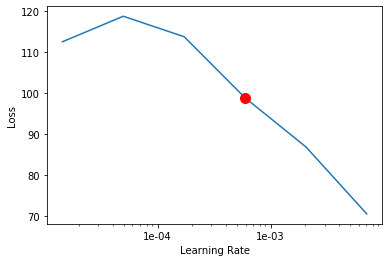

0.0005943497684706441

In [10]:
ner.lr_find()

Training the model is an iterative process. We can train the model using its `fit()` method till the validation loss (or error rate) continues to go down with each training pass also known as epoch. This is indicative of the model learning the task.

In [11]:
ner.fit(epochs=15, lr=0.0005)

epoch,losses,val_loss,precision_score,recall_score,f1_score,time
0,79.4,11.78,0.0,0.0,0.0,00:00:05
1,18.14,11.0,0.0,0.0,0.0,00:00:04
2,15.78,12.32,0.9,0.42,0.57,00:00:04
3,18.22,18.68,0.72,0.37,0.49,00:00:05
4,17.51,6.69,0.62,0.19,0.3,00:00:04
5,16.21,29.09,0.55,0.4,0.46,00:00:04
6,16.37,15.5,0.51,0.41,0.45,00:00:04
7,25.75,26.06,0.6,0.23,0.34,00:00:04
8,21.61,16.03,0.61,0.41,0.49,00:00:04
9,20.92,53.01,0.29,0.1,0.14,00:00:04


By default, the earlier layers of the model (i.e. the backbone) are frozen and their weights are not updated when the model is being trained. Once the later layers have been sufficiently trained, the earlier layers are unfrozen (by calling unfreeze() method of the TextClassifier class) and fine-tuned to the nuances of the particular text in the dataset.

**Note:** on calling `unfreeze()` method for the `EntityRecognizer` class
- Above is applicable only for `EntityRecognizer` class with **transformer** backbones.
- Calling `unfreeze()` method on `EntityRecognizer` class with **spaCy** backbone will not have any effect. An error message is displayed stating - **_unfreeze() is not implemented for EntityRecognizer class with spaCy backbone._**

In [12]:
ner.unfreeze()

ERROR:root:unfreeze() is not implemented for EntityRecognizer model with spaCy backbone.


In [13]:
ner.fit(epochs=10)

epoch,losses,val_loss,precision_score,recall_score,f1_score,time
0,19.49,14.82,0.85,0.55,0.67,00:00:04
1,15.38,9.99,0.71,0.58,0.64,00:00:04
2,11.79,8.83,0.69,0.61,0.65,00:00:04
3,11.49,6.92,0.78,0.67,0.72,00:00:04
4,11.43,10.13,0.79,0.7,0.74,00:00:04
5,12.88,9.14,0.82,0.78,0.8,00:00:04
6,14.48,11.59,0.75,0.7,0.72,00:00:04
7,19.36,11.22,0.8,0.7,0.75,00:00:04
8,15.22,4.95,0.86,0.82,0.84,00:00:04
9,9.7,4.19,0.89,0.84,0.87,00:00:04


### Evaluate model performance

Important metrics to look at while measuring the performance of the `EntityRecognizer` model are Precision, Recall & F-measures [[7]](#References).

Here is a brief description of them:

- **Precision** - Precision talks about how precise/accurate your model is. Out of those predicted positive, how many of them are actual positive.
- **Recall** - Recall is the ability of the classifier to find all the positive samples.
- **F1** - F1 can be interpreted as a weighted harmonic mean of the precision and recall.
To learn more about these metrics one can visit the following link - [Precision, Recall & F1 score](https://en.wikipedia.org/wiki/Precision_and_recall).

To find precision, recall & f1 scores per label/class we will call the model's `metrics_per_label()` method.

In [14]:
ner.metrics_per_label()

,Precision_score,Recall_score,F1_score
Reported_date,1.00,1.00,1.00
Reported_time,1.00,1.00,1.00
Crime_datetime,0.75,0.86,0.80
Address,0.88,0.88,0.88
Crime,0.76,0.62,0.68
Reporting_officer,1.00,1.00,1.00
Weapon,0.75,0.67,0.71


###  Validate results

Once we have the trained model, we can visualize the results to see how it performs.

In [15]:
ner.show_results()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Madison Police responded at 22:10 to the 500 b...,Example_0,500 block of South Park Street,rob her,22:10,12/26/2017,5:39 AM,Sgt. Paul Jacobsen,
1,Responding officers recovered a shell casing f...,Example_1,"Citgo gas station, 1423 Northport Dr.","gunfire,shot was fired",Sunday night,09/26/2016,9:43 AM,PIO Joel Despain,
2,An Independence Lane resident said a stranger ...,Example_2,Independence Lane,,early Saturday morning,05/09/2016,9:21 AM,PIO Joel Despain,handgun
3,Victim reporting that he was pistol whipped in...,Example_3,3400 block of N Sherman Ave,,,09/18/2017,9:30 PM,Sgt. Rosemarie Mansavage,
4,The MPD arrested an 18-year-old man on a tenta...,Example_4,Memorial High School,disorderly conduct after,after 5:30 p.m.,05/05/2017,1:55 PM,PIO Joel Despain,
5,A father and his two young children narrowly e...,Example_5,Ondossagon Way home,"drunken driver reversed,second degree reckless...",Sunday morning,10/22/2018,9:36 AM,PIO Joel Despain,
6,Officers responded to an alarm at Dick's Sport...,Example_6,"Dick's Sporting Goods, 237 West Towne Mall",,,04/27/2017,3:37 AM,Lt. Timothy Radke,13 airsoft
7,A father and his two young children narrowly e...,Example_7,Ondossagon Way home,"drunken driver reversed,second degree reckless...",Sunday morning,10/22/2018,9:36 AM,PIO Joel Despain,


Once you are satisfied with the model, you can save it using the `save()` method. This creates an **Esri Model Definition (EMD file)** that can be used for inferencing on unseen data. 
Saved models can also be loaded back using the `from_model()` method. The `from_model()` method takes the path to the emd file as a required argument.

In [ ]:
ner.save('crime')

In [18]:
model_path = os.path.join('data', 'EntityRecognizer', 'models', 'crime', 'crime.emd')

In [19]:
ner = EntityRecognizer.from_model(model_path)

## Model inference

The trained model can be used to extract entities from new text documents using the `extract_entities()` function. This method accepts the path of the folder where new text documents are located, or a list of text documents from which the entities are to be extracted.

In [20]:
reports_path = os.path.join("data", "EntityRecognizer", "reports")

In [21]:
results = ner.extract_entities(reports_path)

In [22]:
results.head()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Officers were dispatched to a robbery of the A...,0.txt,Associated Bank in the 1500 block of W Broadway.,"robbery,demanded money from",,08/09/2018,6:17 PM,Sgt. Jennifer Kane,
1,The MPD was called to Pink at West Towne Mall ...,1.txt,Pink at West Towne Mall,thefts at,Tuesday night,08/18/2016,"Pink stores,10:37 AM",PIO Joel Despain,
2,"The MPD is seeking help locating a unique $1,5...",10.txt,Union St.,stolen from outside,,08/17/2016,11:09 AM,PIO Joel Despain,
3,A Radcliffe Drive resident said three men - at...,100.txt,Radcliffe Drive,handguns -entered her apartment,,08/07/2018,11:17 AM,PIO Joel Despain,
4,Madison Police officers were near the intersec...,1001.txt,intersection of Francis Street and State Street,shooting there immediately,,08/10/2018,4:20 AM,Lt. Daniel Nale,gunshot


#  Visualize entities

We can utilize SpaCy's named entity visualizer to check the model's prediction on new text one at a time.

In [23]:
def color_gen(): #this function generates and returns a random color.
    random_number = random.randint(0,16777215) #16777215 ~= 256x256x256(R,G,B)
    hex_number = format(random_number, 'x')
    hex_number = '#' + hex_number
    return hex_number

In [30]:
colors = {ent.upper():color_gen() for ent in ner.entities}
options = {"ents":[ent.upper() for ent in ner.entities], "colors":colors}

In [25]:
txt = 'Multiple officers were called to an apartment building on N. Wickham Court Saturday night following reports of a large disturbance taking place inside. Officers learned there were ongoing tensions between residents of two apartments, and that some of this was the result of a gunshot the night prior. The weapons offense had not been reported to police, but officers now learned a round was fired in a common stairwell and the bullet entered an apartment, going through a bathroom before entering a bedroom wall. No one was hurt and investigators are attempting to sort out whether someone intentionally fired a gun, or if damage was the result of an accident or careless handling of a firearm. Released 12/26/2017 at 10:50 AM by PIO Joel Despain '

In [26]:
model_folder = os.path.join('data', 'EntityRecognizer', 'models', 'crime')

In [27]:
nlp = spacy.load(model_folder) #path to the model folder

In [28]:
doc = nlp(txt)

In [31]:
spacy.displacy.render(doc,jupyter=True, style='ent', options=options)

# References

[1]: [Embed, encode, attend, predict: The new deep learning formula for state-of-the-art NLP models](https://explosion.ai/blog/deep-learning-formula-nlp)

[2]: [Feature hashing](https://arxiv.org/abs/1805.08539)

[3] [Summary of the models](https://huggingface.co/transformers/summary.html)

[4] [BERT Paper](https://arxiv.org/pdf/1810.04805.pdf)

[5]: [Docanno ](https://github.com/chakki-works/doccano)

[6]: [TagEditor ](https://github.com/d5555/TagEditor)

[7]: [Precision, recall and F-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)